In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use("seaborn-colorblind")
warnings.filterwarnings("ignore")

In [2]:
method_colours = {
    "cao": "tab:green",
    "huang": "tab:orange",
    "matching": "tab:blue",
}

# Plotting results


In [3]:
def violin_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

    for pos, (group, values) in enumerate(results.groupby("initialisation")):
        ax.boxplot(values[column], positions=[pos], sym=".")
        v = ax.violinplot(values[column], [pos], showextrema=False)
        for body in v["bodies"]:
            body.set_facecolor(method_colours[group])

    separated_column = " ".join(column.split("_"))
    ax.set_xticks((0, 1, 2))
    ax.set_xticklabels(("Cao", "Huang", "Matching"))
    ax.set_xlabel("Initialisation method")
    ax.set_ylabel(separated_column.capitalize())
    ax.set_title(name)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_violinplot.pdf", transparent=True)


In [4]:
def empirical_cdf_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    for group, values in results.groupby("initialisation"):
        colour = method_colours[group]
        if group == "cao":
            ax.vlines(
                x=values[column].median(),
                ymin=0,
                ymax=1,
                color=colour,
                label=group.capitalize(),
            )
        else:
            ax.hist(
                values[column],
                cumulative=True,
                bins=100,
                density=True,
                color=colour,
                alpha=0.5,
                label=group.capitalize(),
            )

    separated_column = " ".join(column.split("_"))
    ax.set_xlabel(separated_column.capitalize())
    ax.set_ylabel("Likelihood of observation")
    ax.set_title(name)
    ax.legend()

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_cdfplot.pdf", transparent=True)


In [5]:
def scatter_plots(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

    for group, values in results.groupby("initialisation"):
        colour = method_colours[group]
        alpha, zorder, marker = 0.5, None, None
        if group == "cao":
            alpha, zorder, marker = 1, 1, "x"
        ax.scatter(
            values["initial_cost"],
            values["final_cost"],
            alpha=alpha,
            zorder=zorder,
            marker=marker,
            edgecolor="None",
            facecolor=colour,
            label=group.capitalize(),
        )

    ax.set_xlabel("Initial cost")
    ax.set_ylabel("Final cost")
    ax.set_title(name)
    ax.legend()

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    lower, upper = min(xmin, ymin), max(xmax, ymax)

    ax.set_xlim(lower, upper)
    ax.set_ylim(lower, upper)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_cost_scatterplot.pdf", transparent=True)


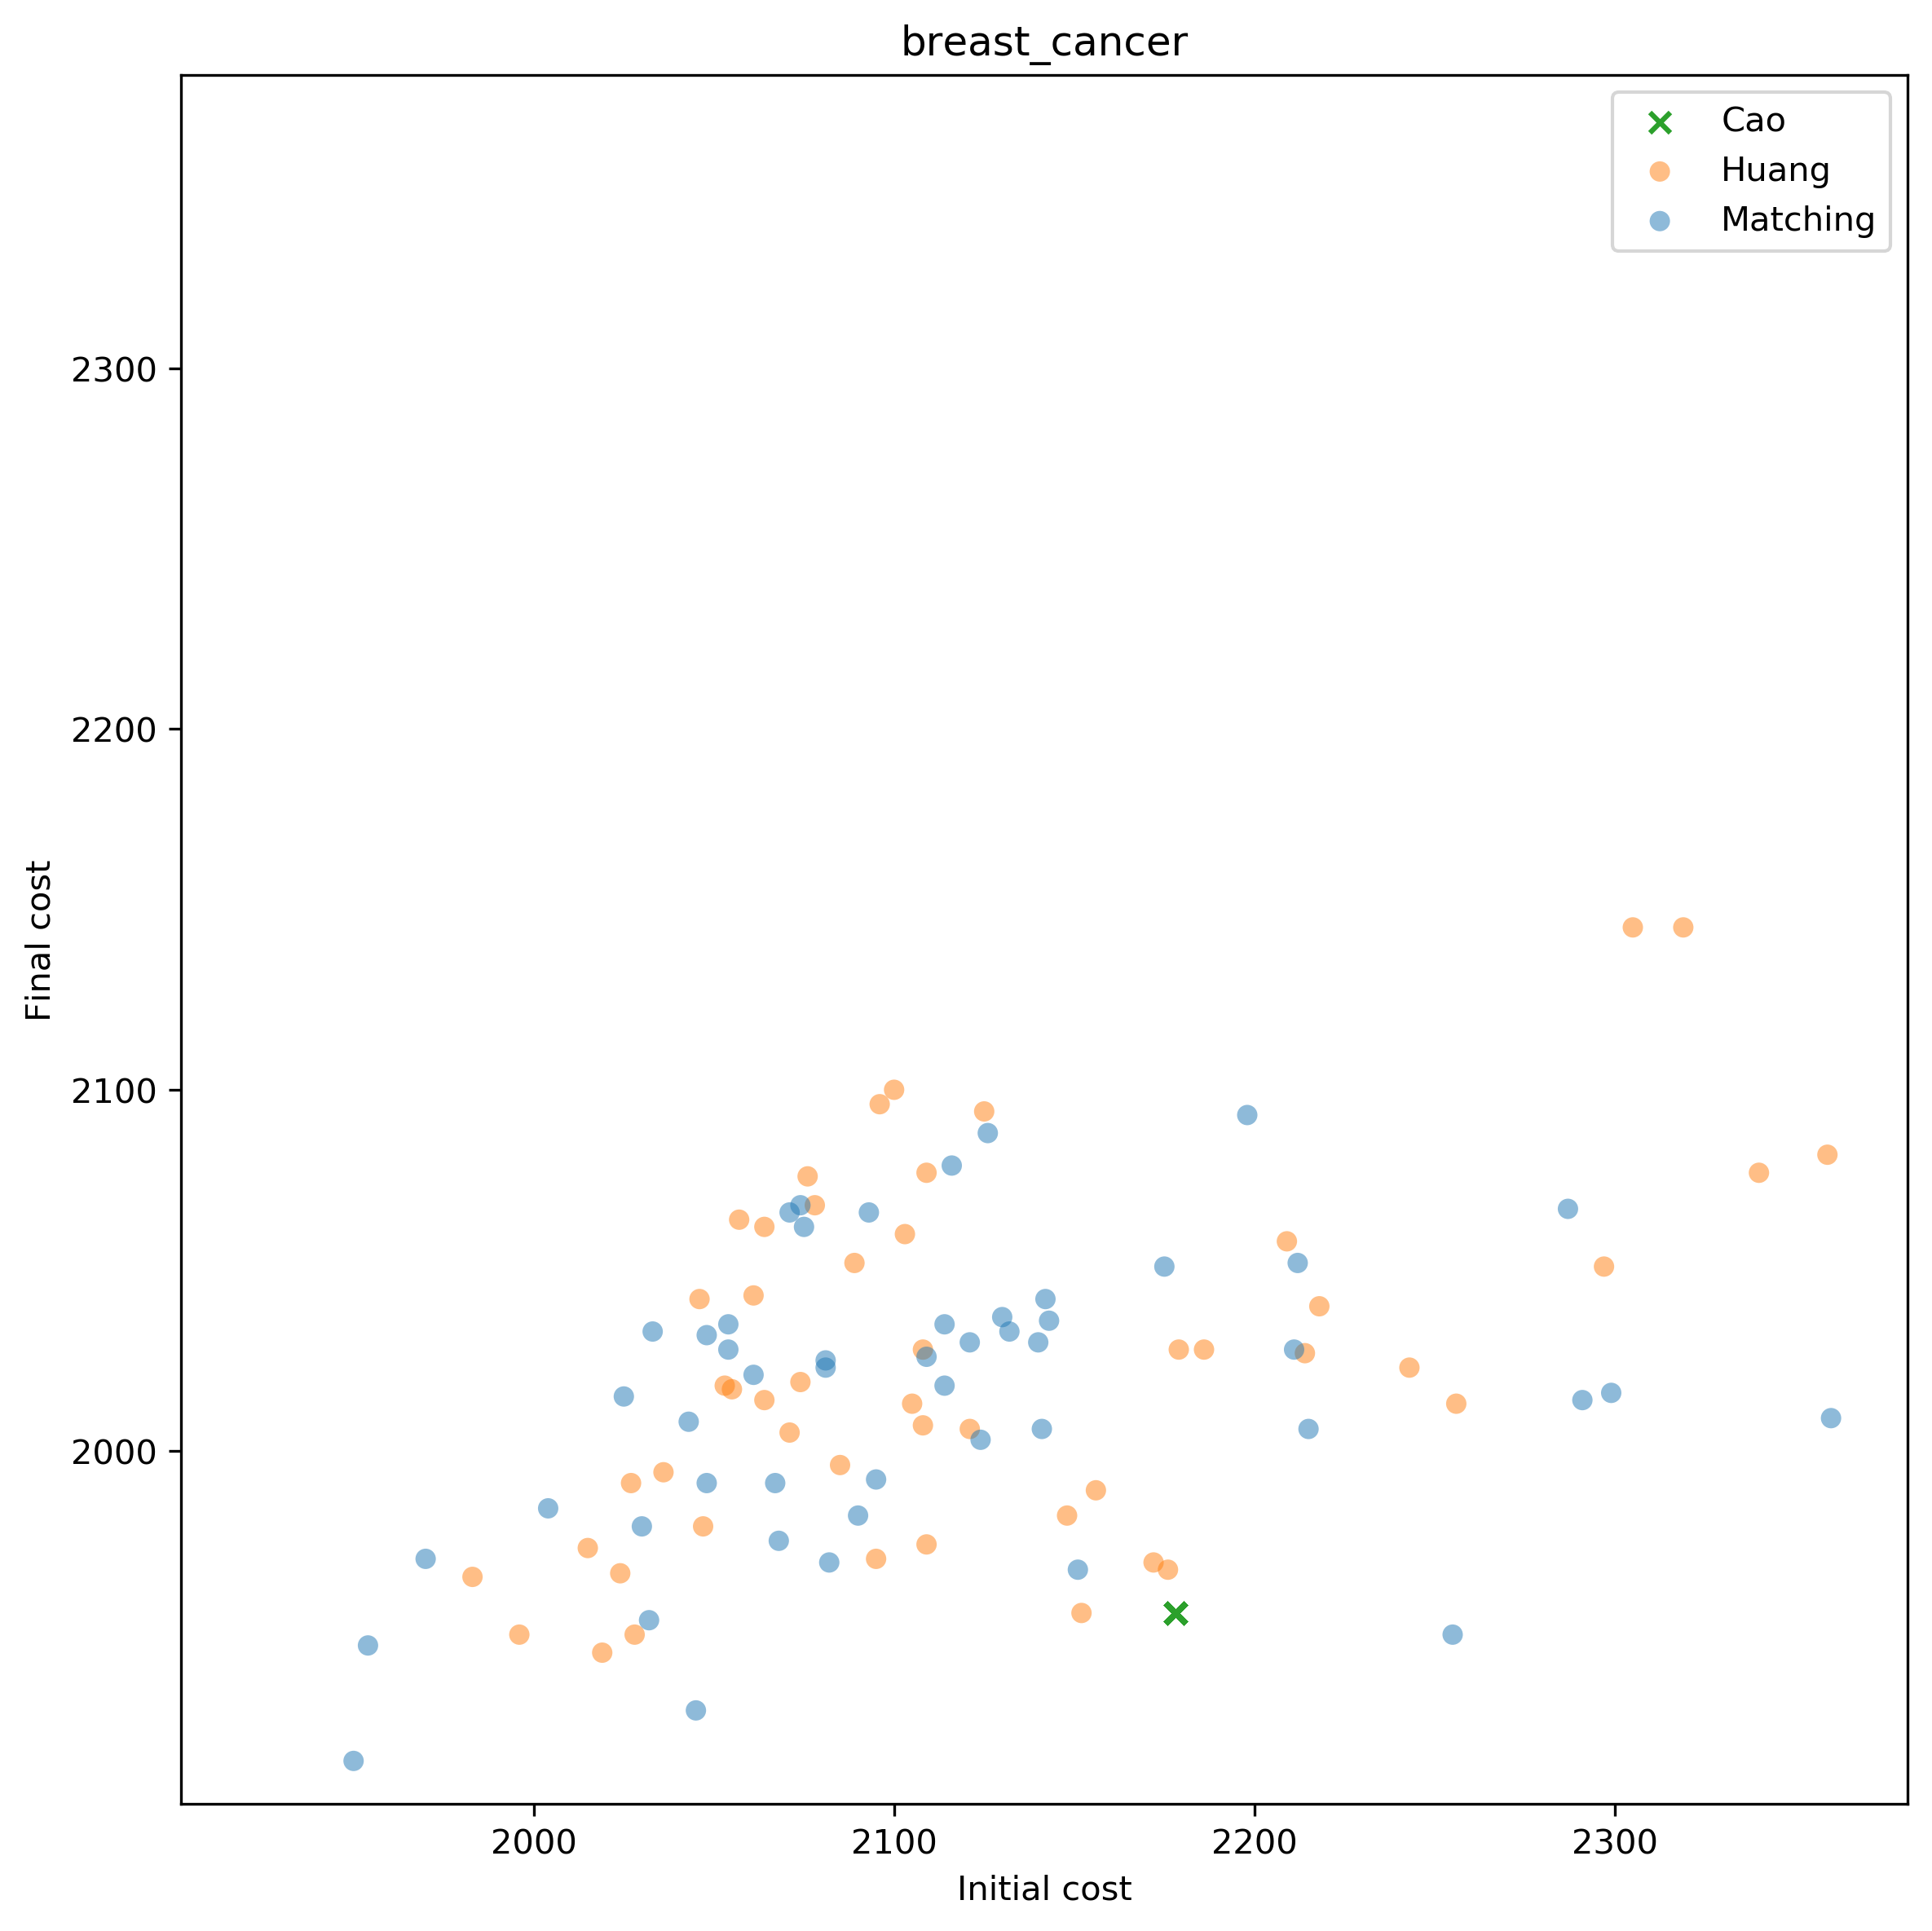

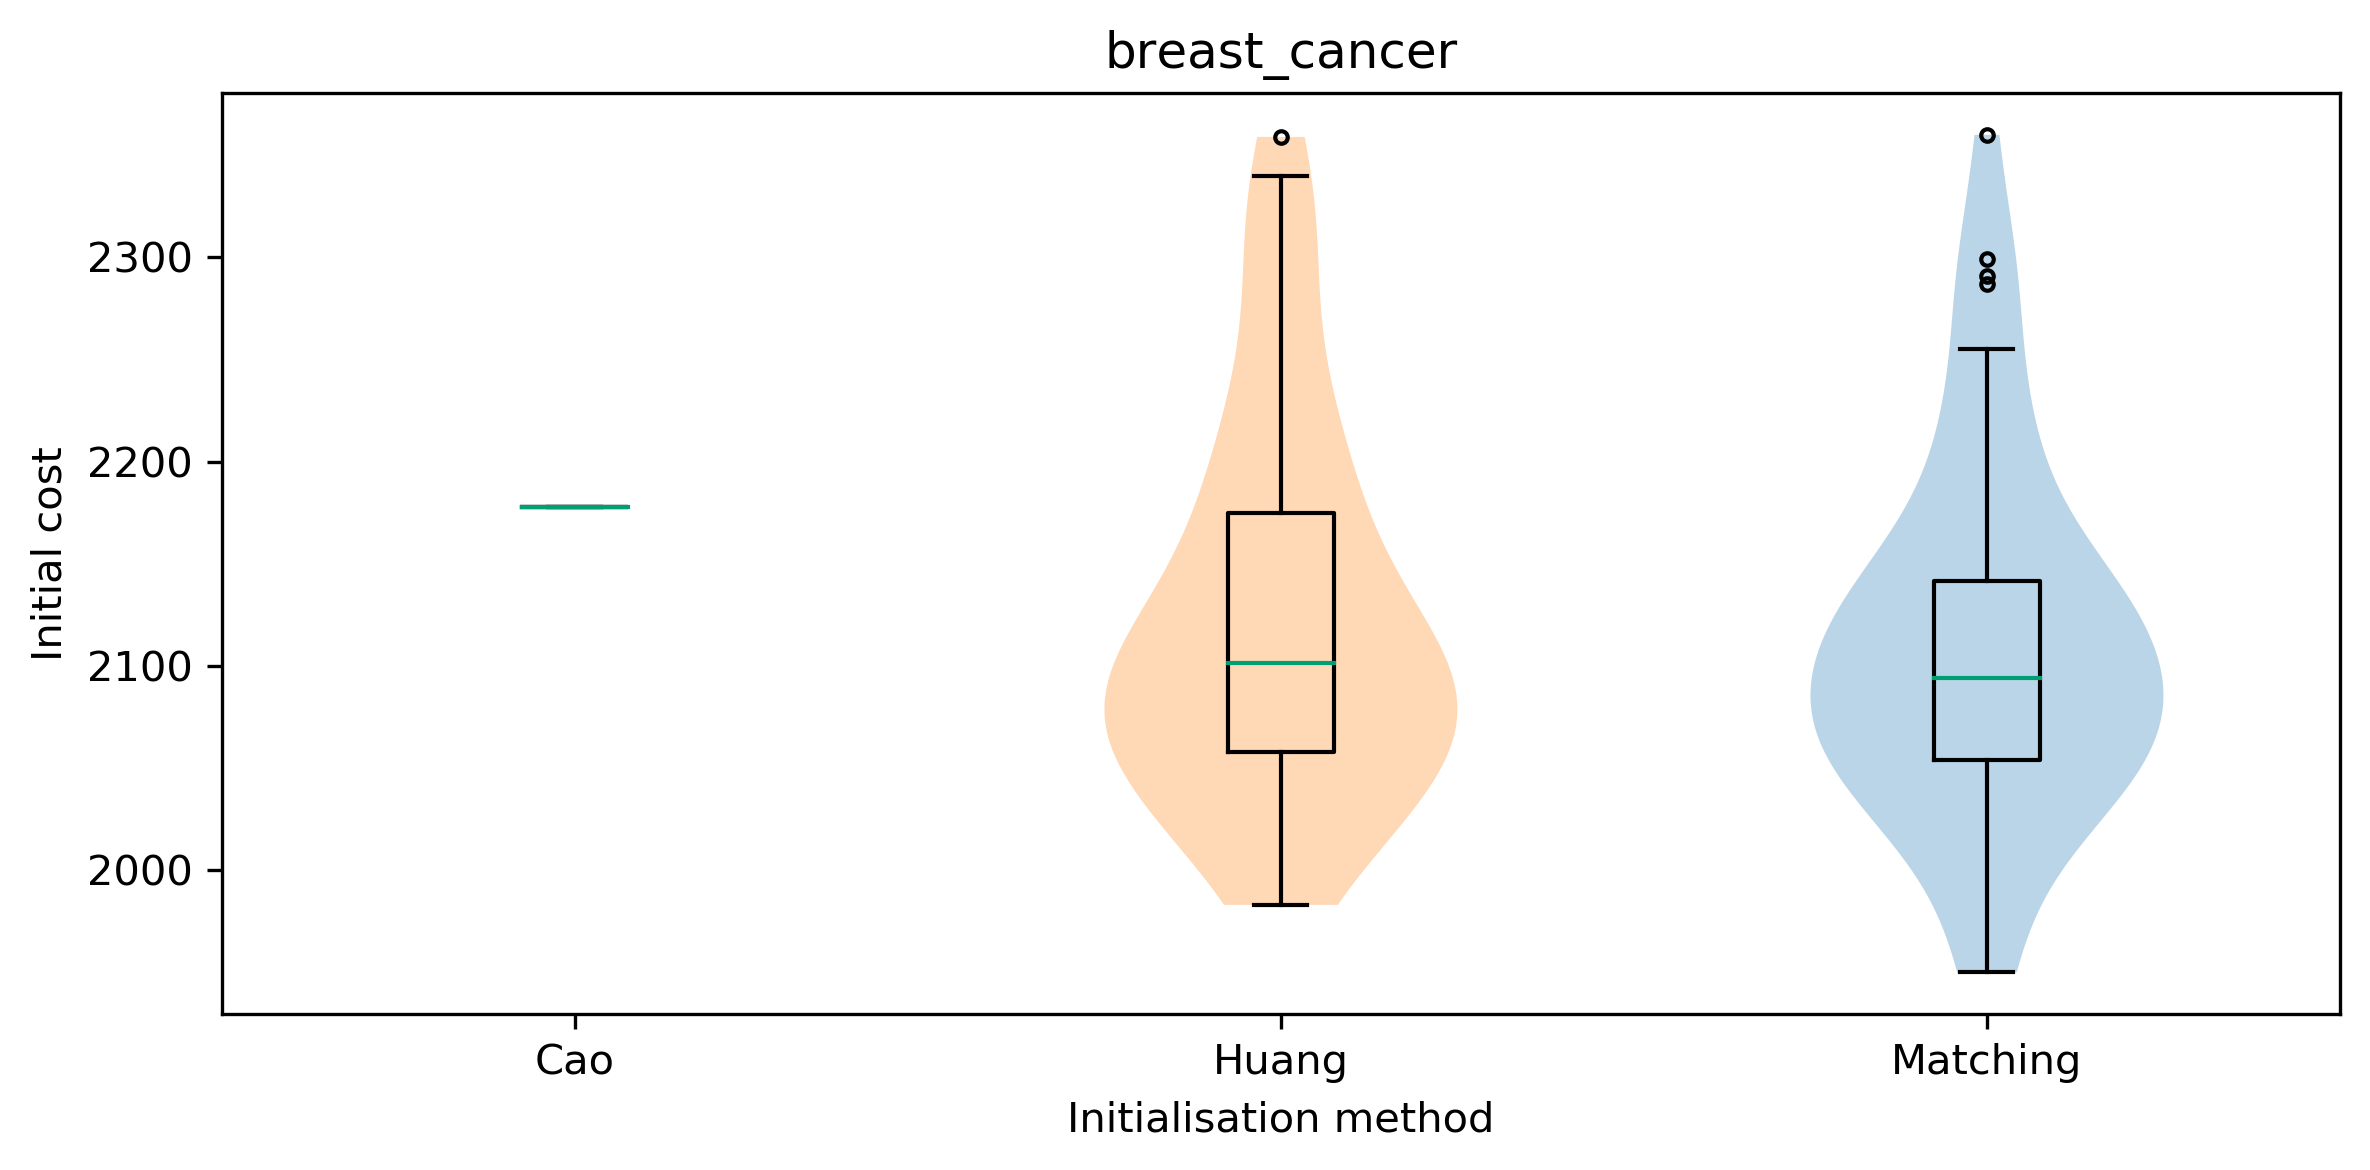

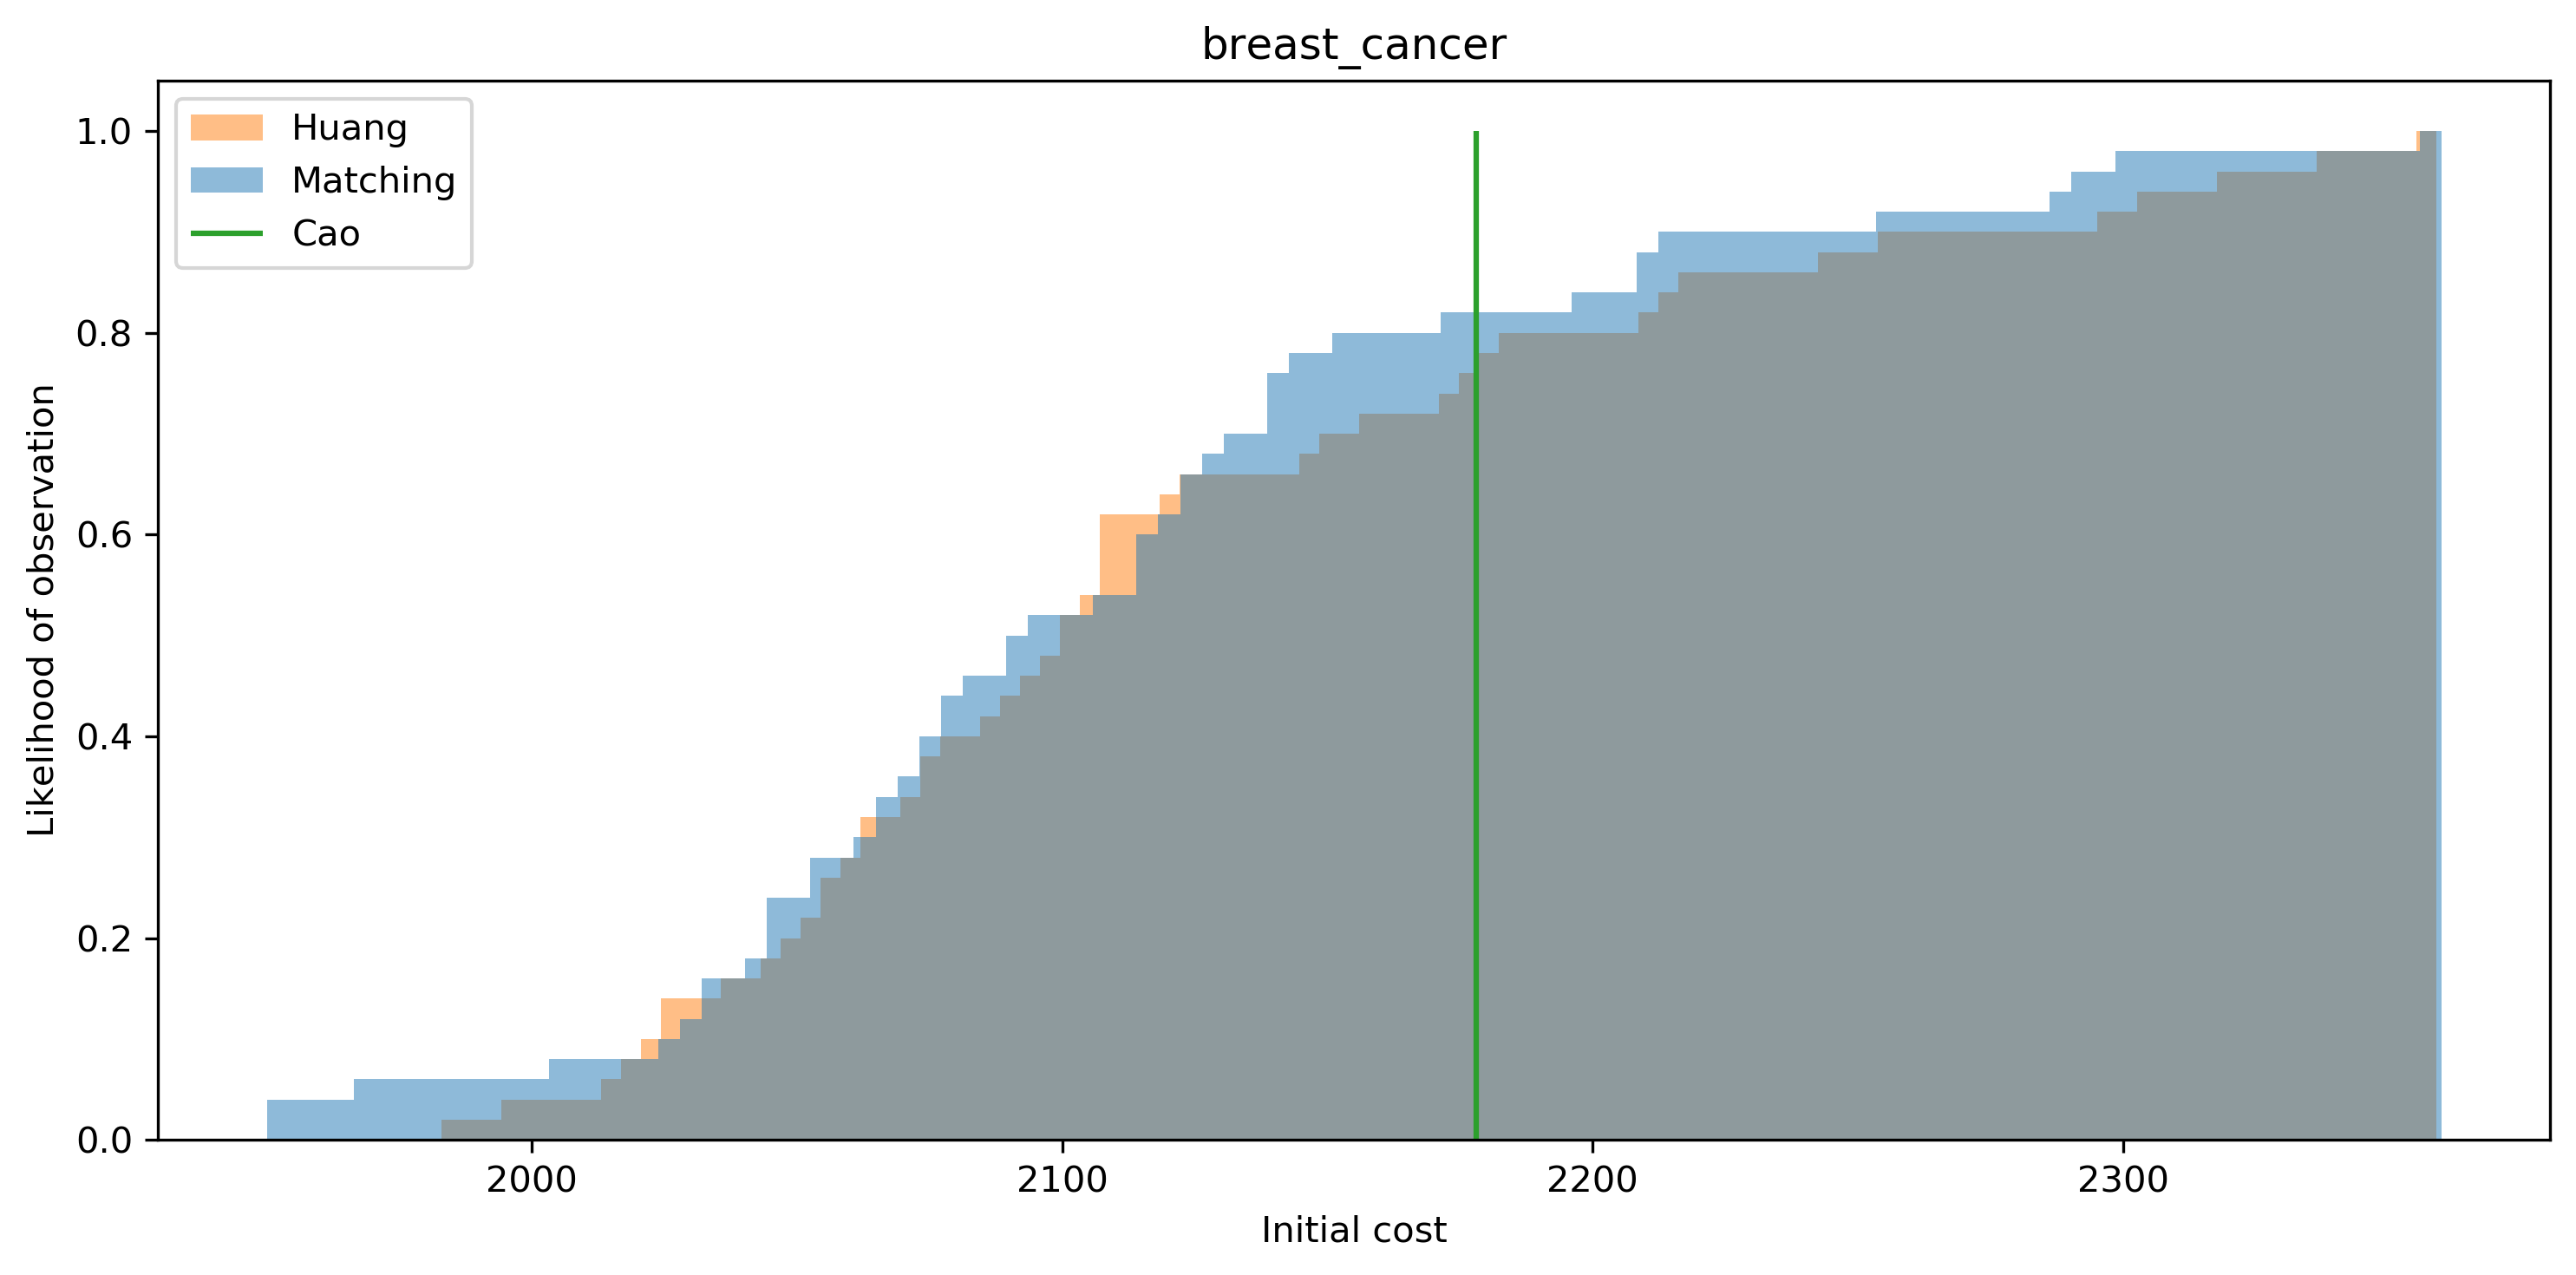

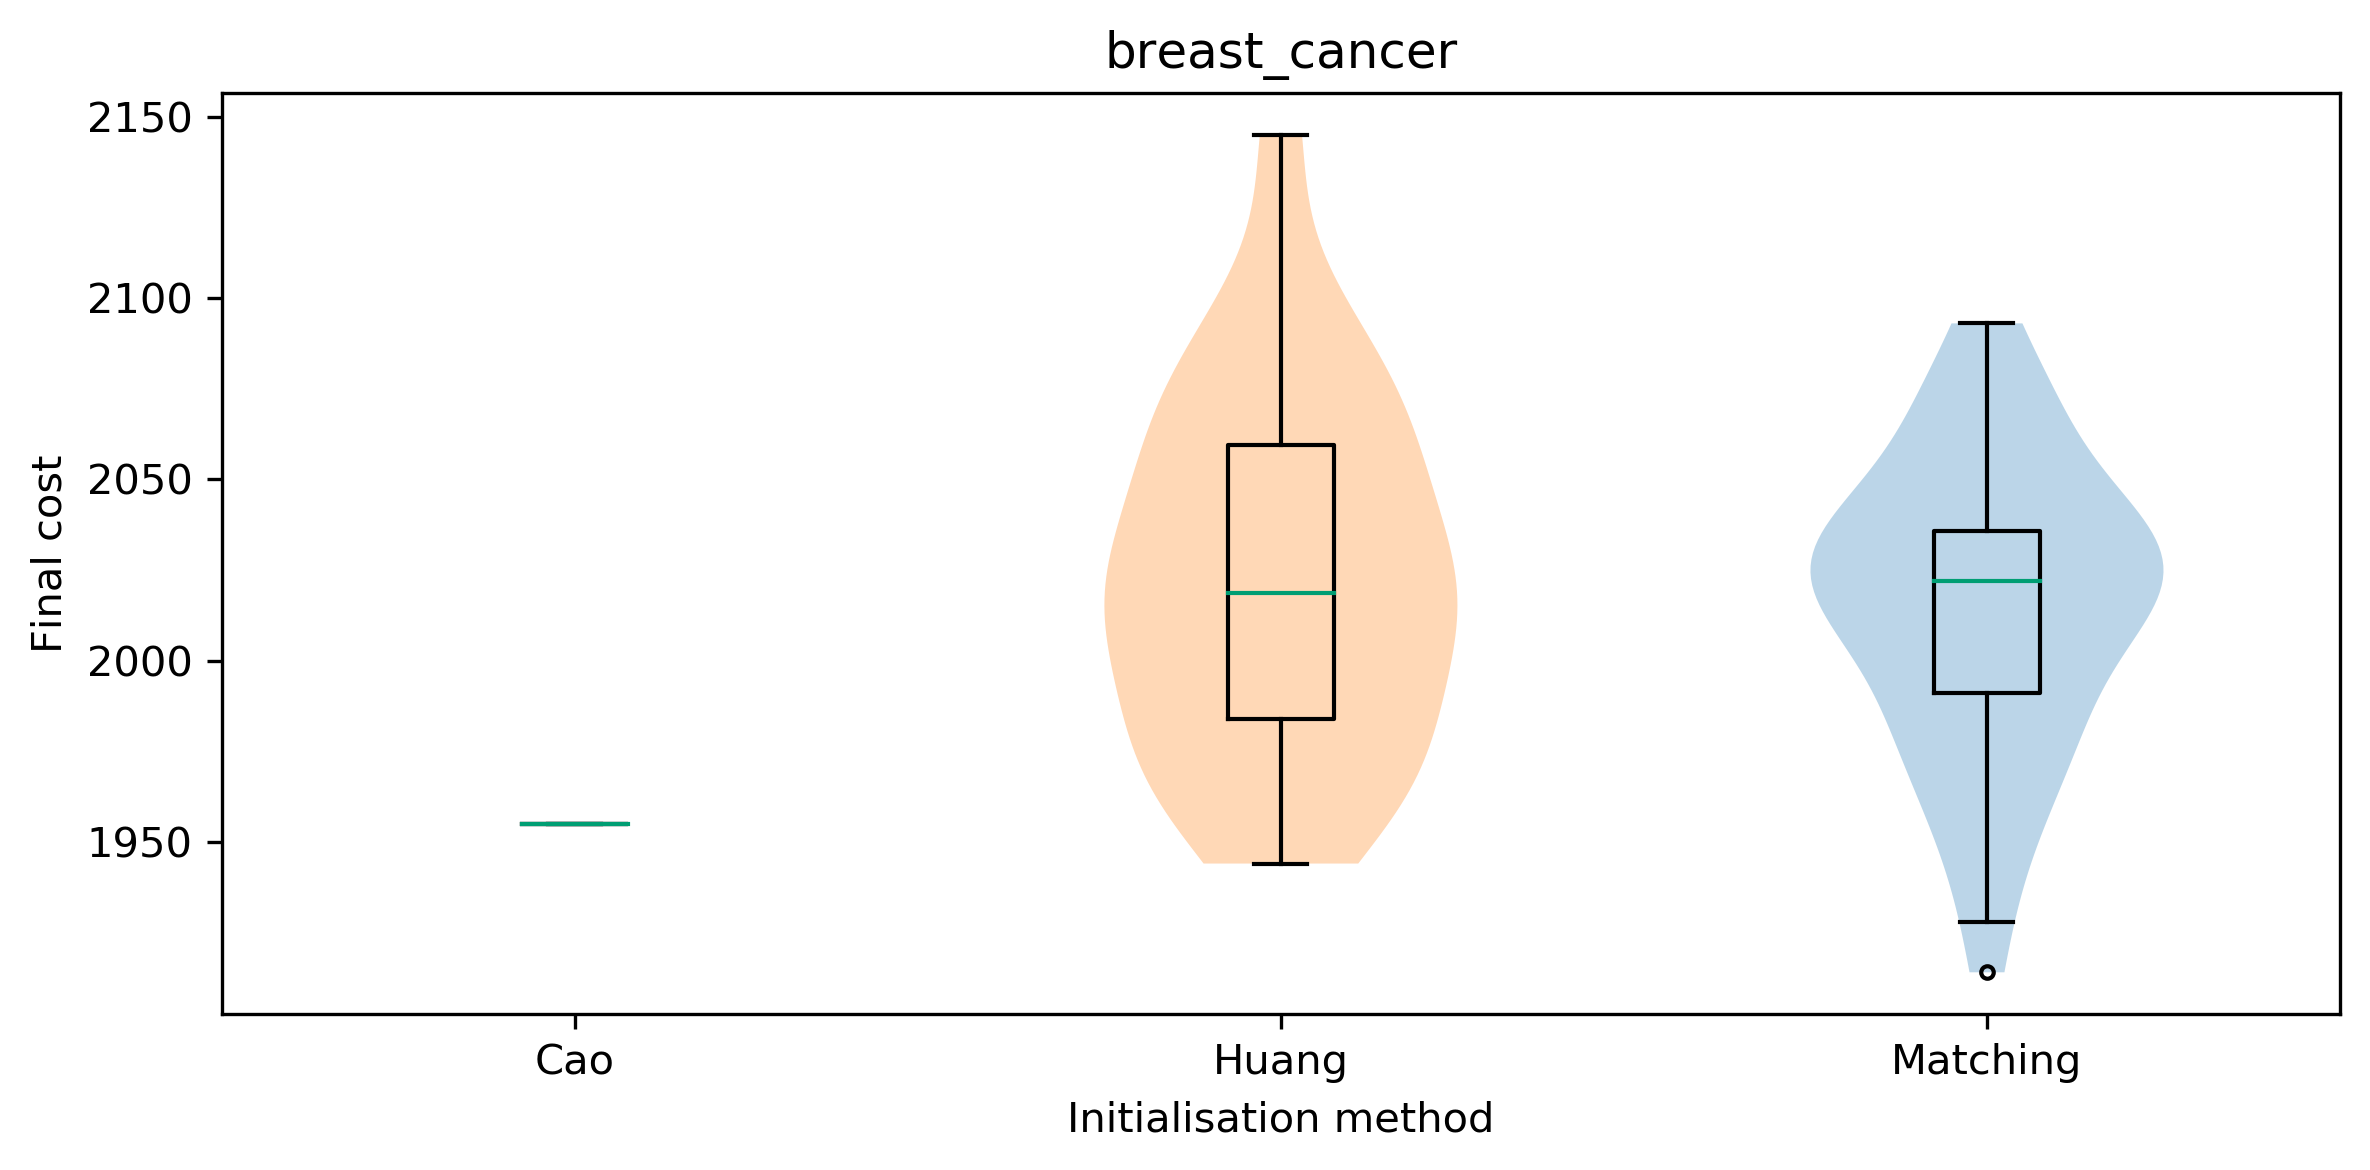

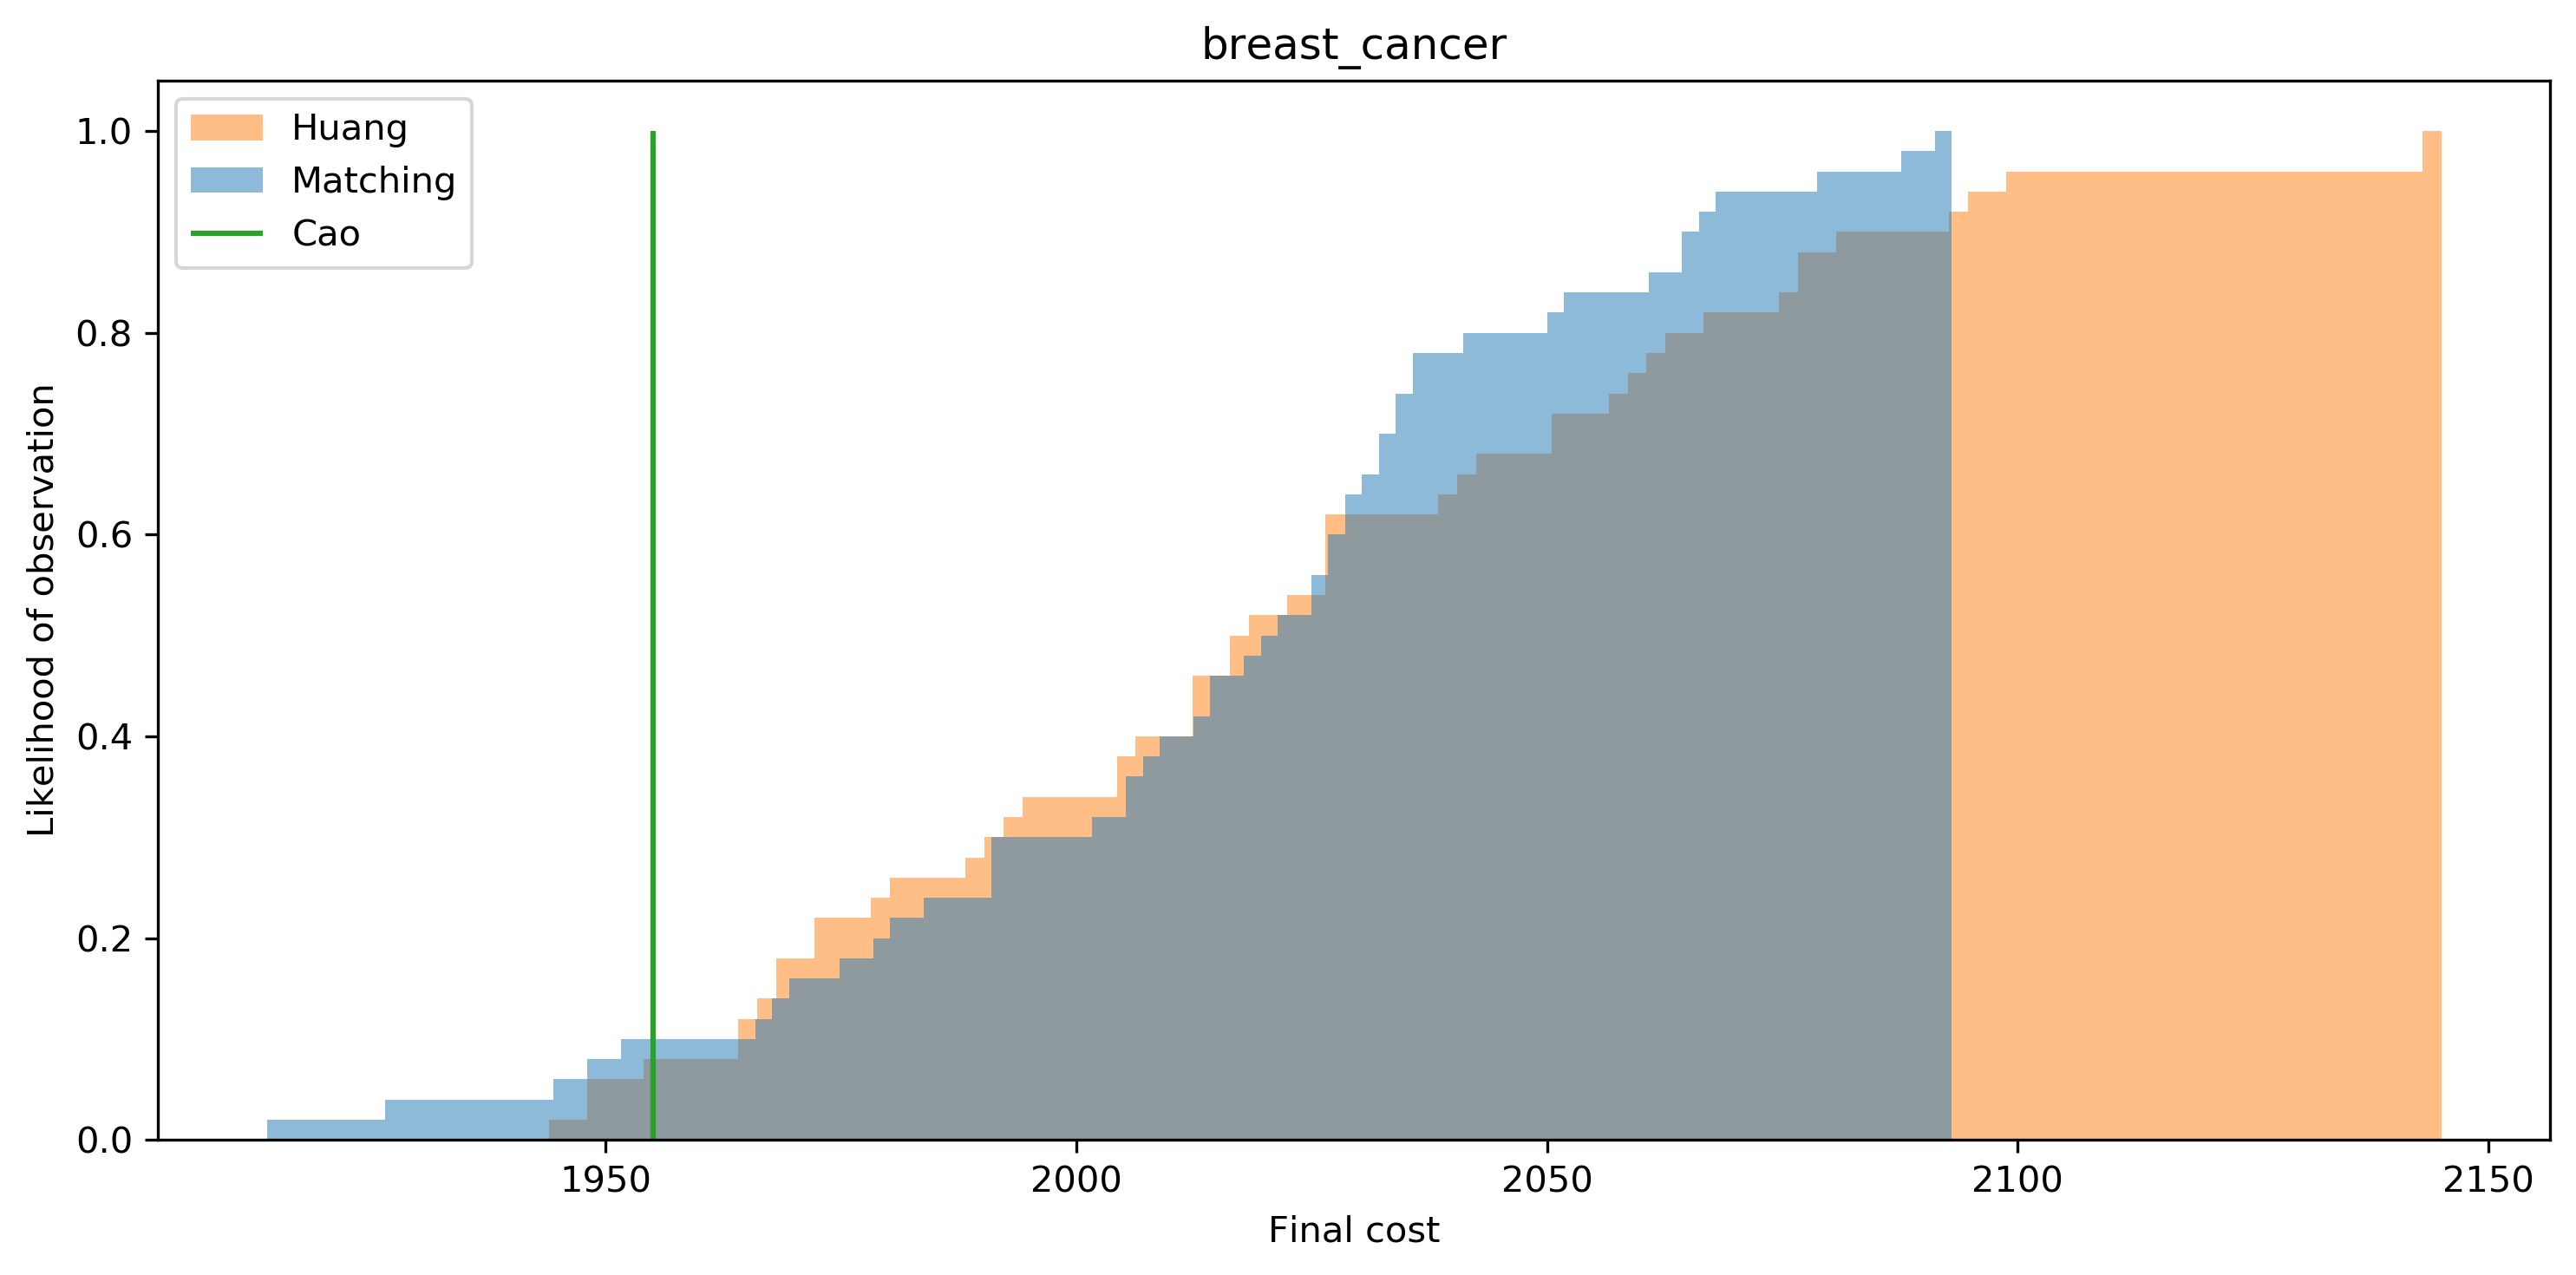

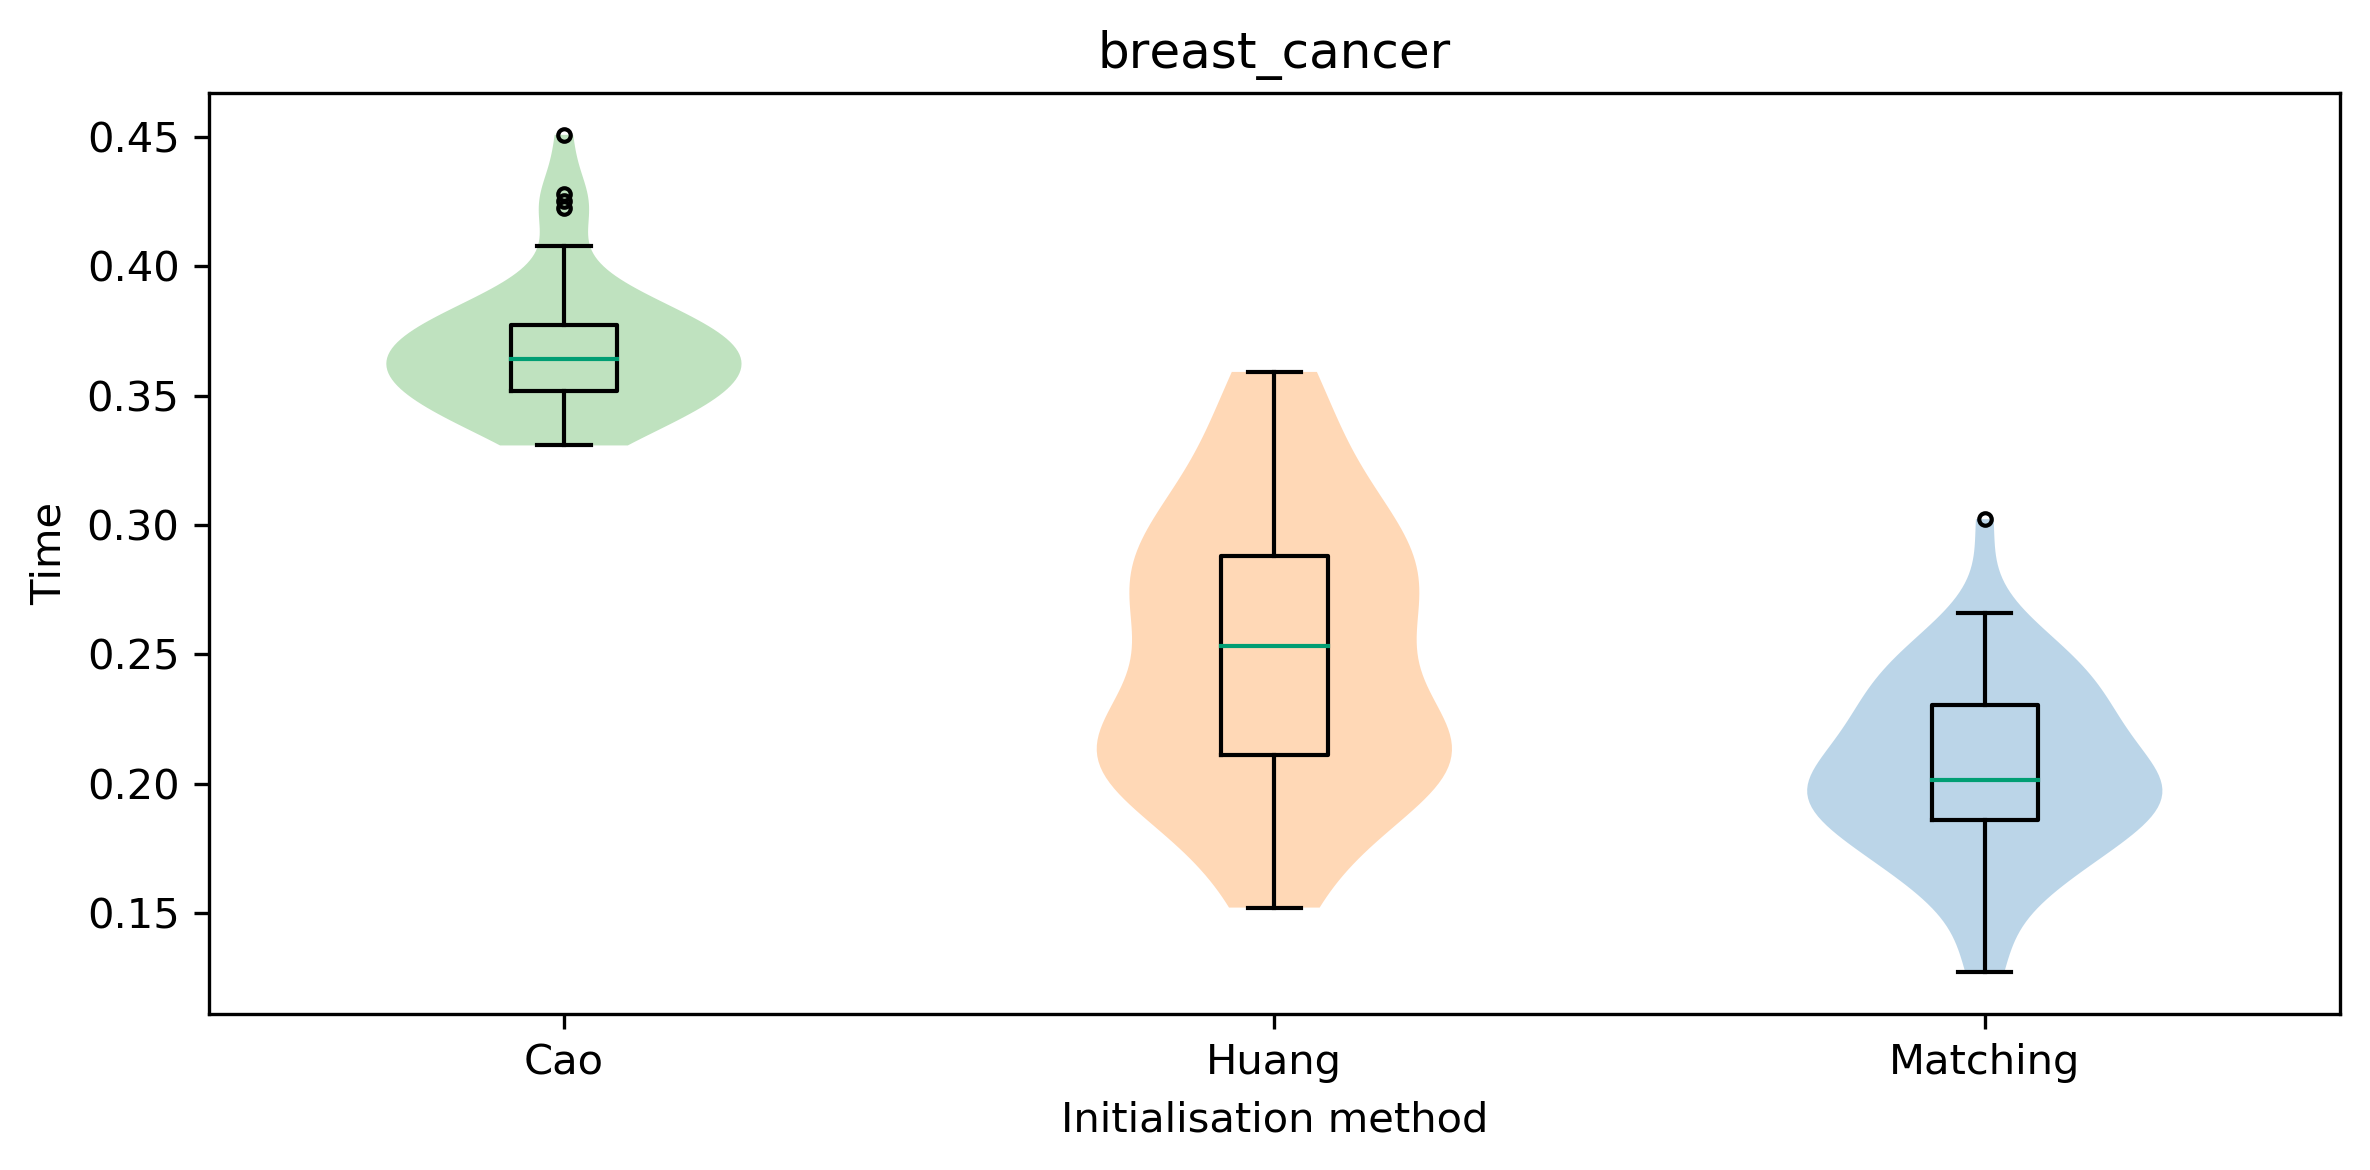

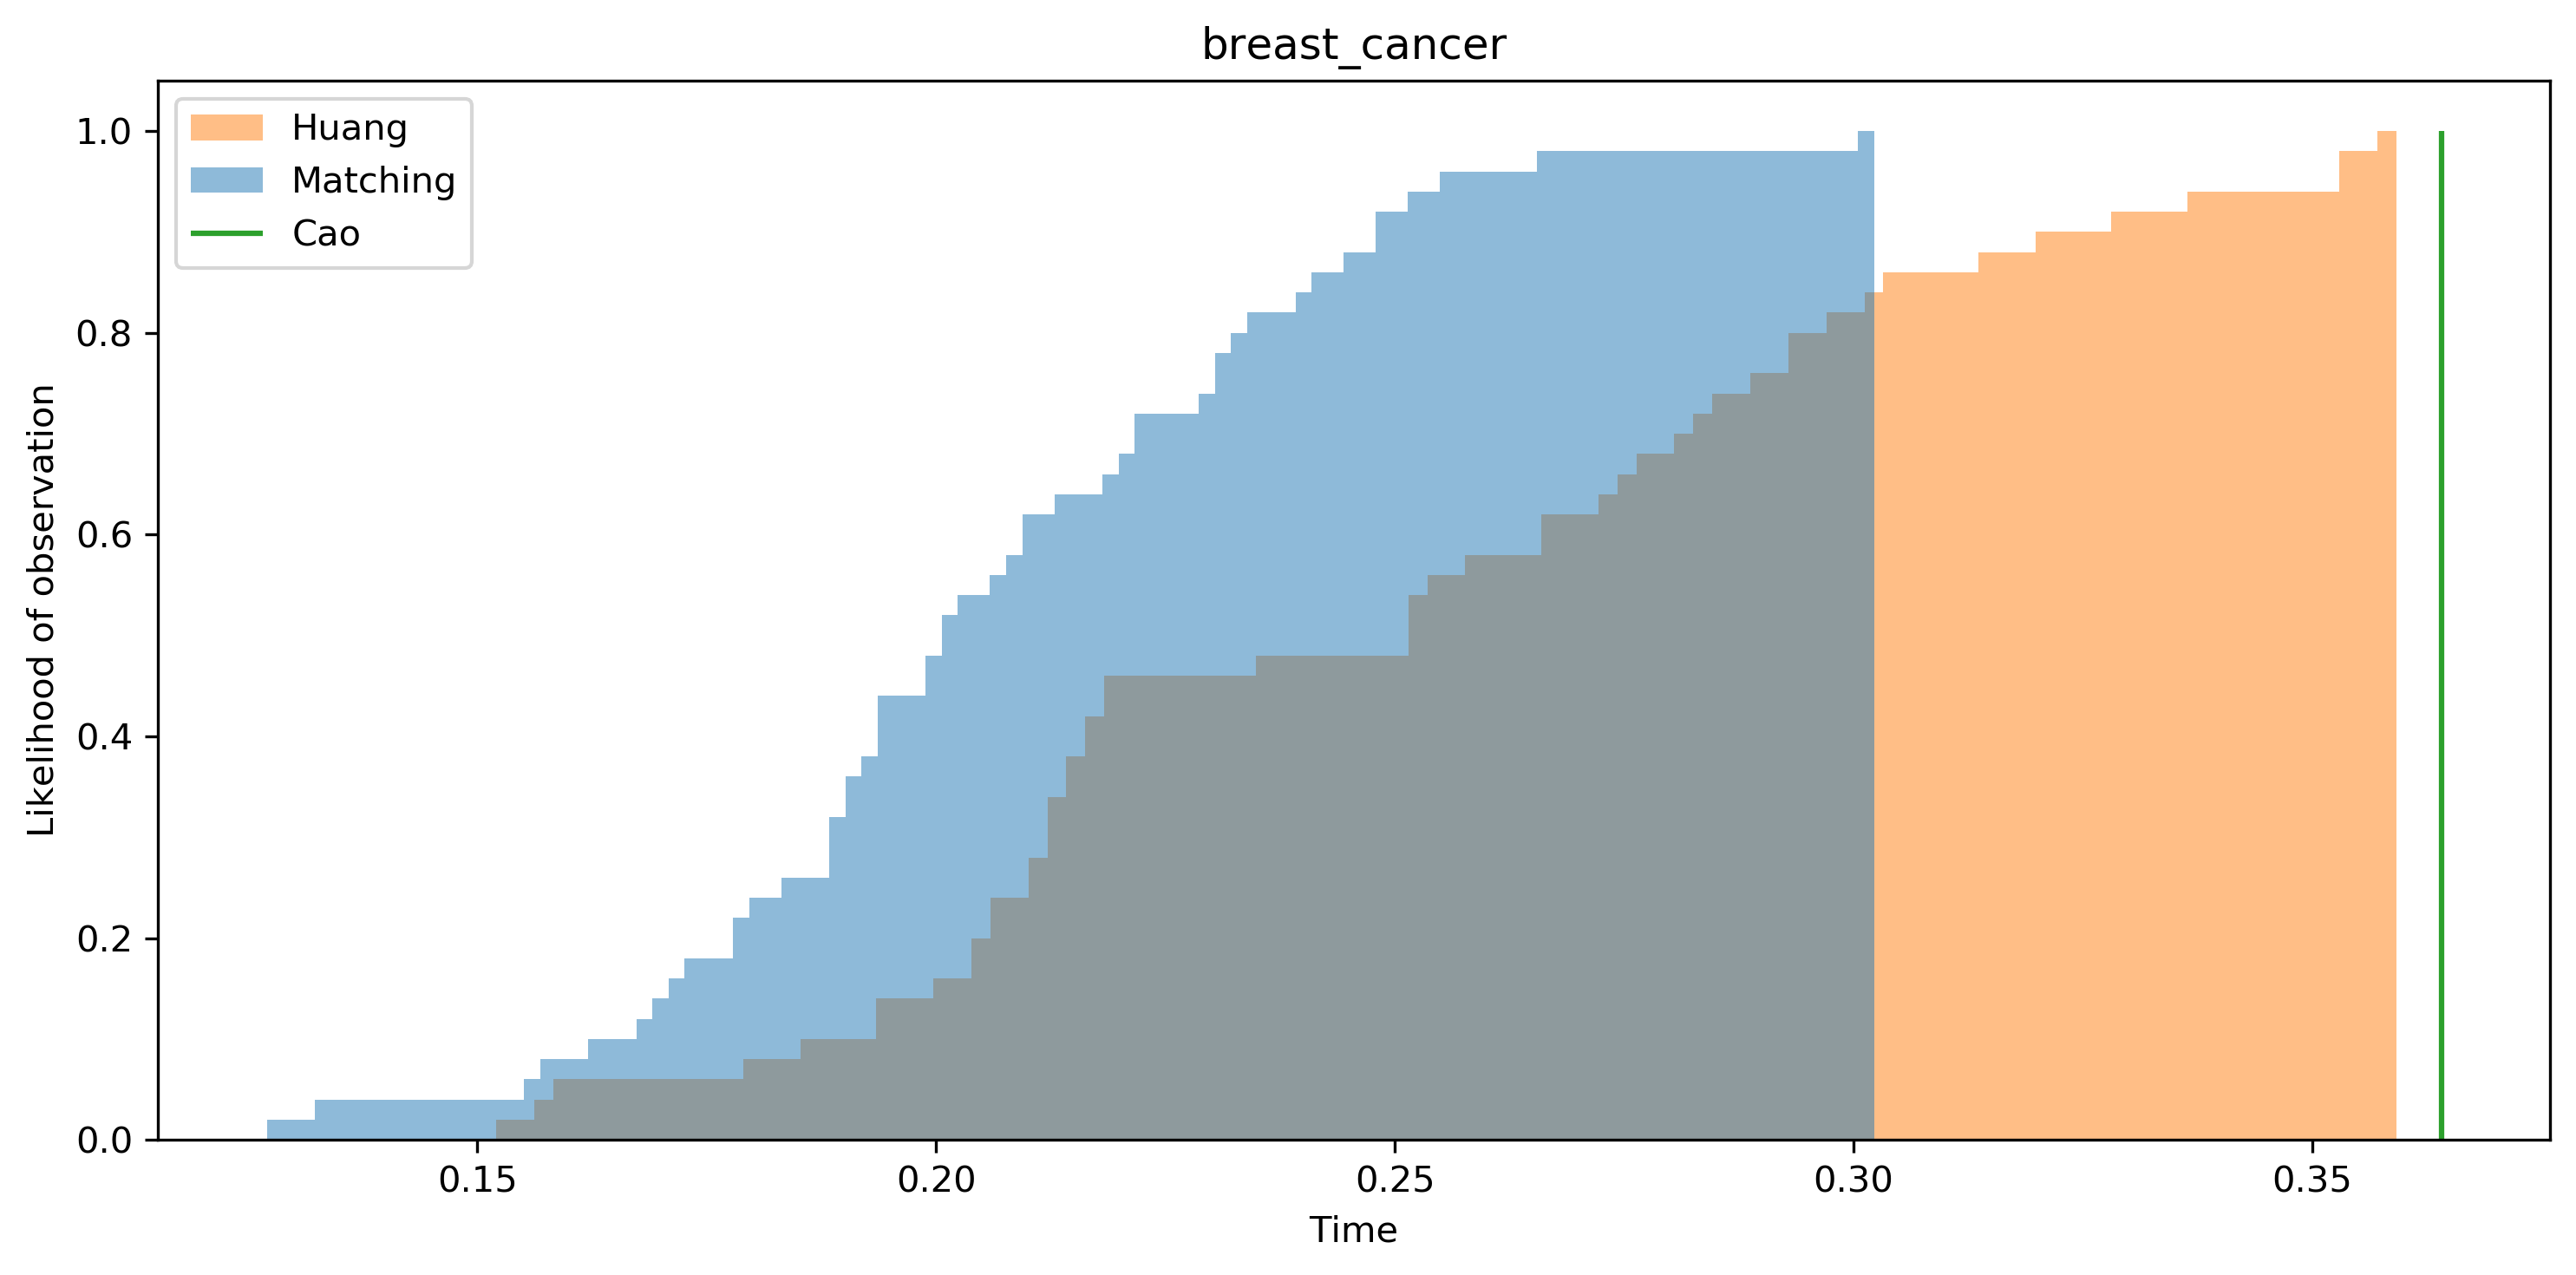

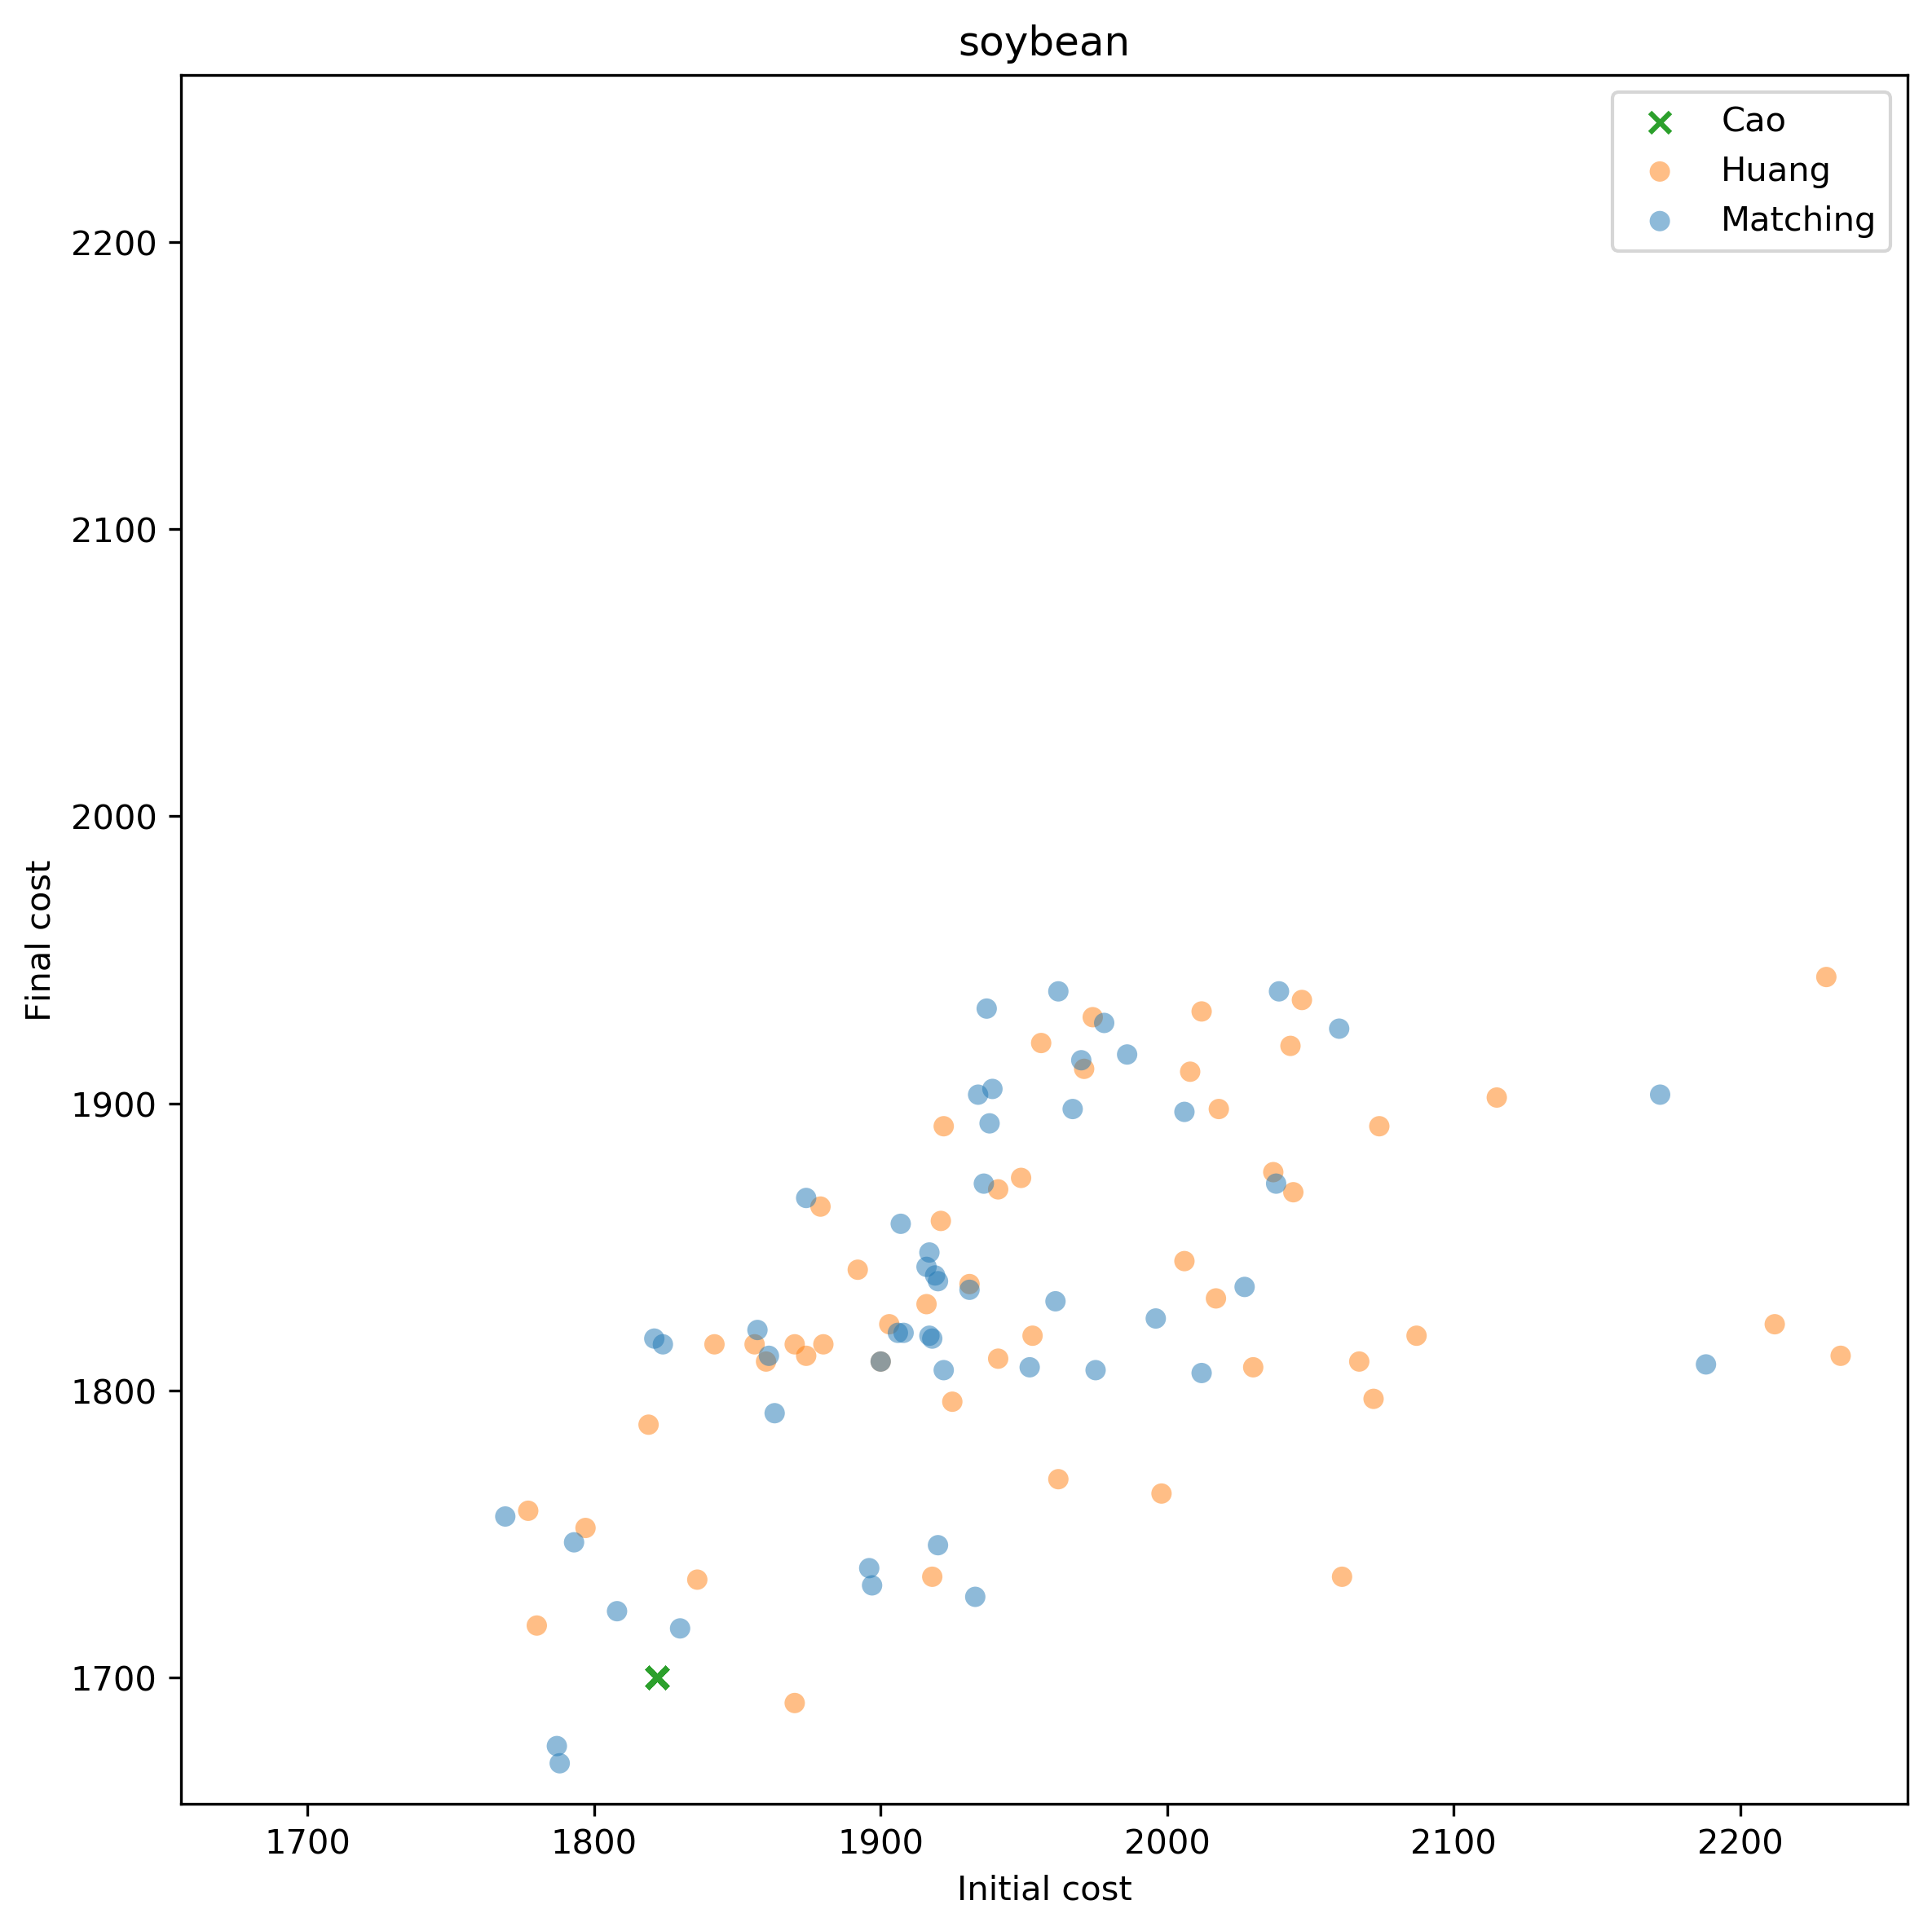

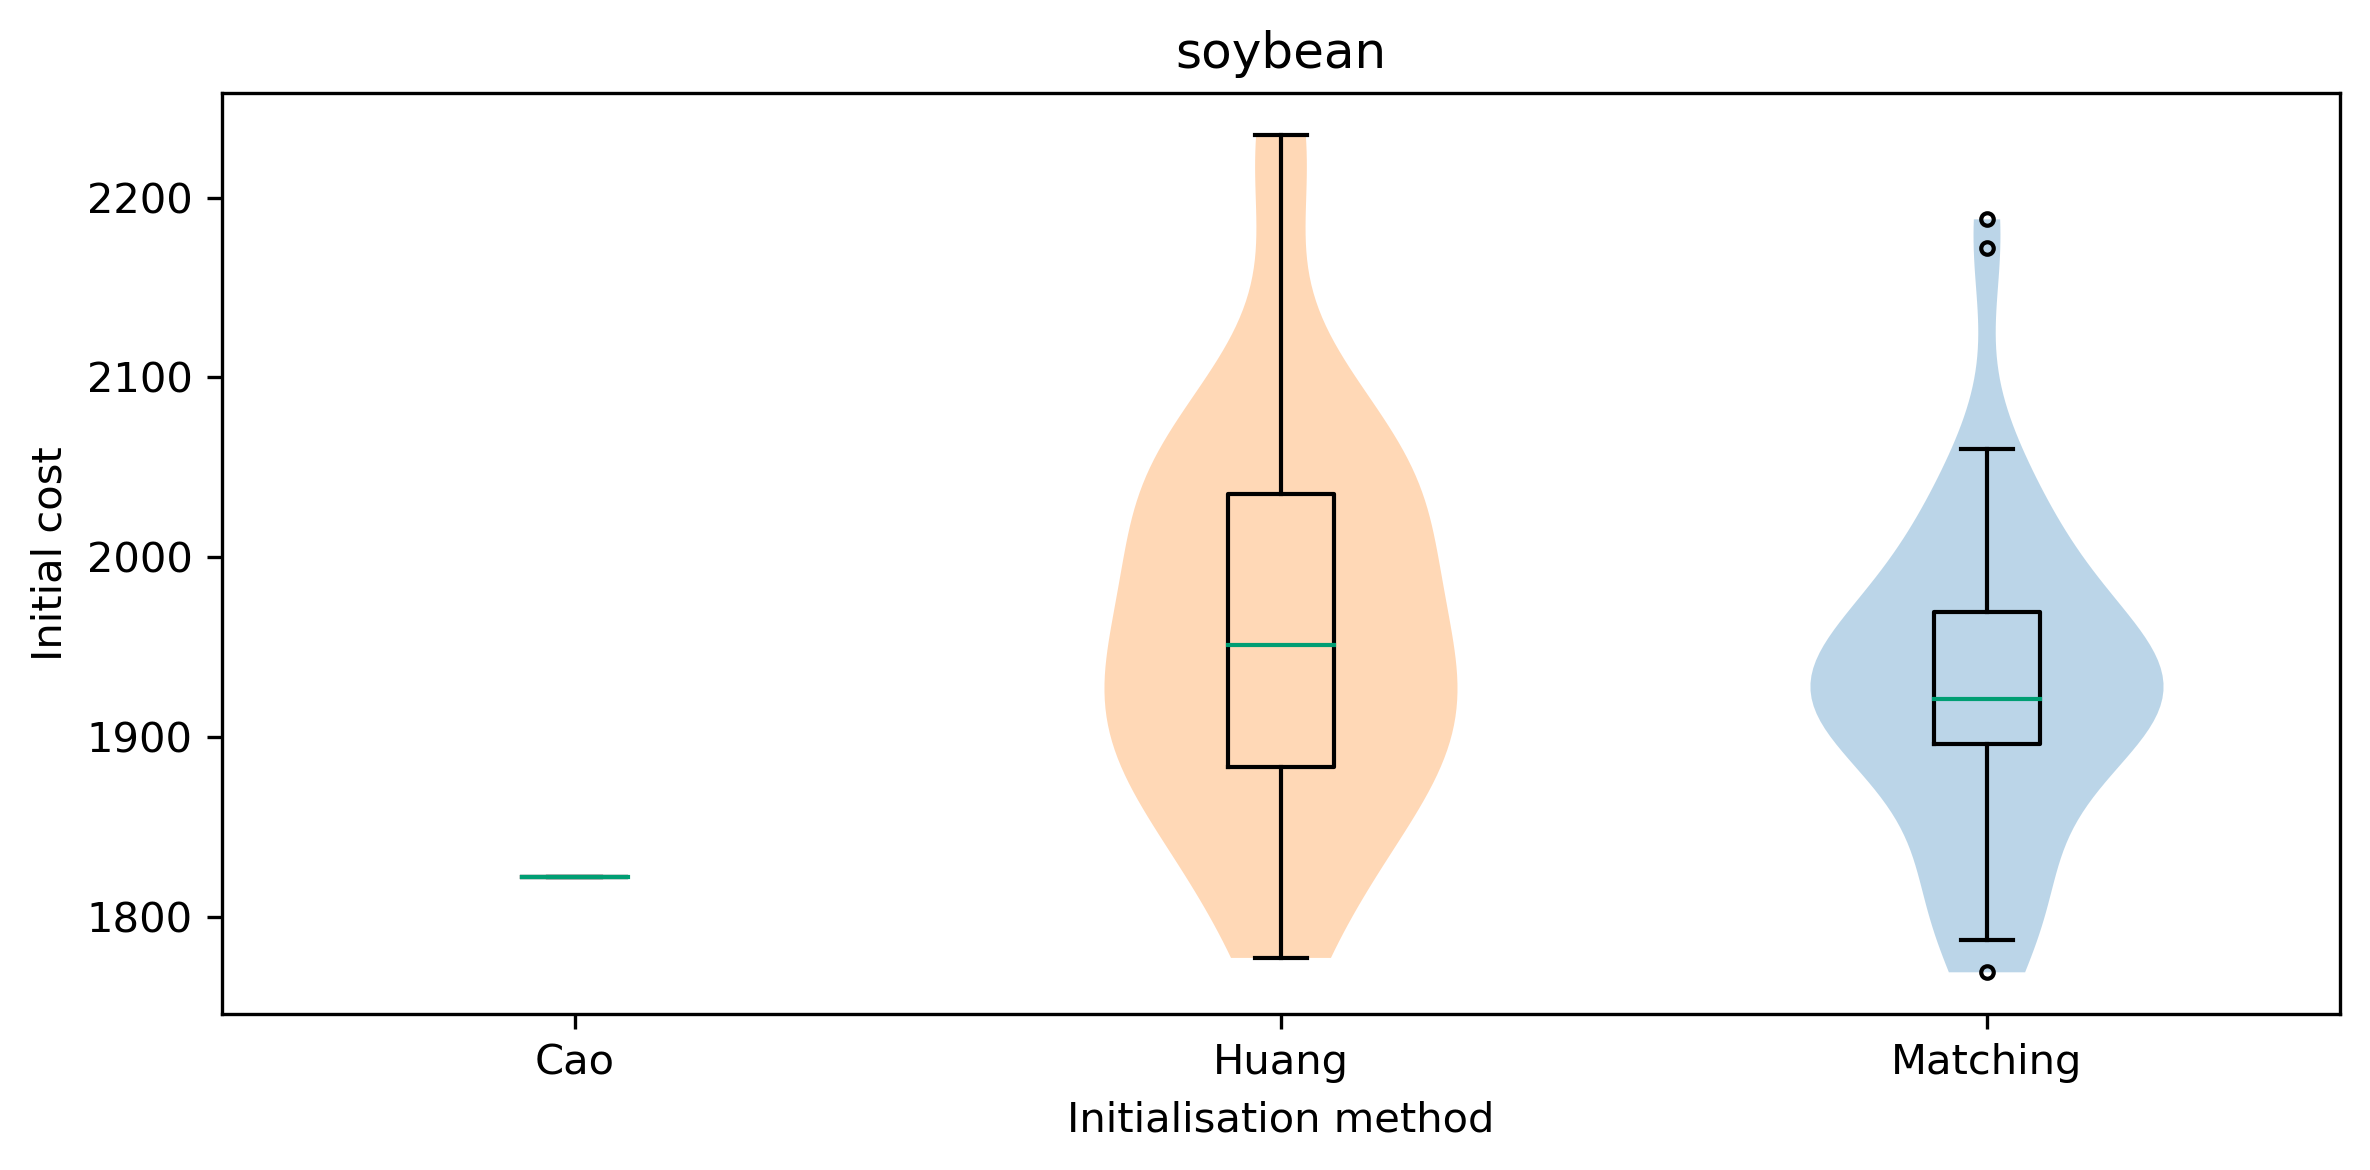

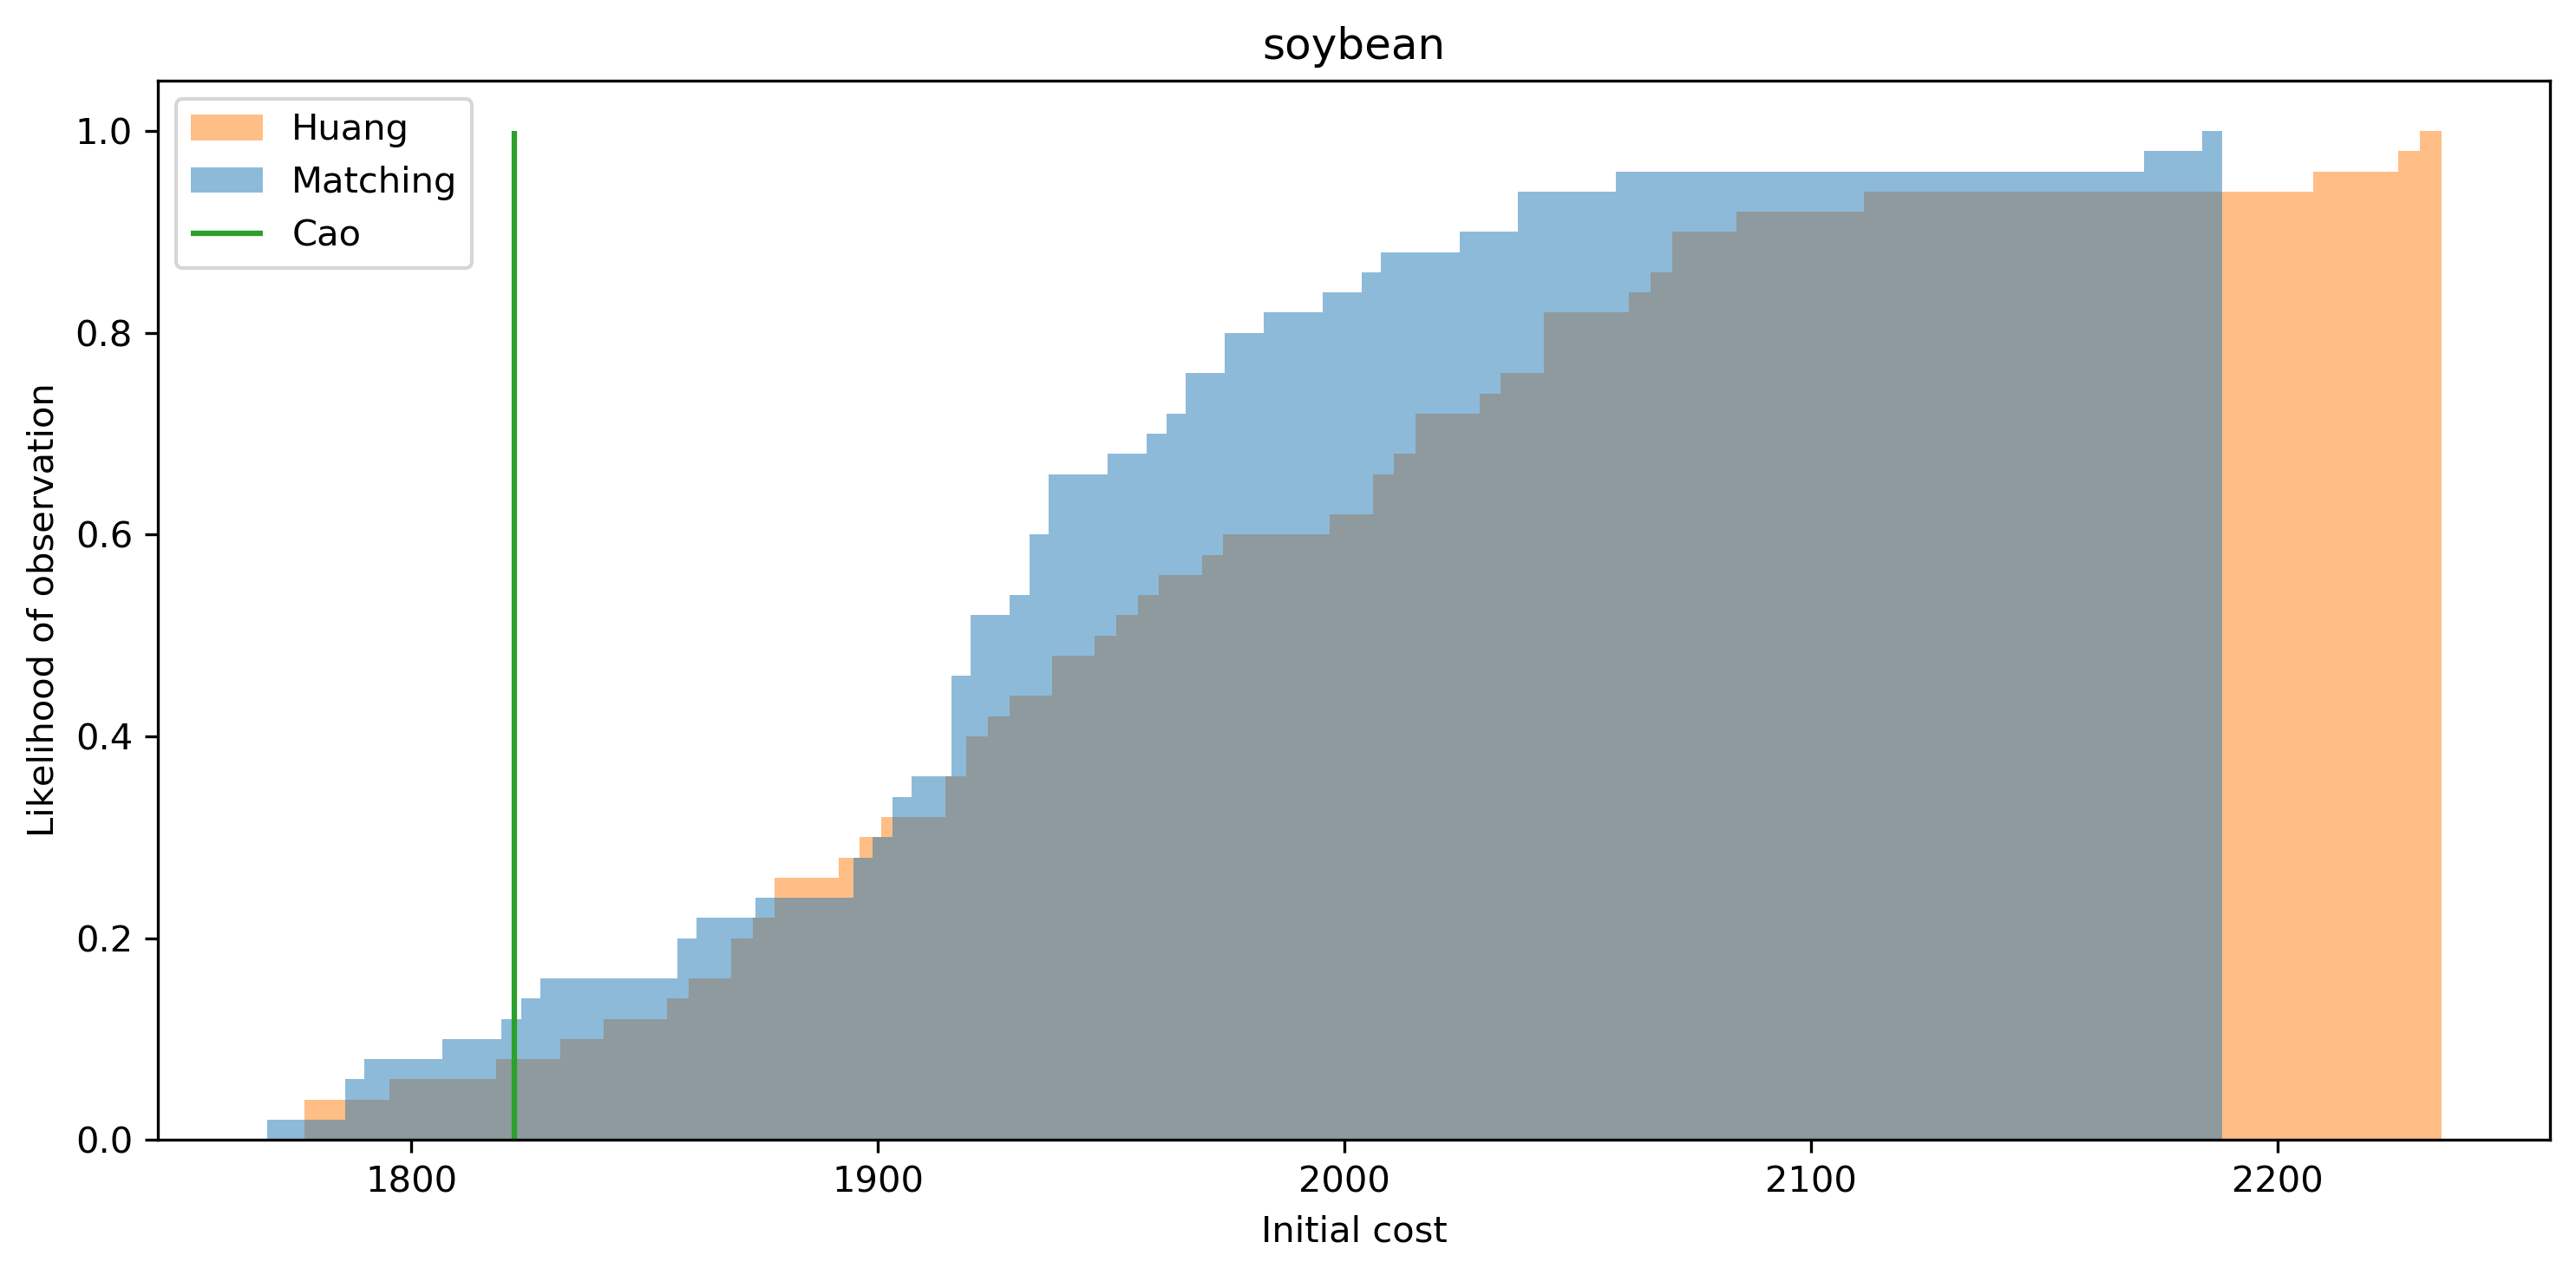

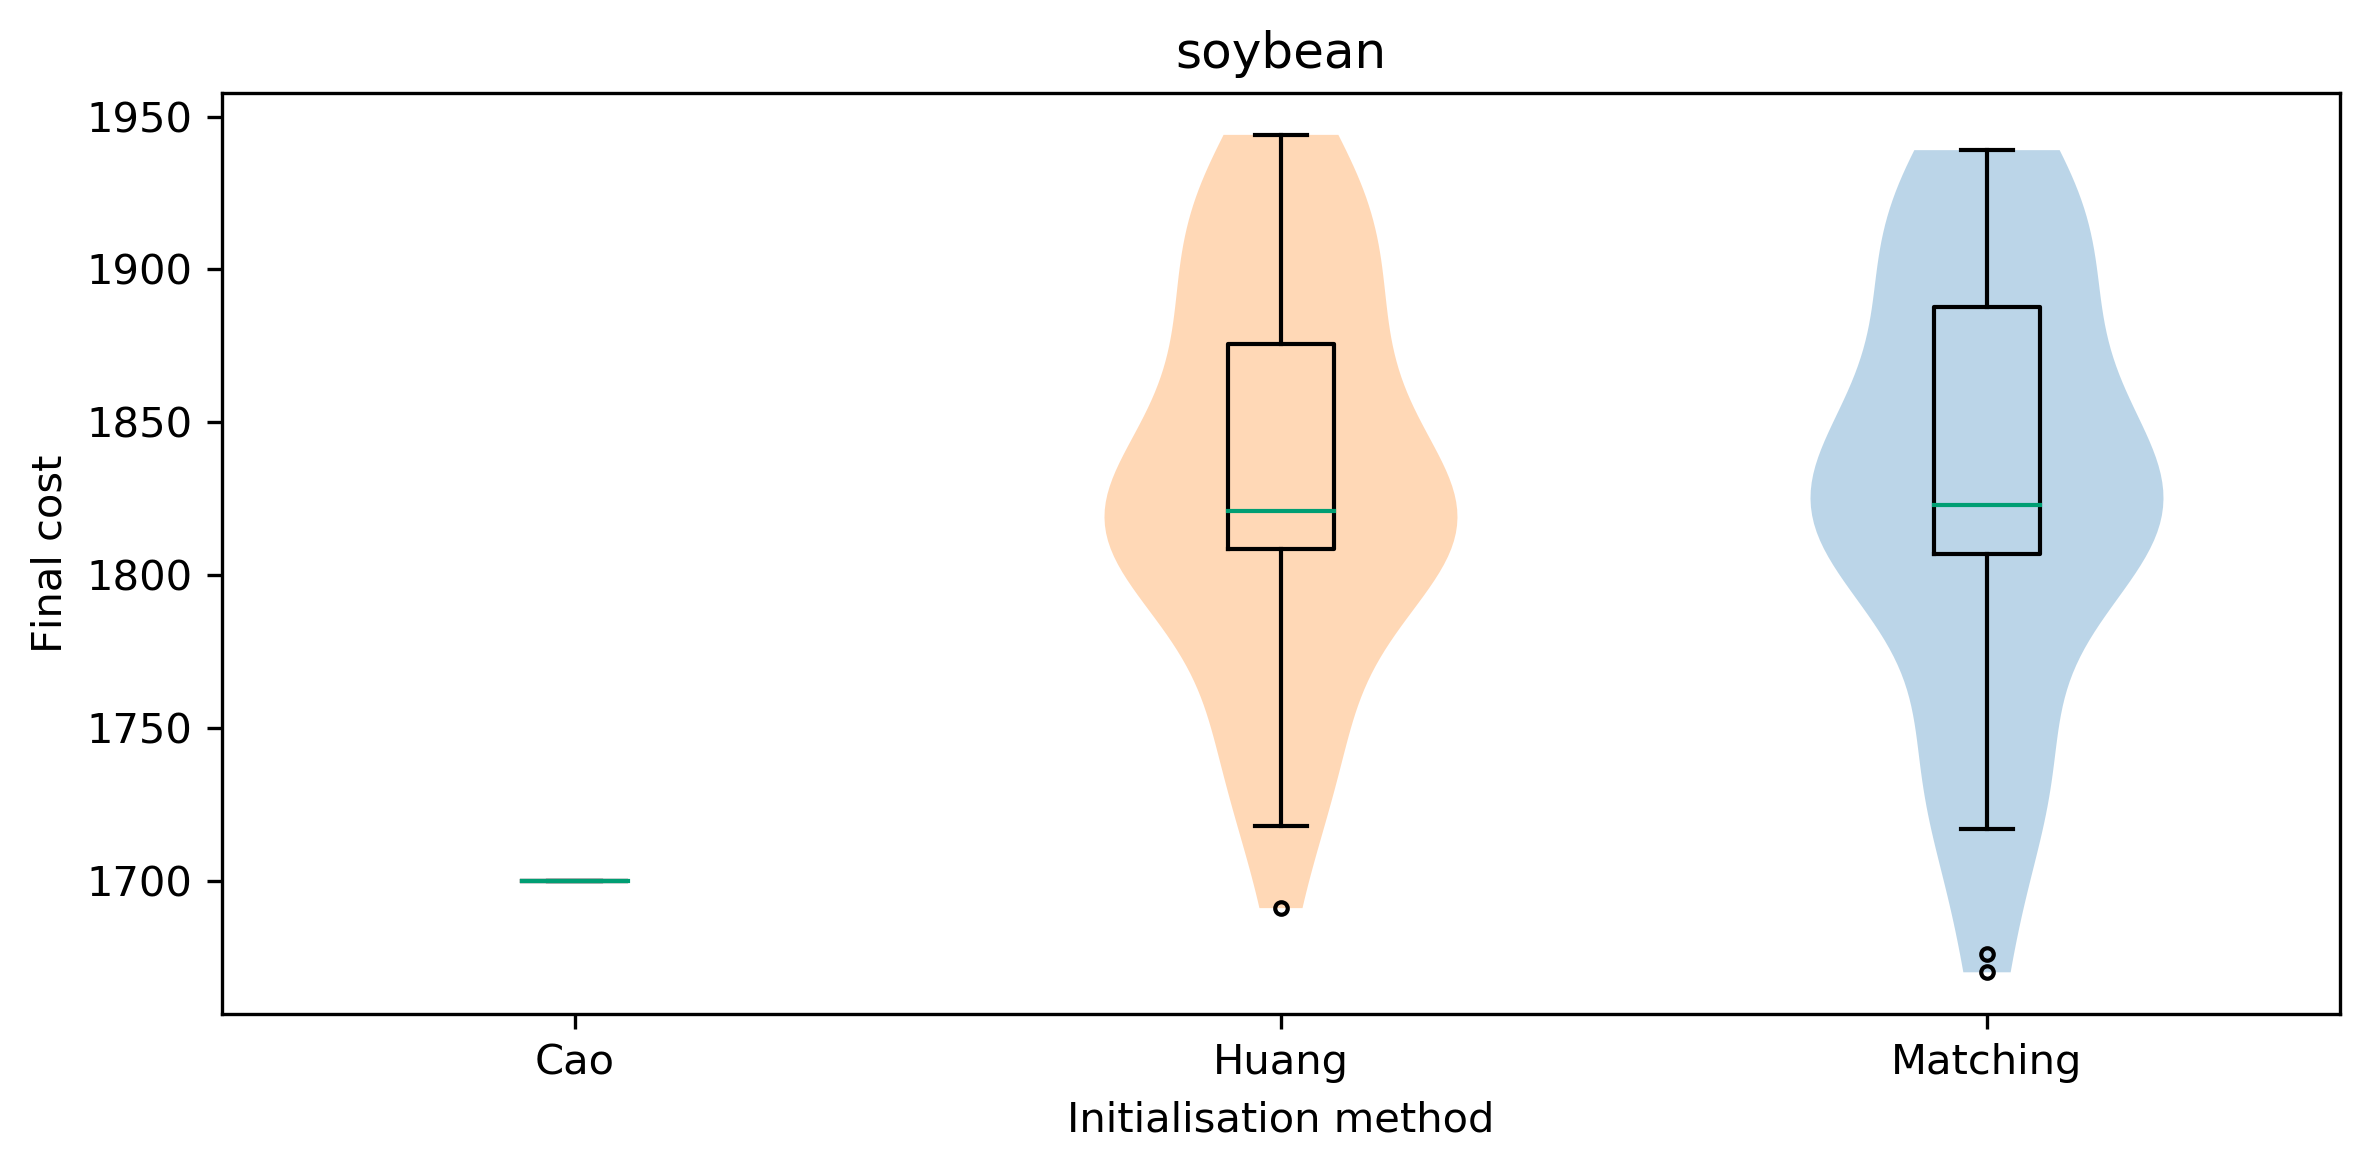

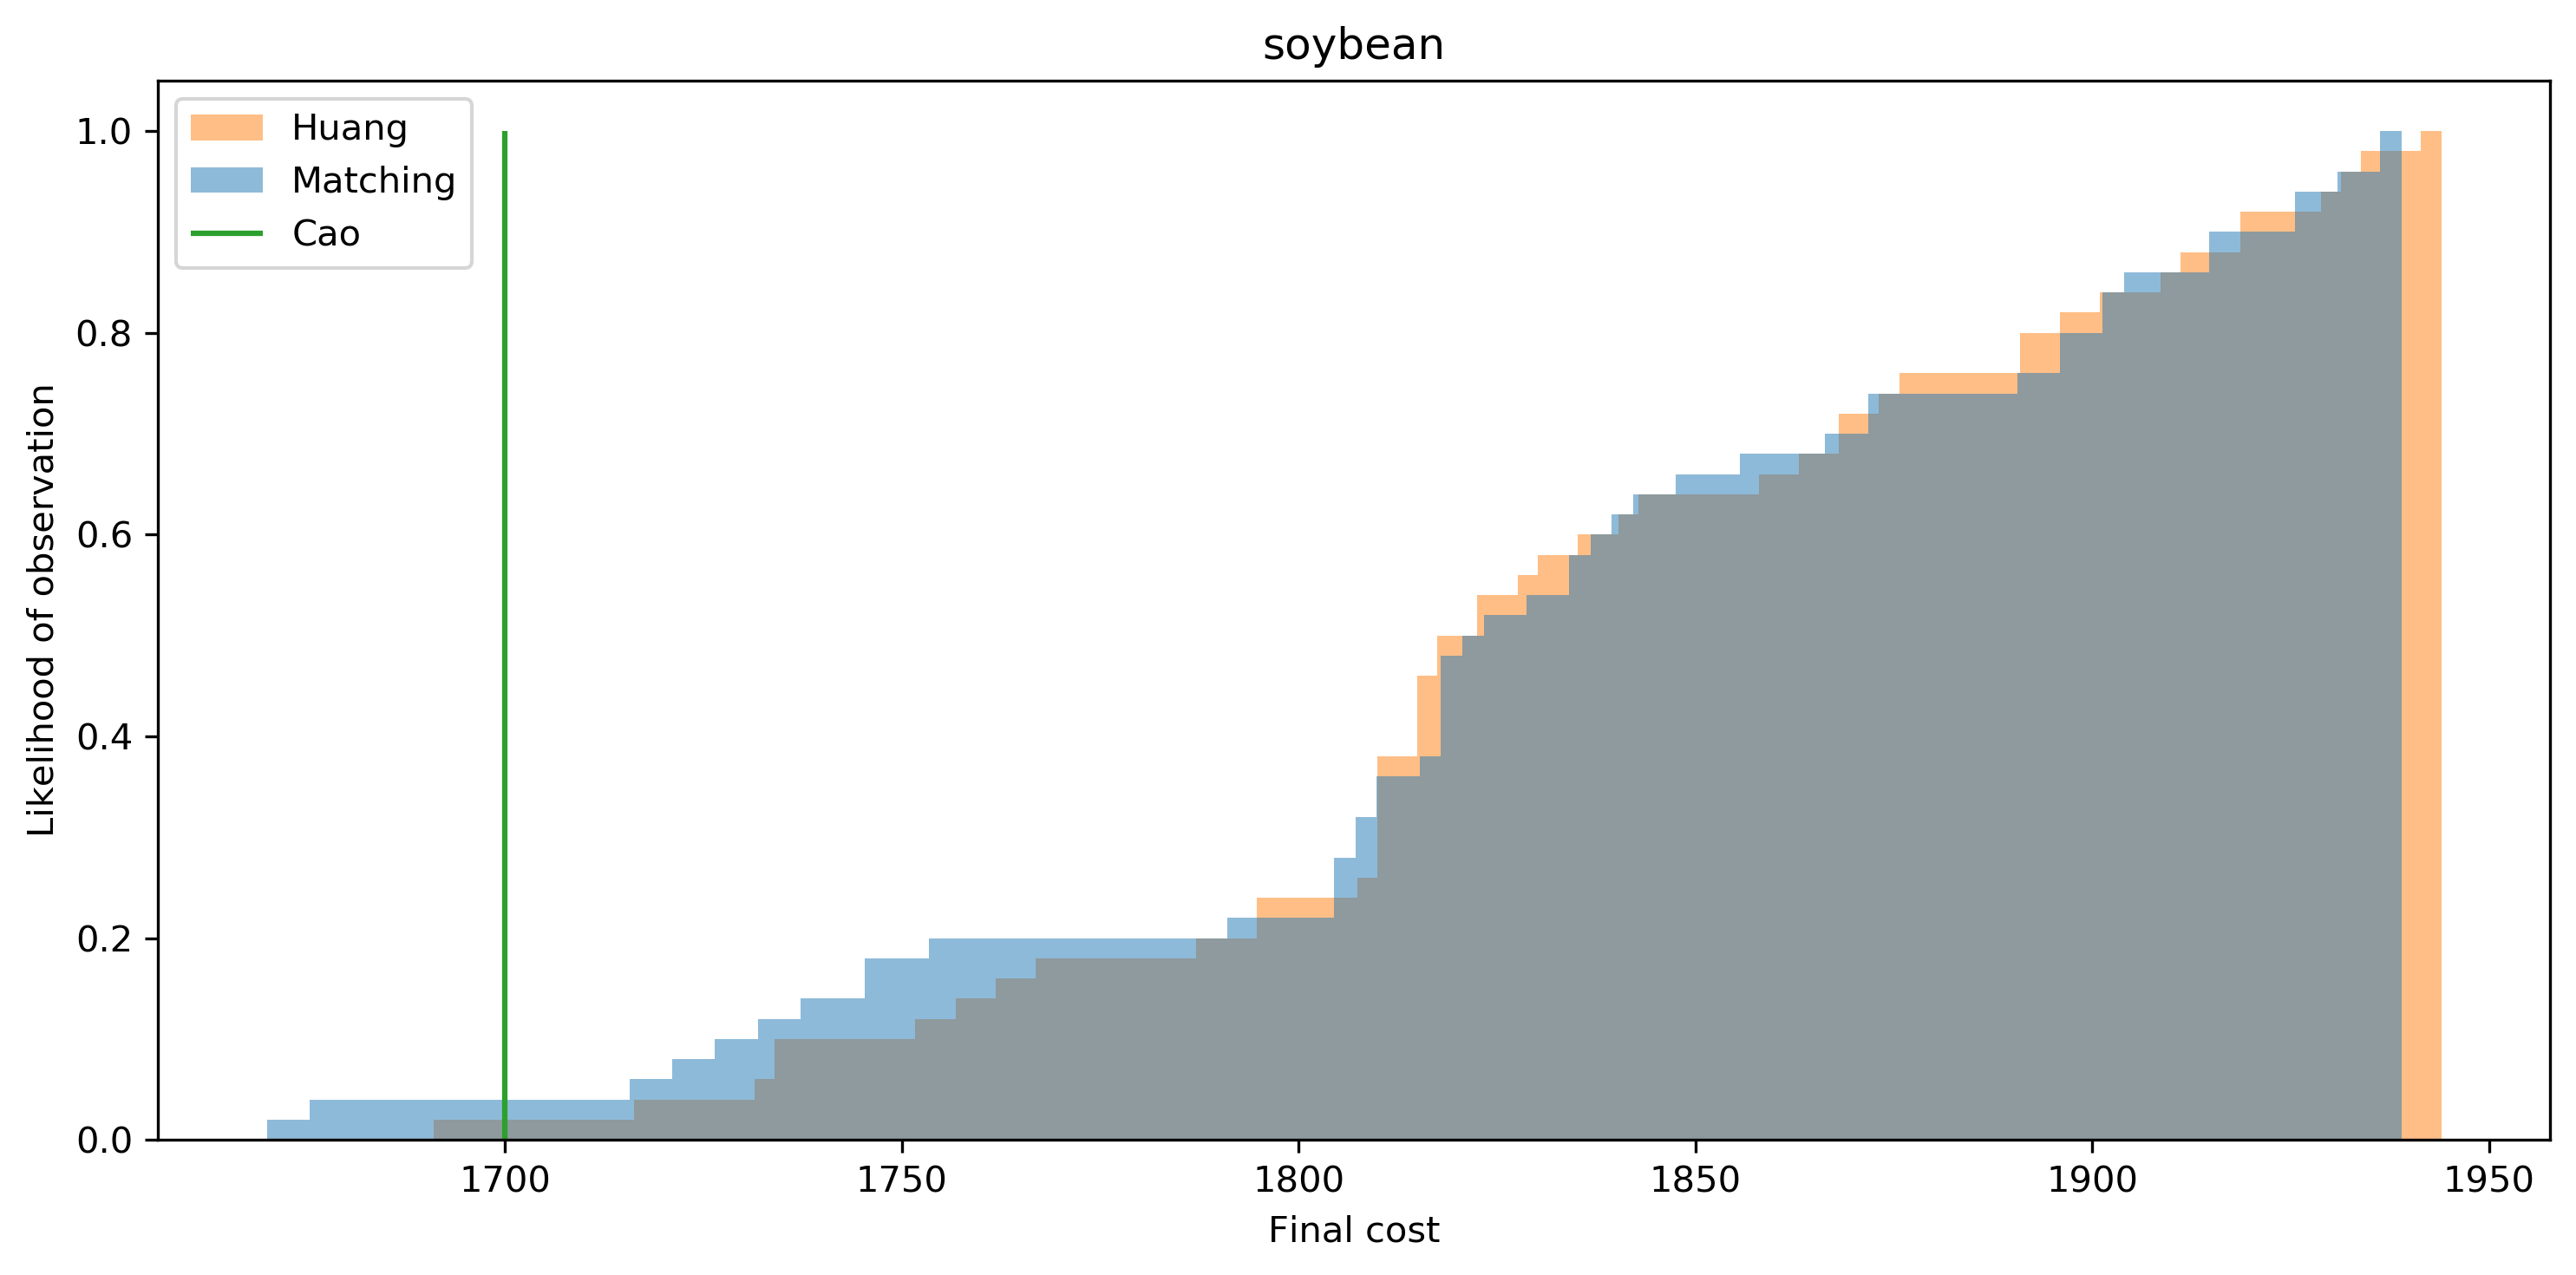

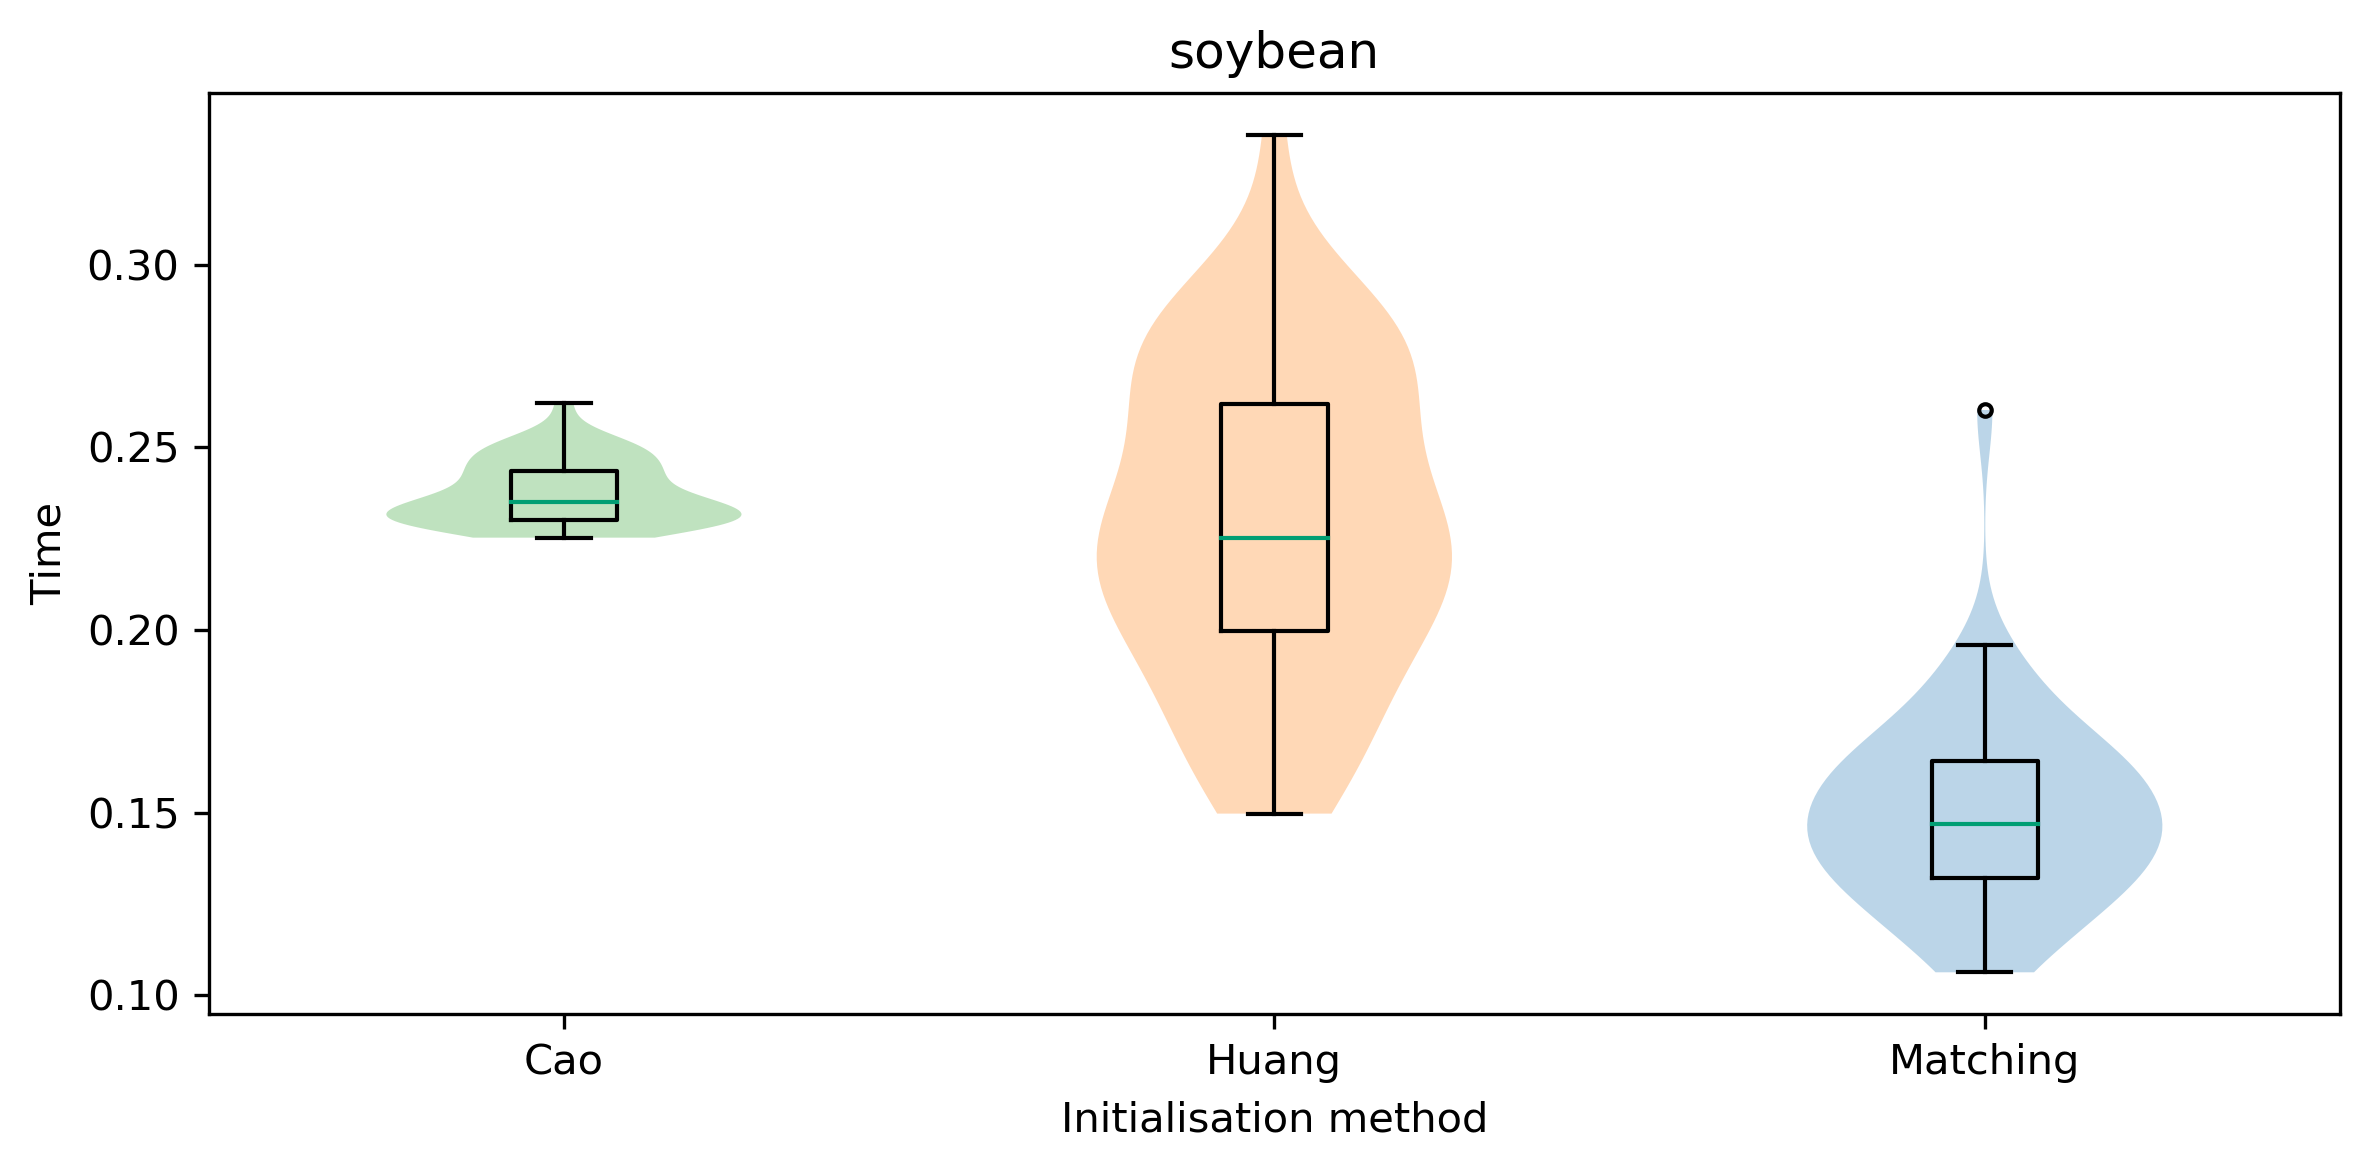

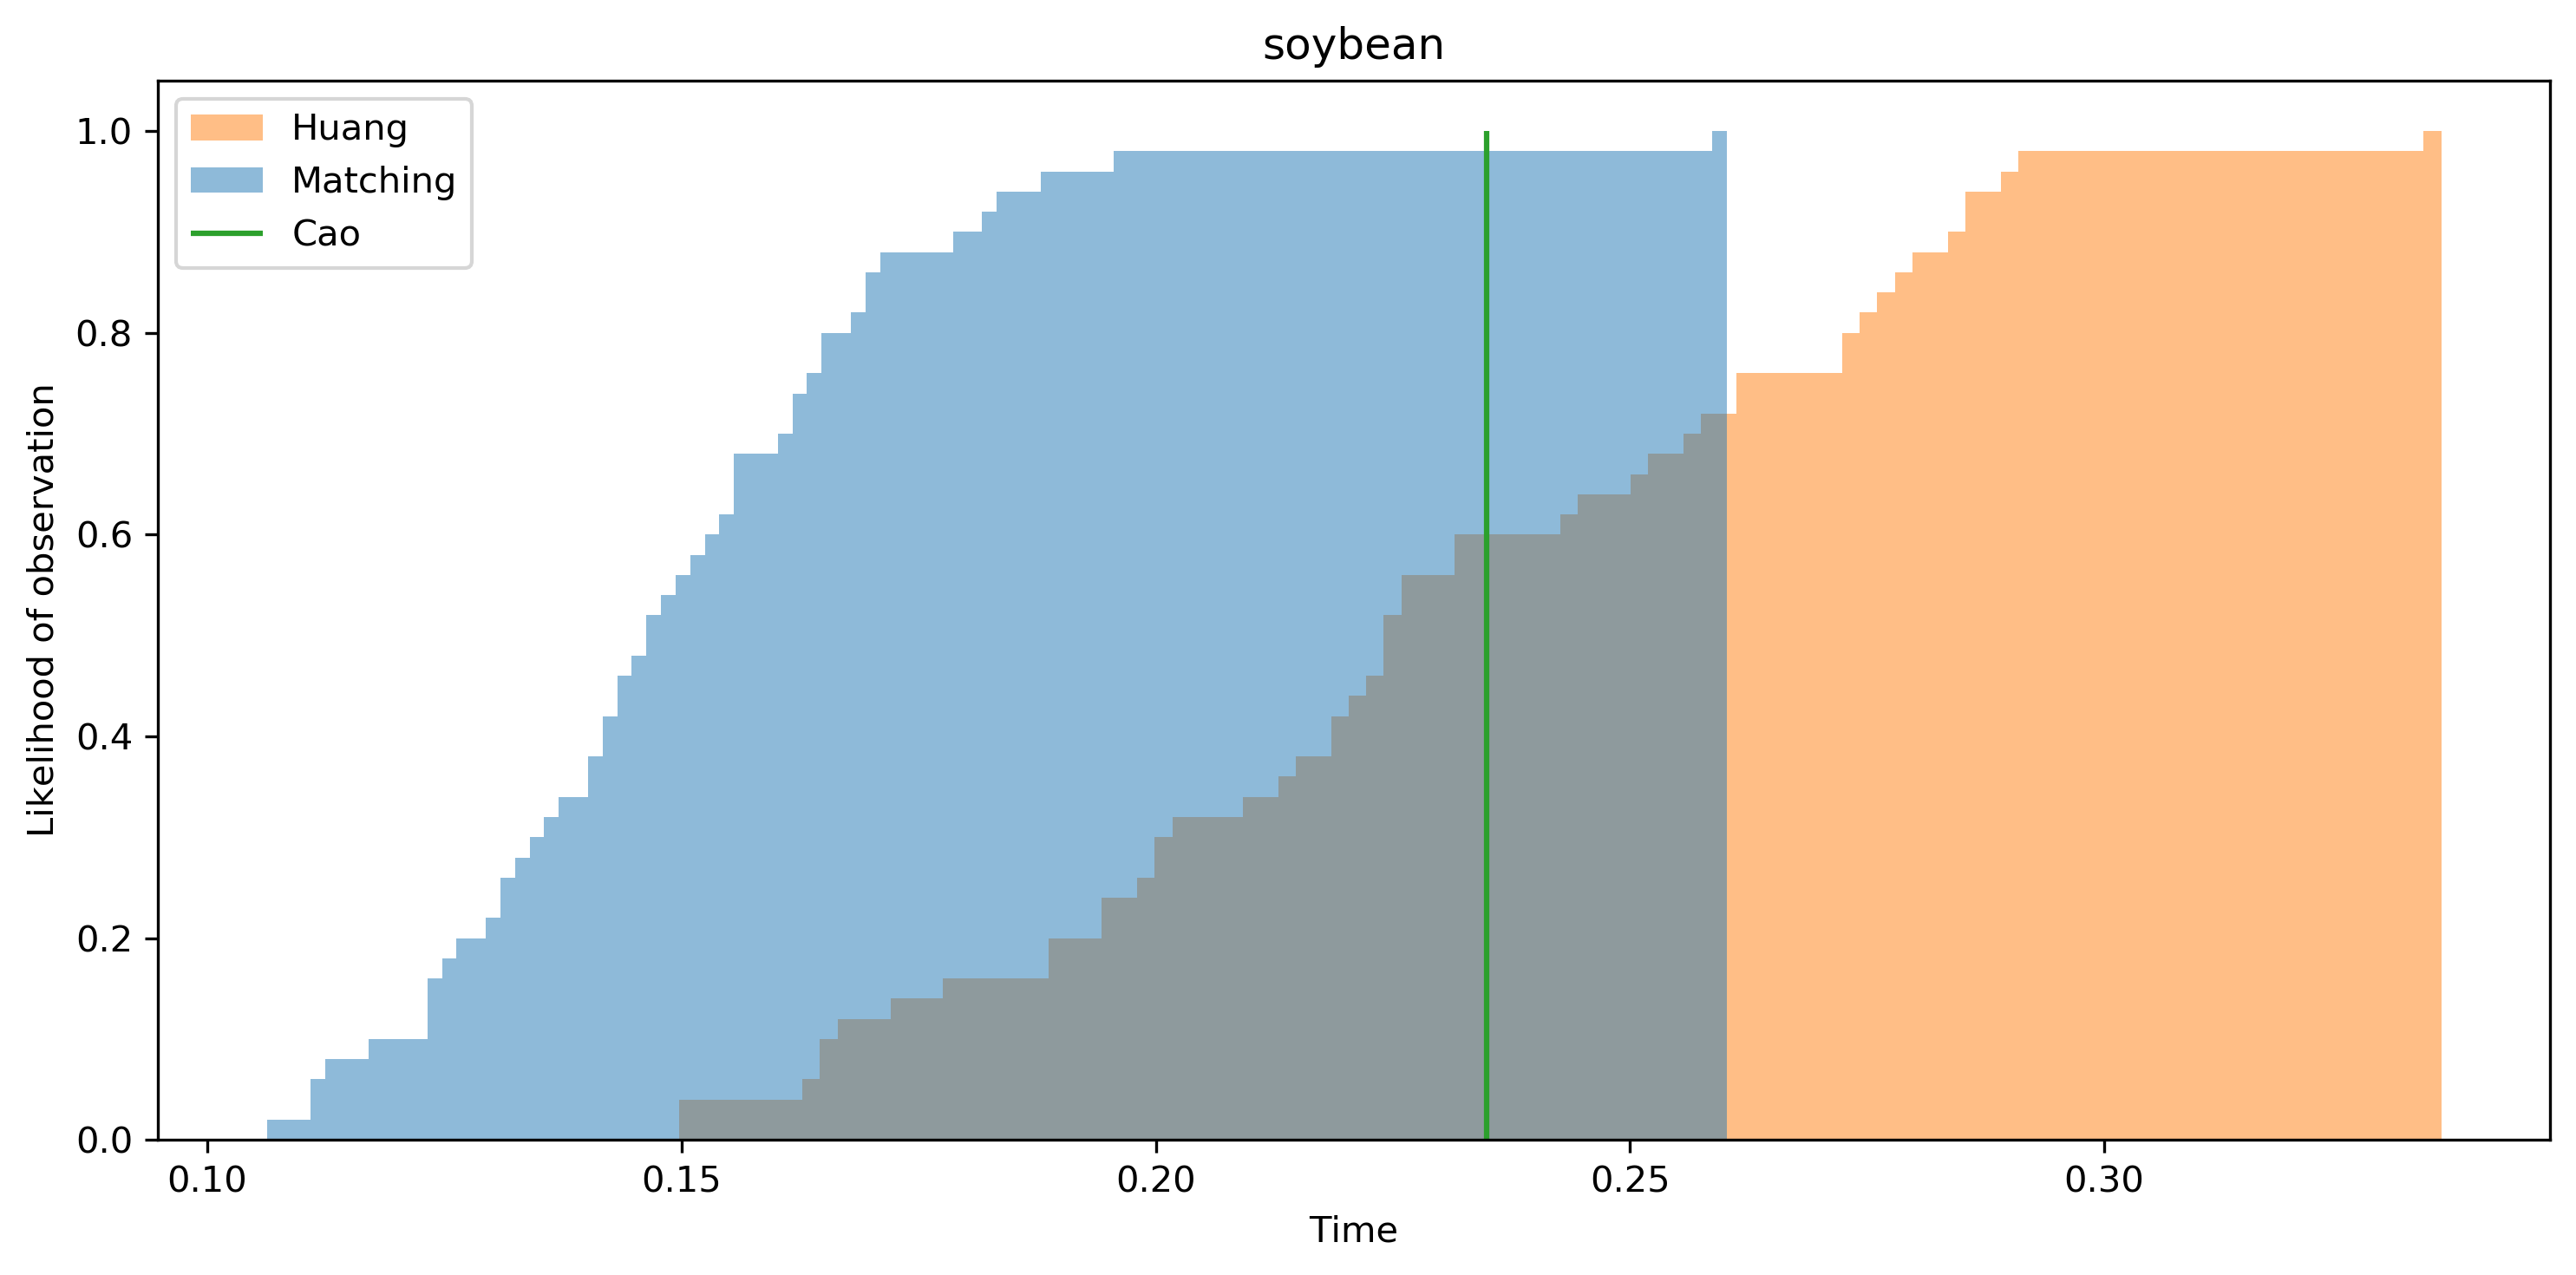

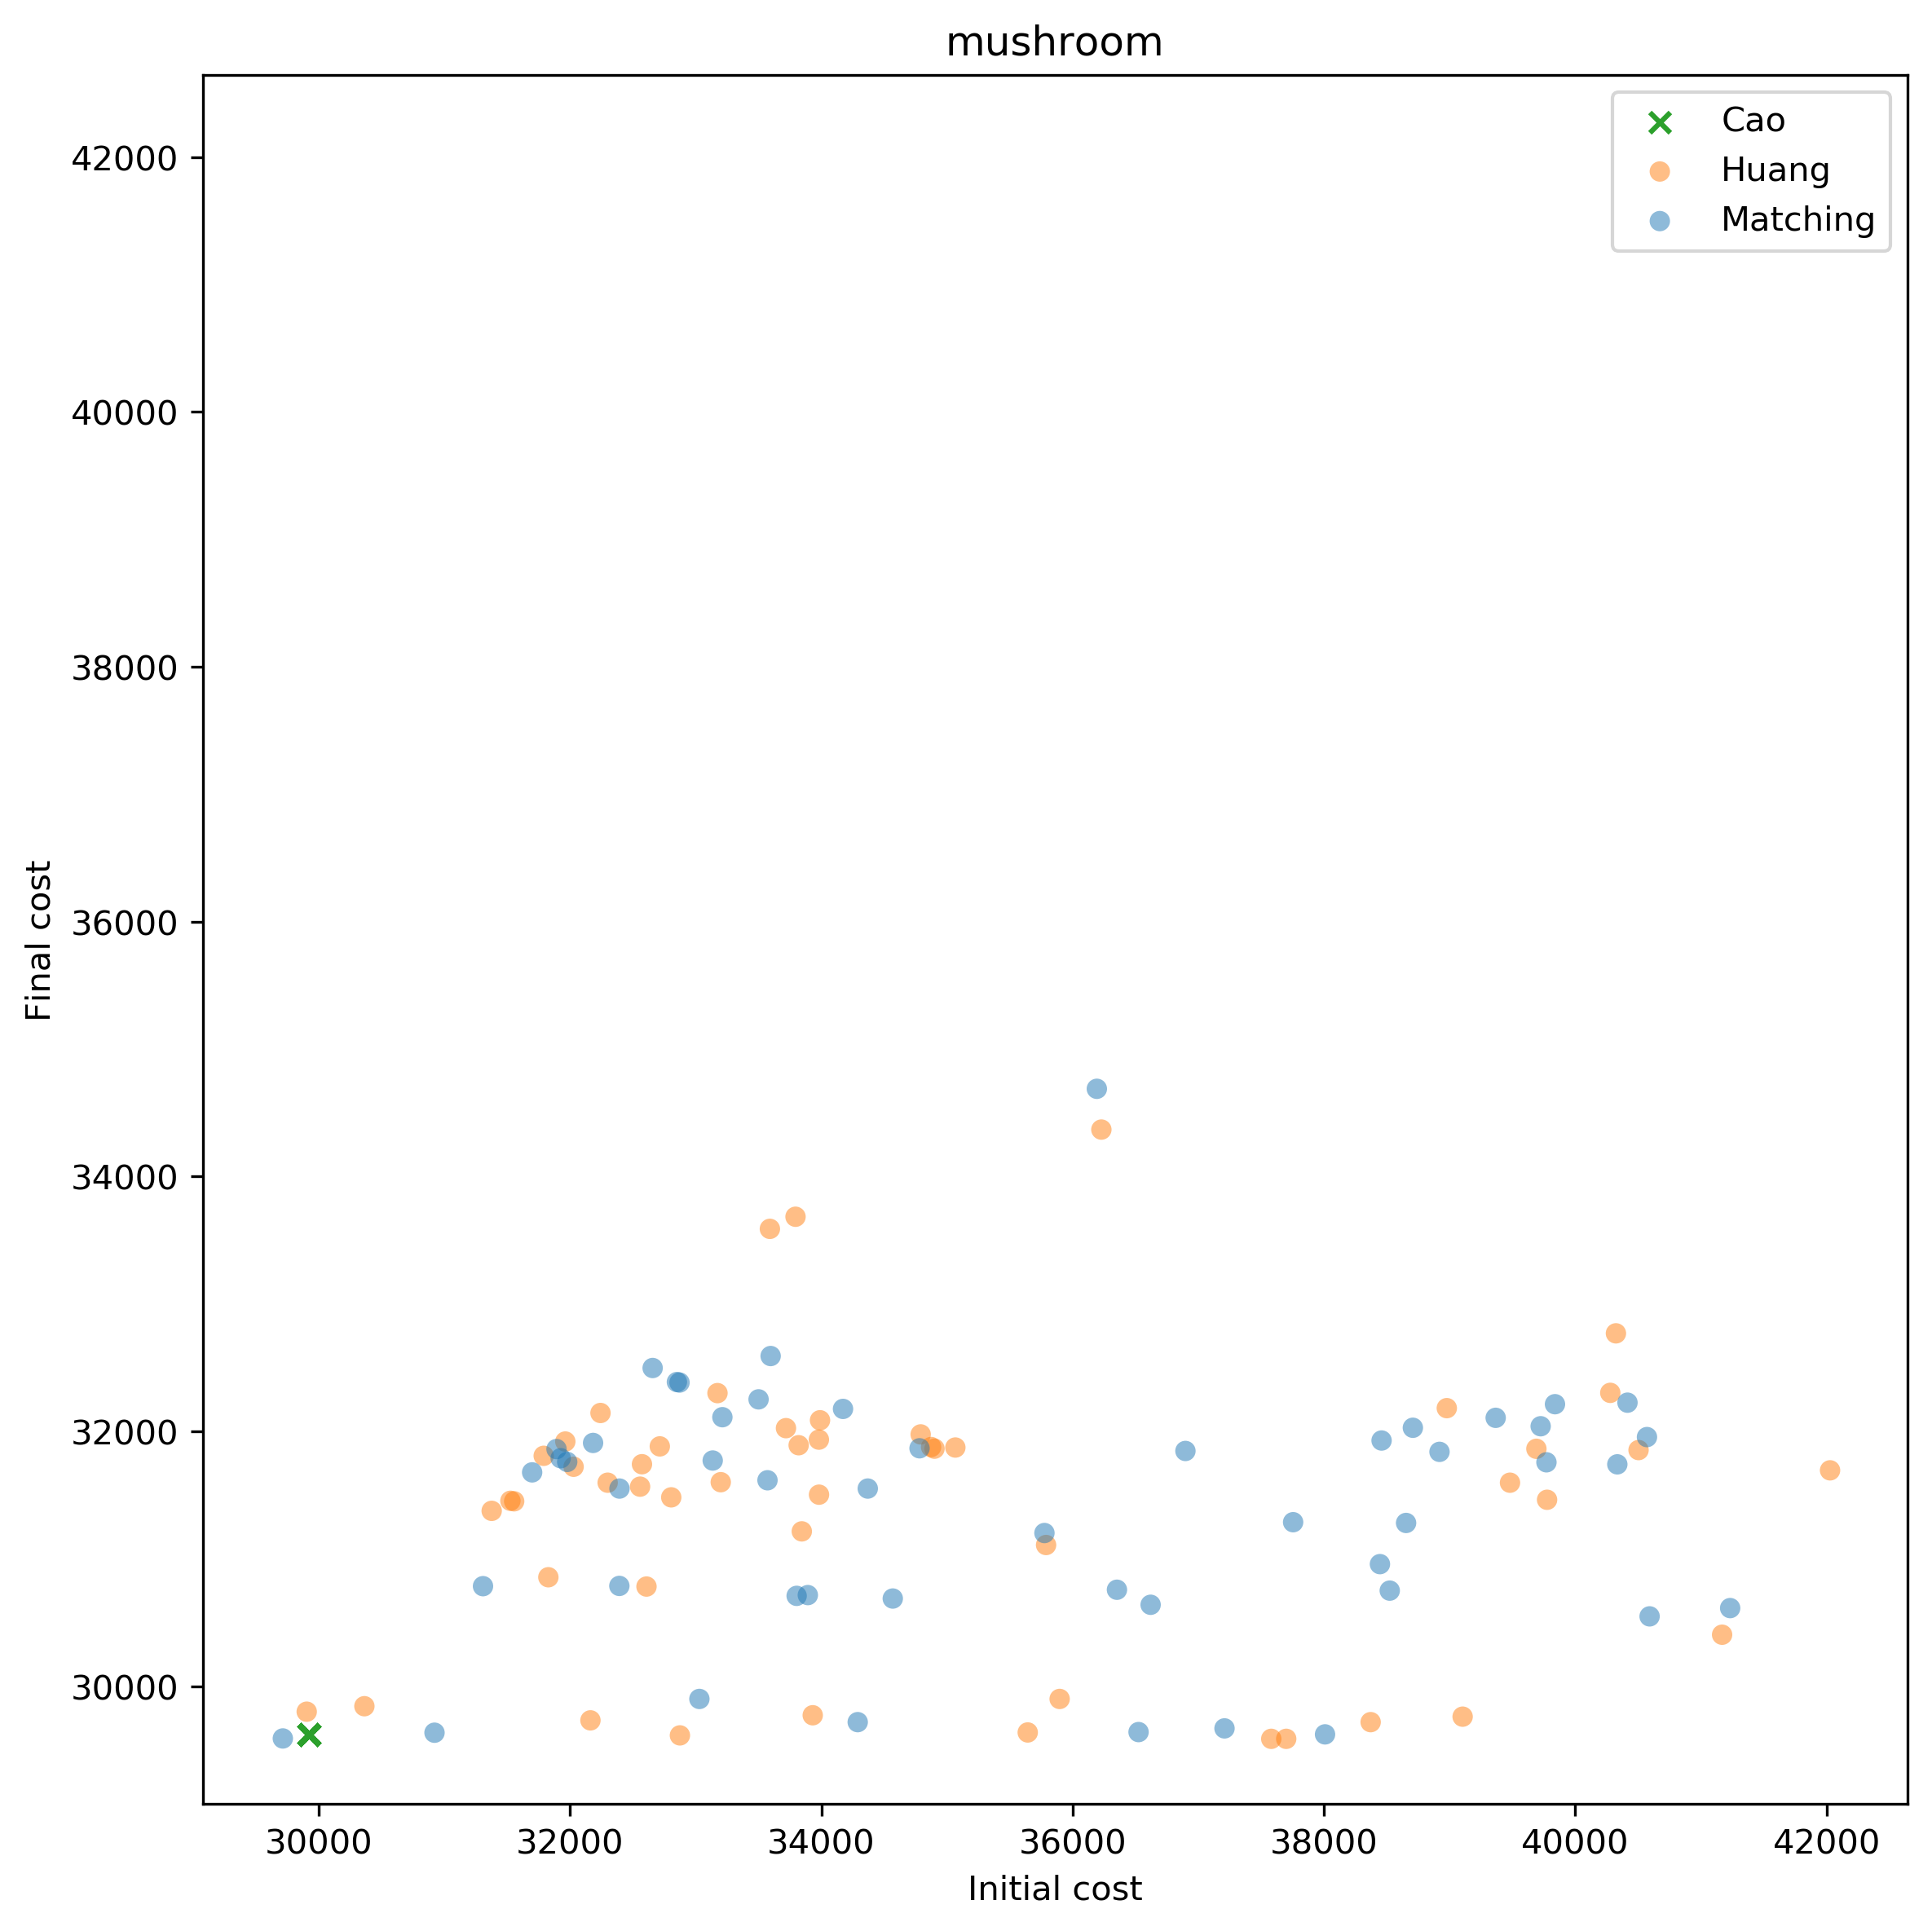

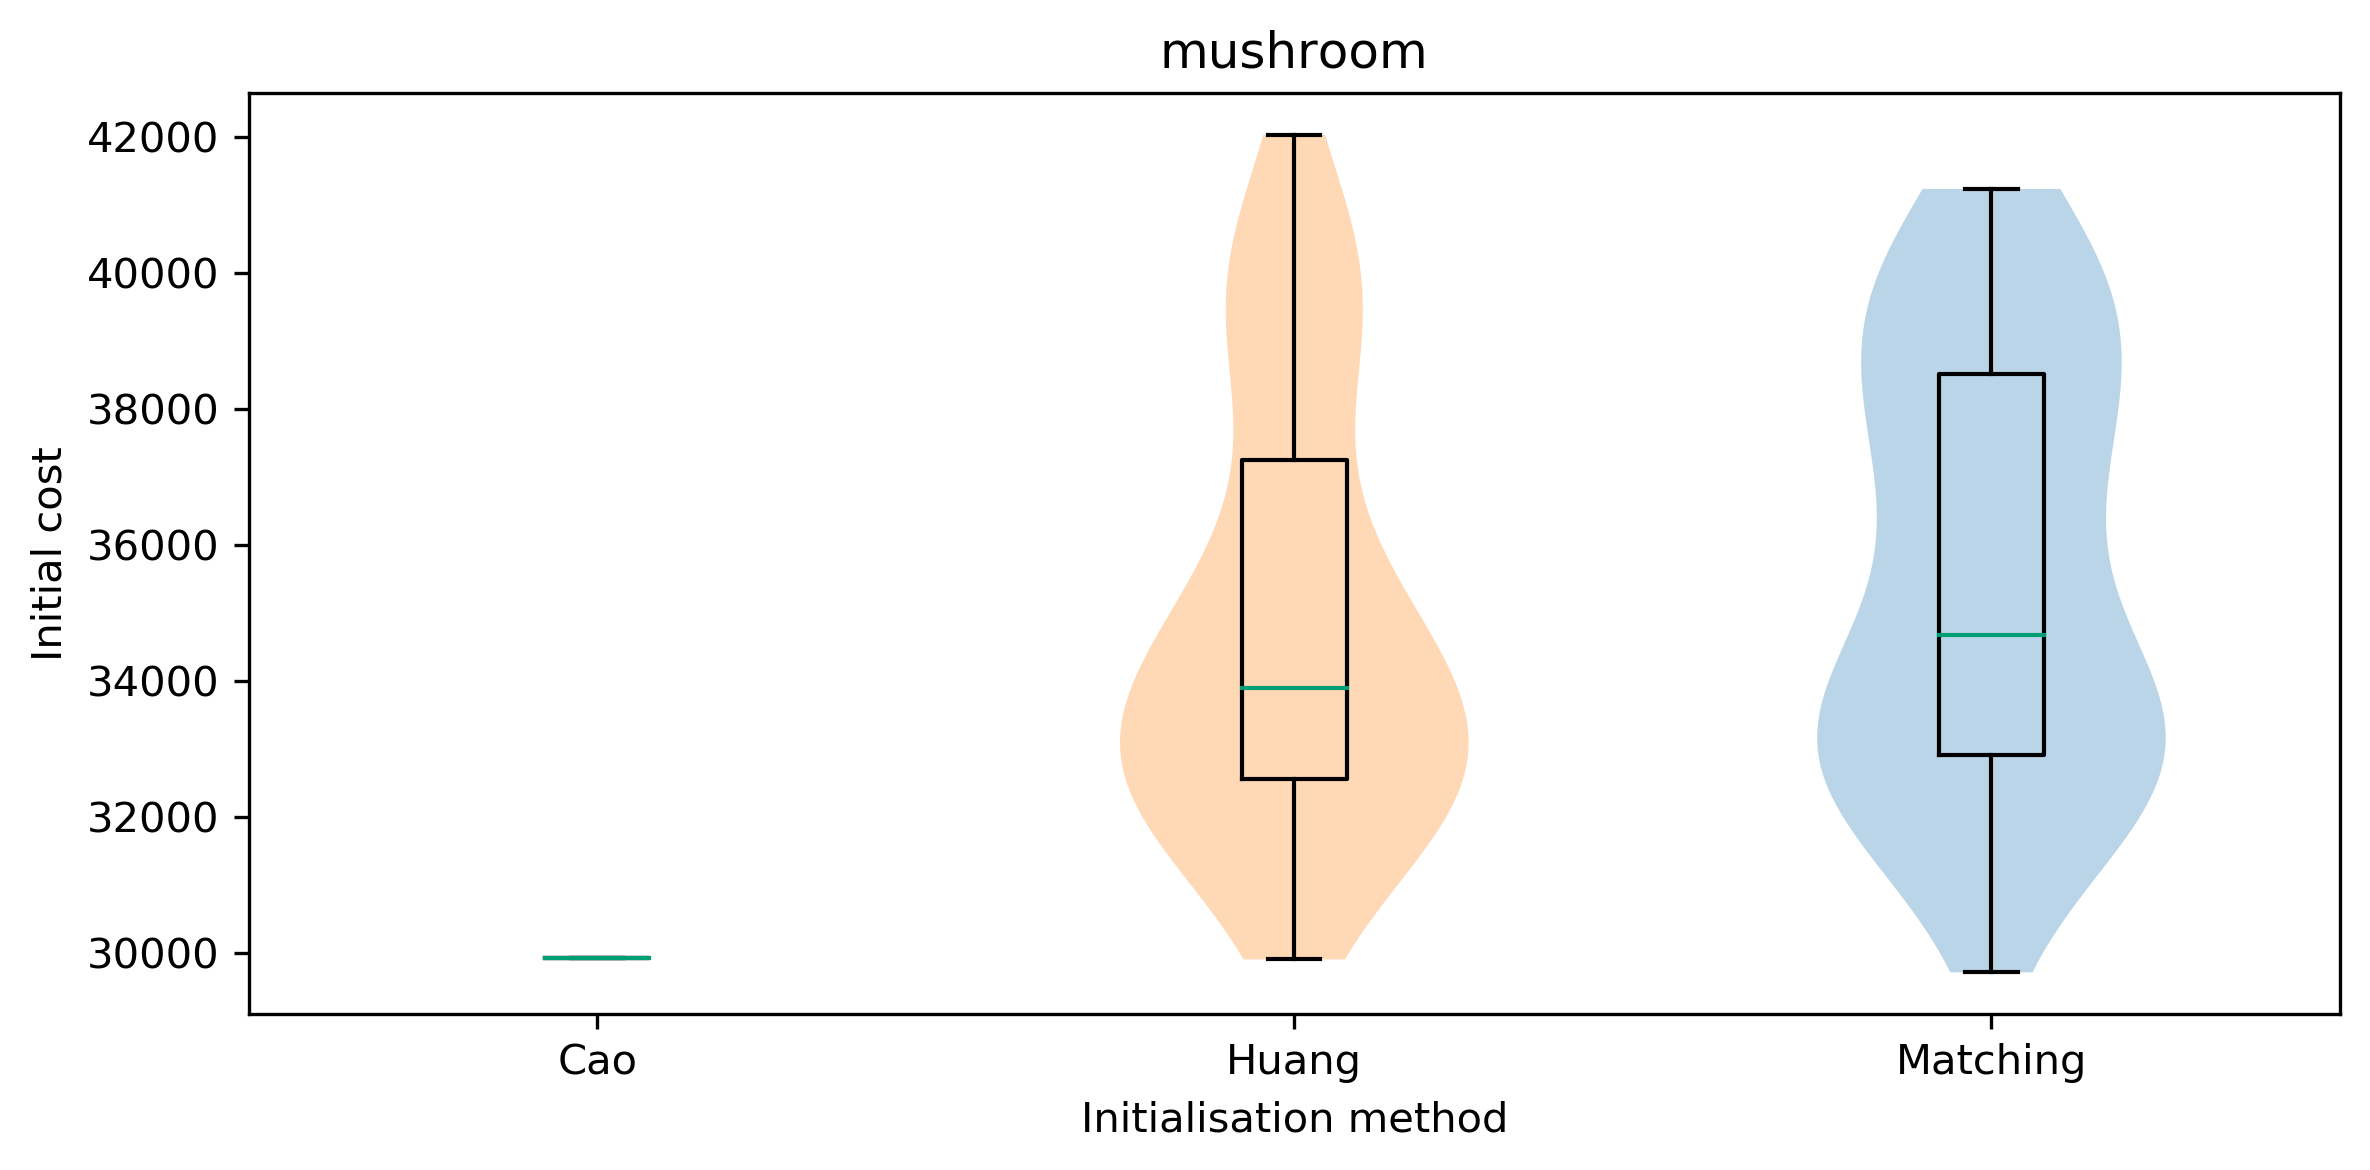

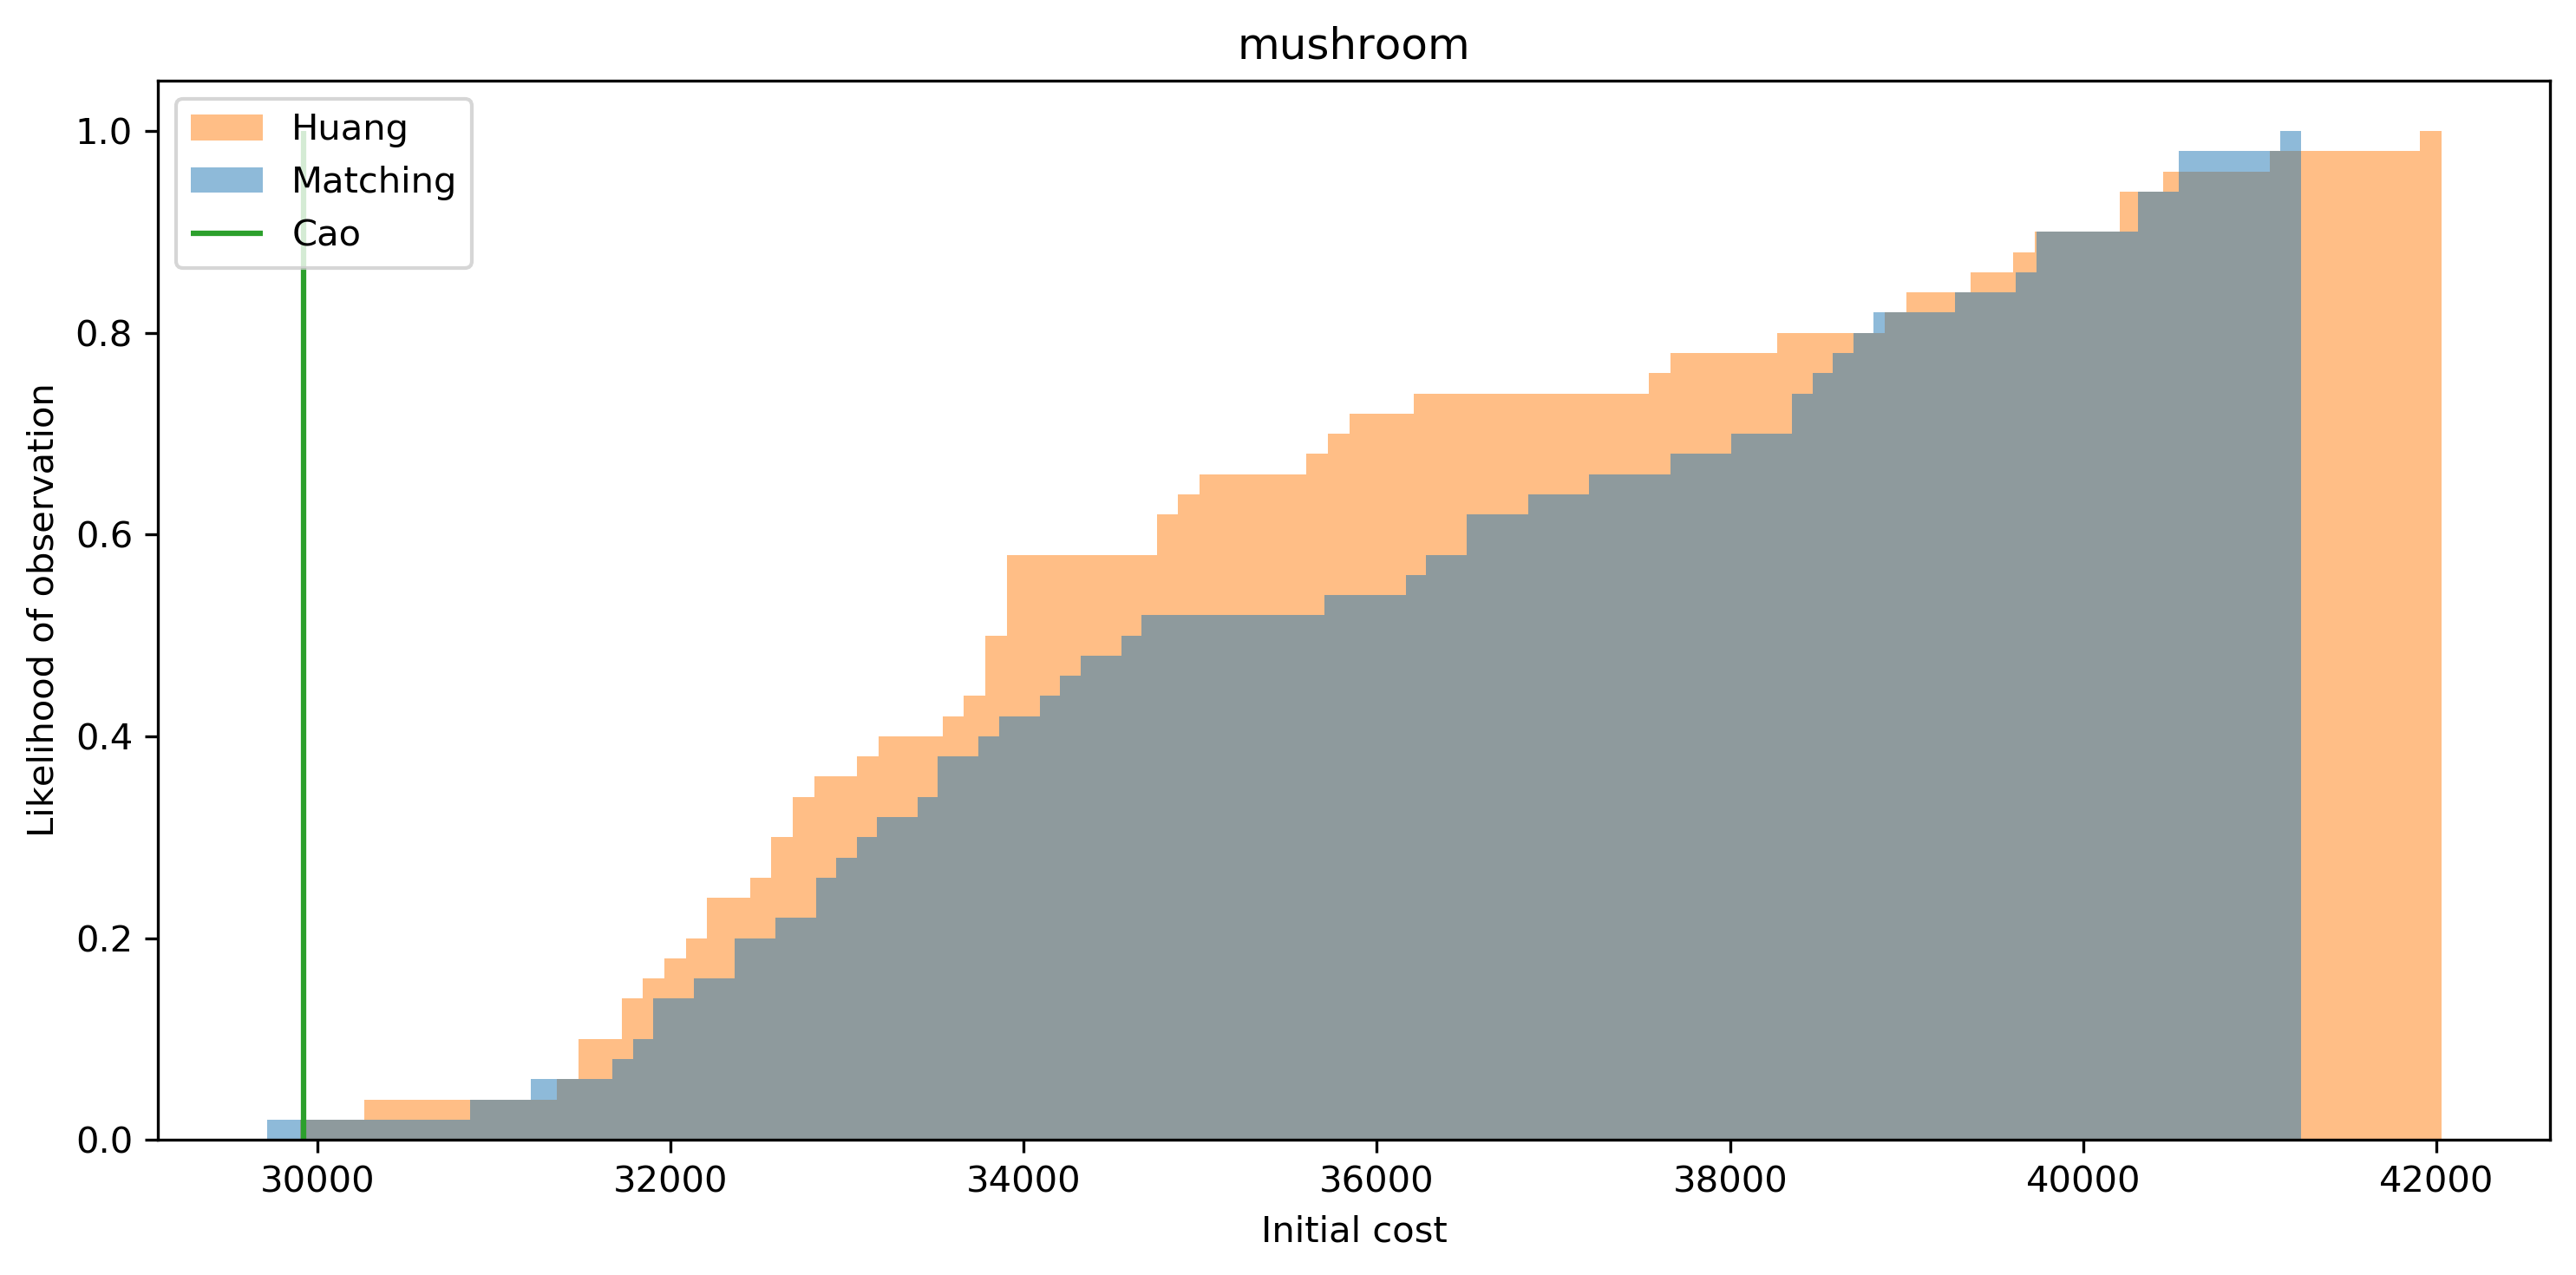

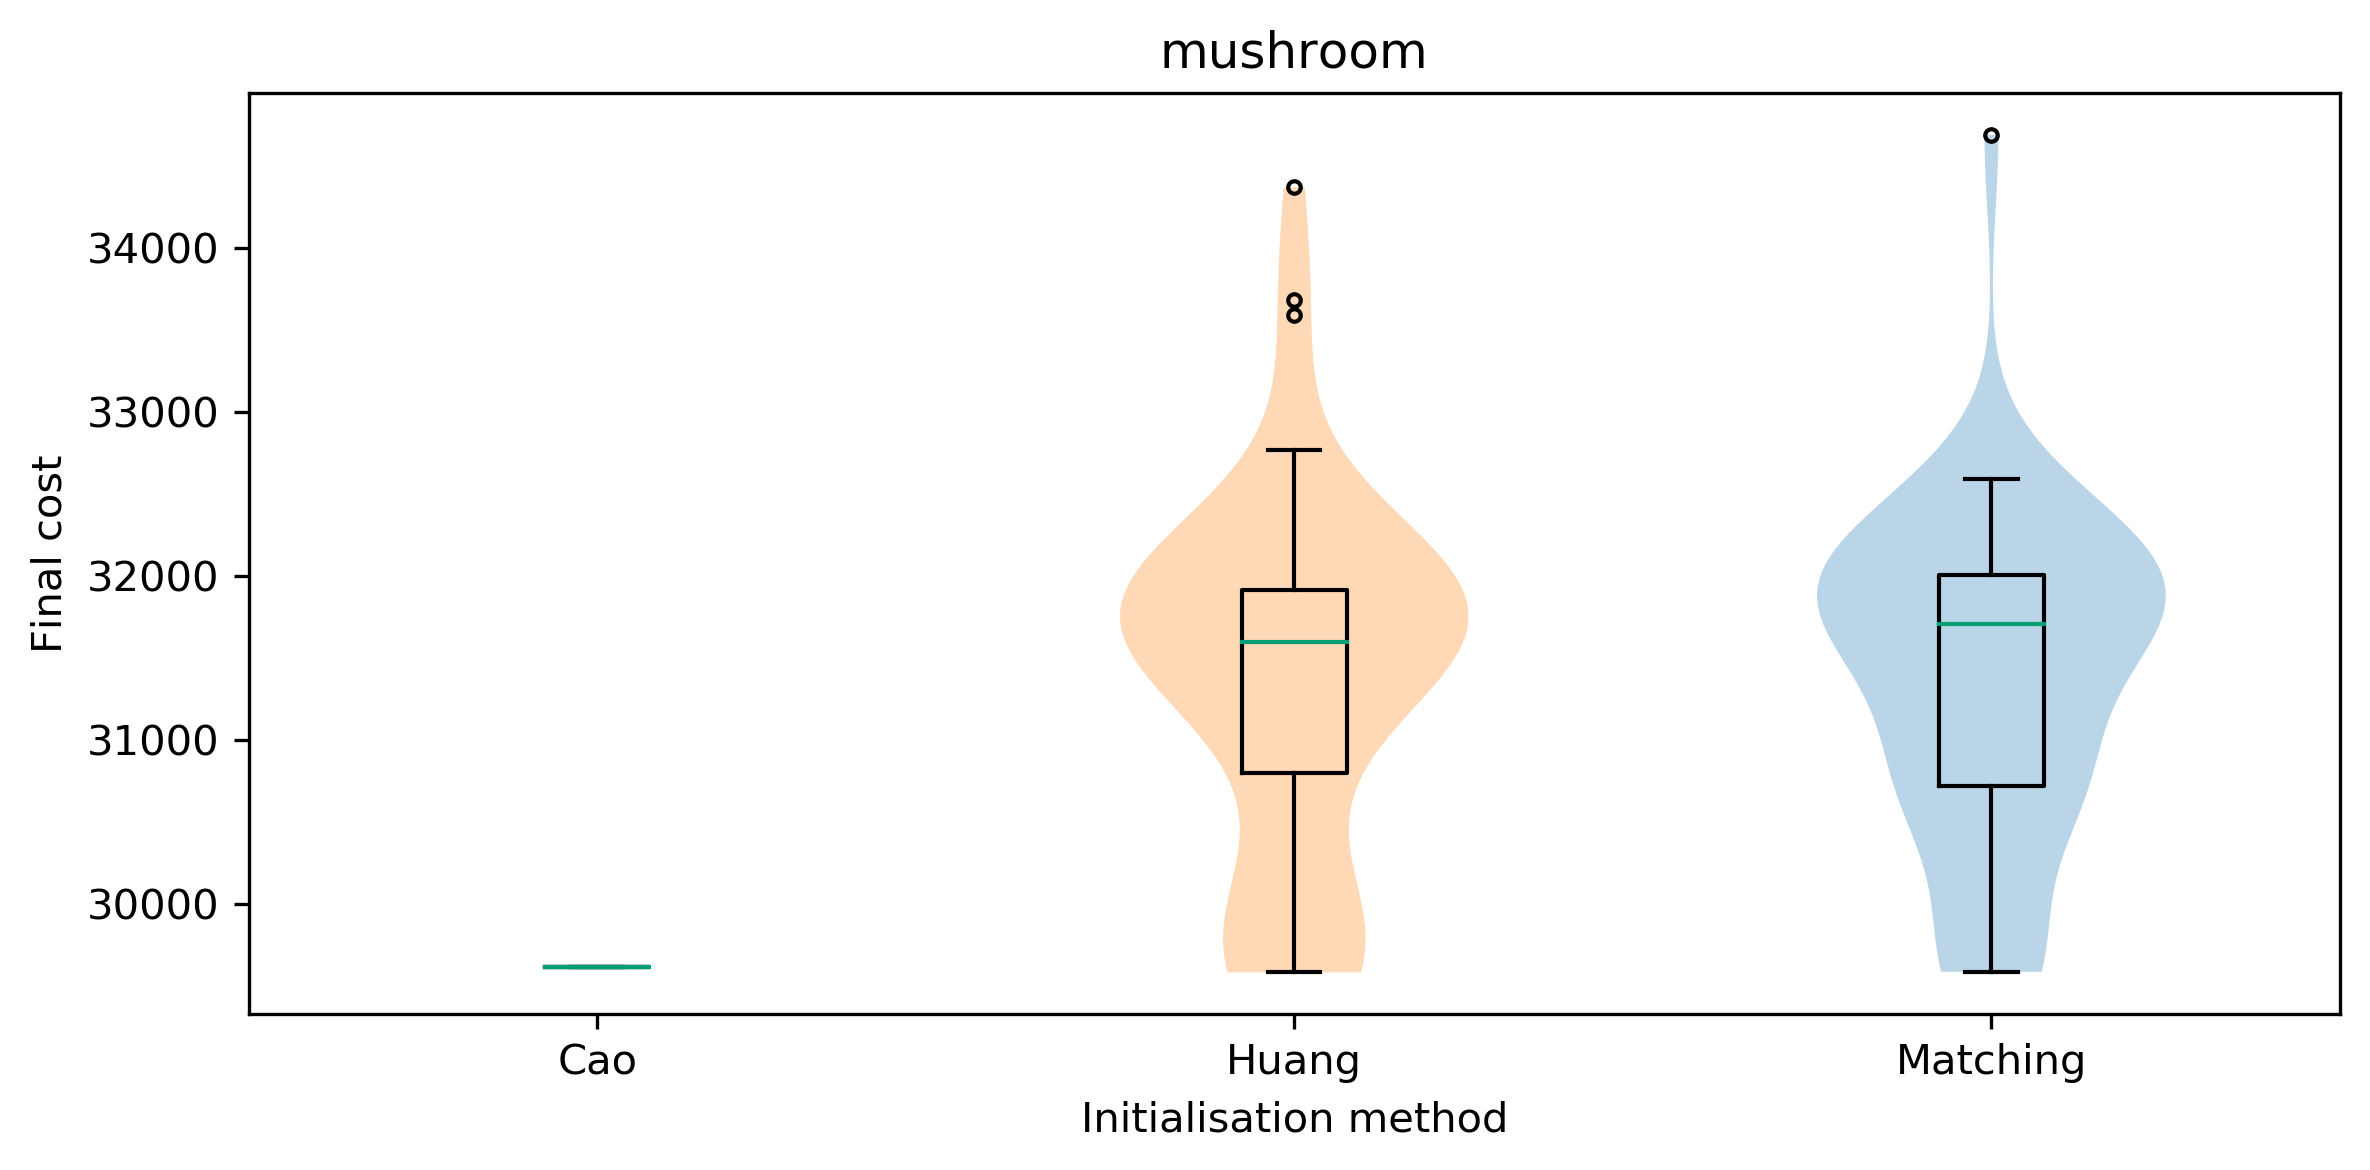

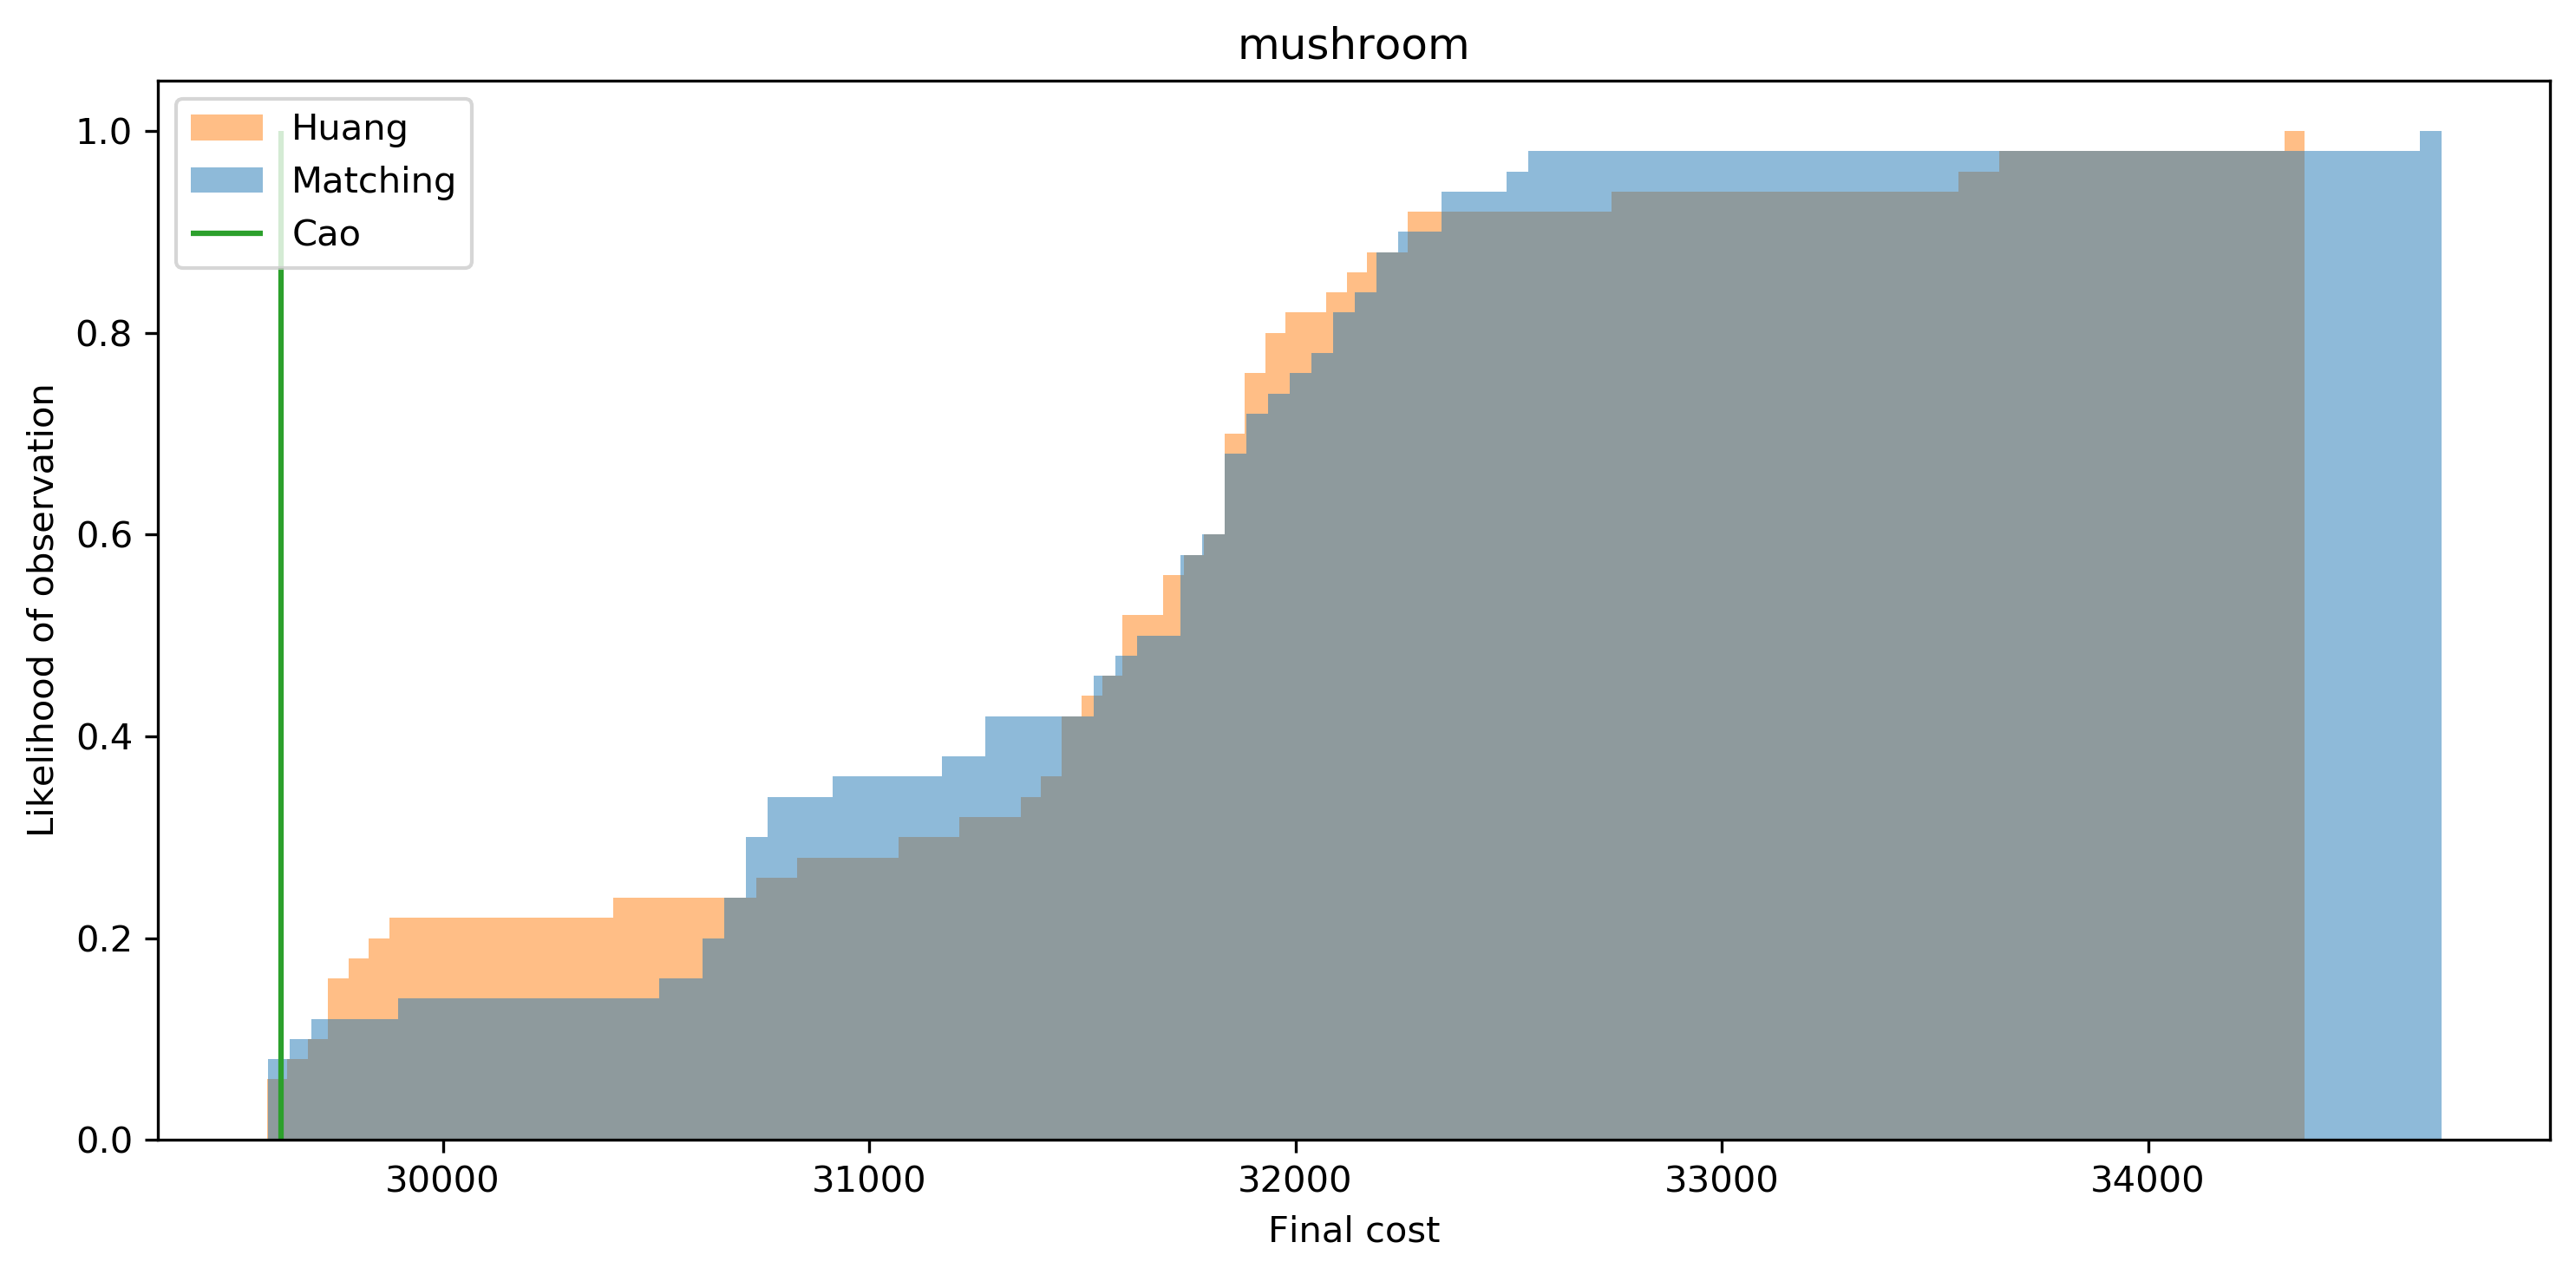

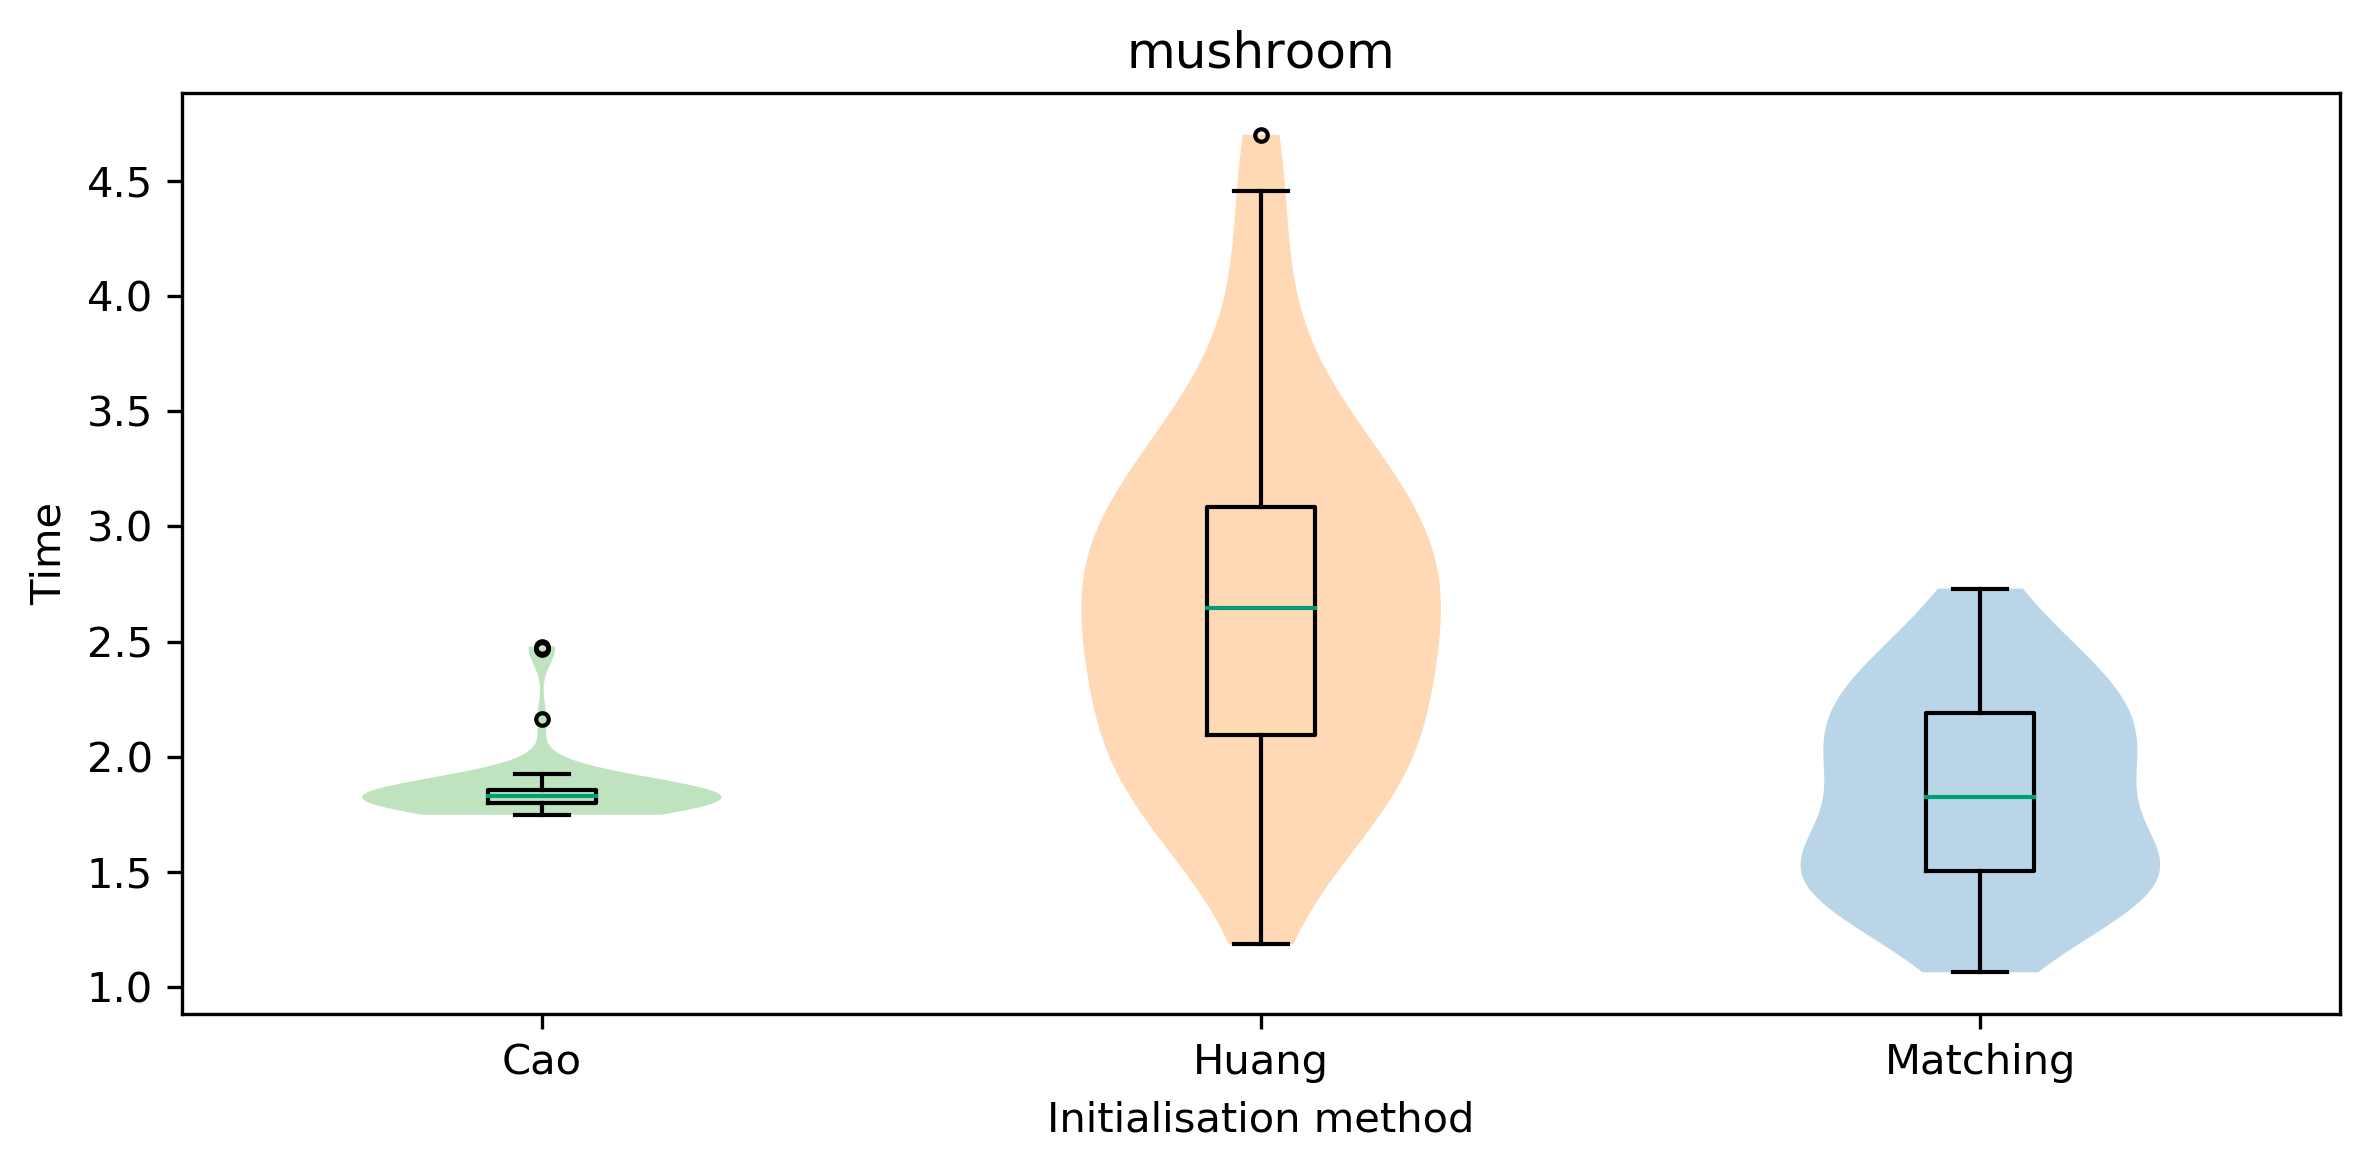

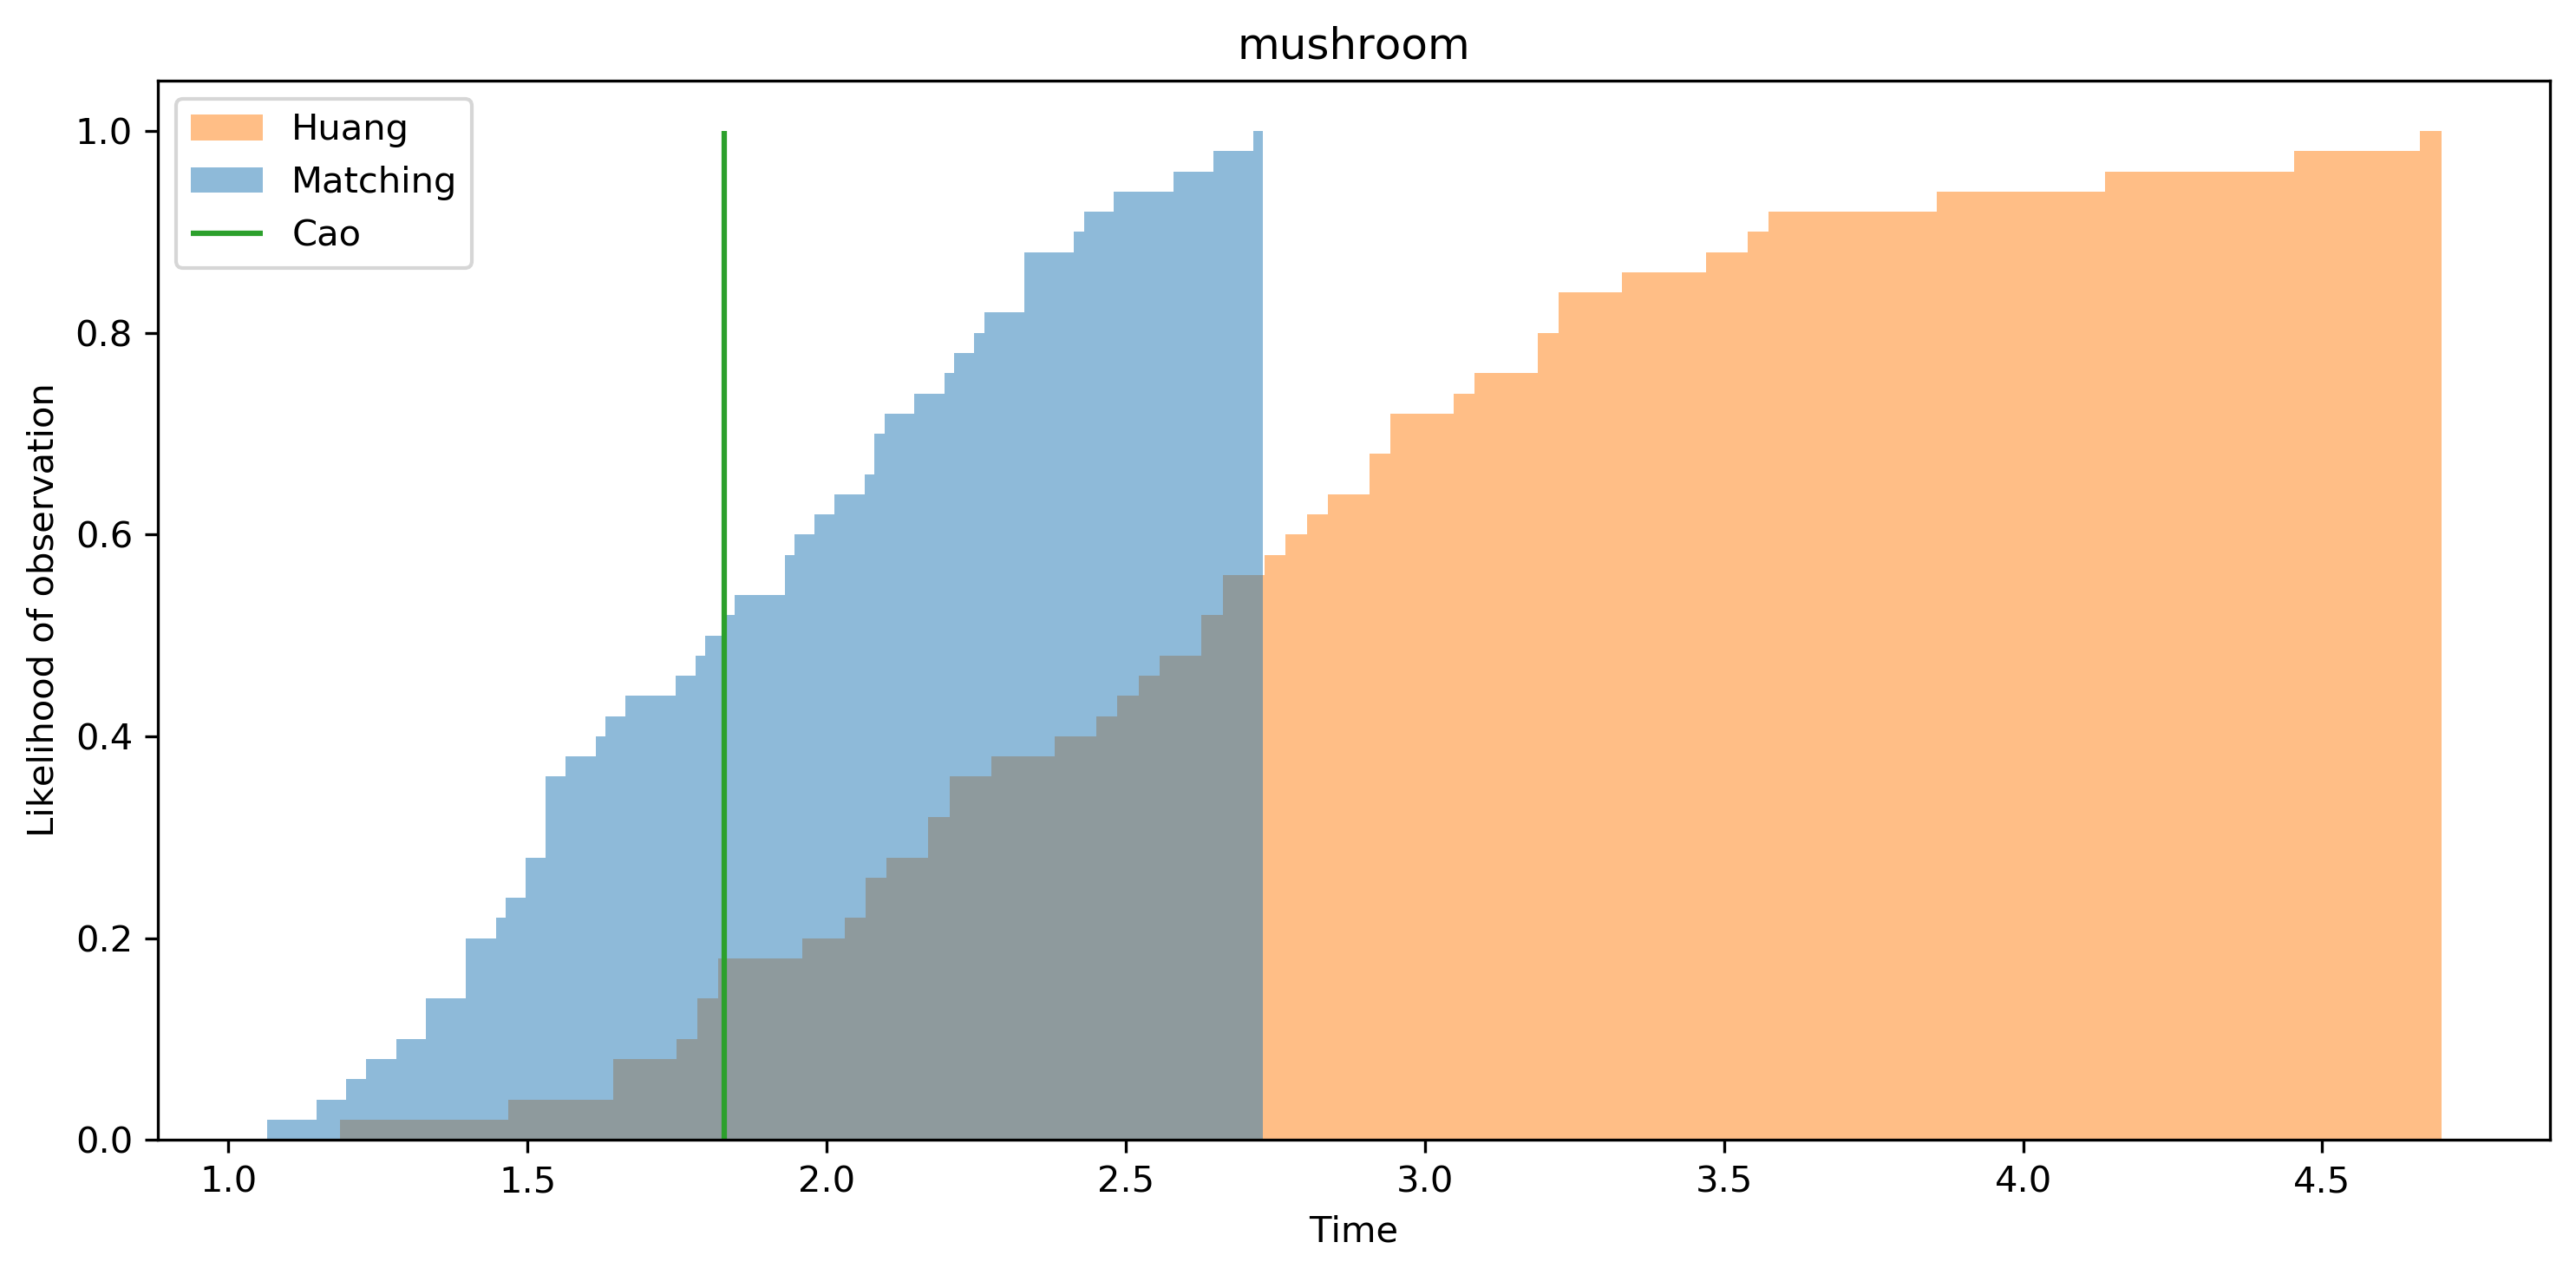

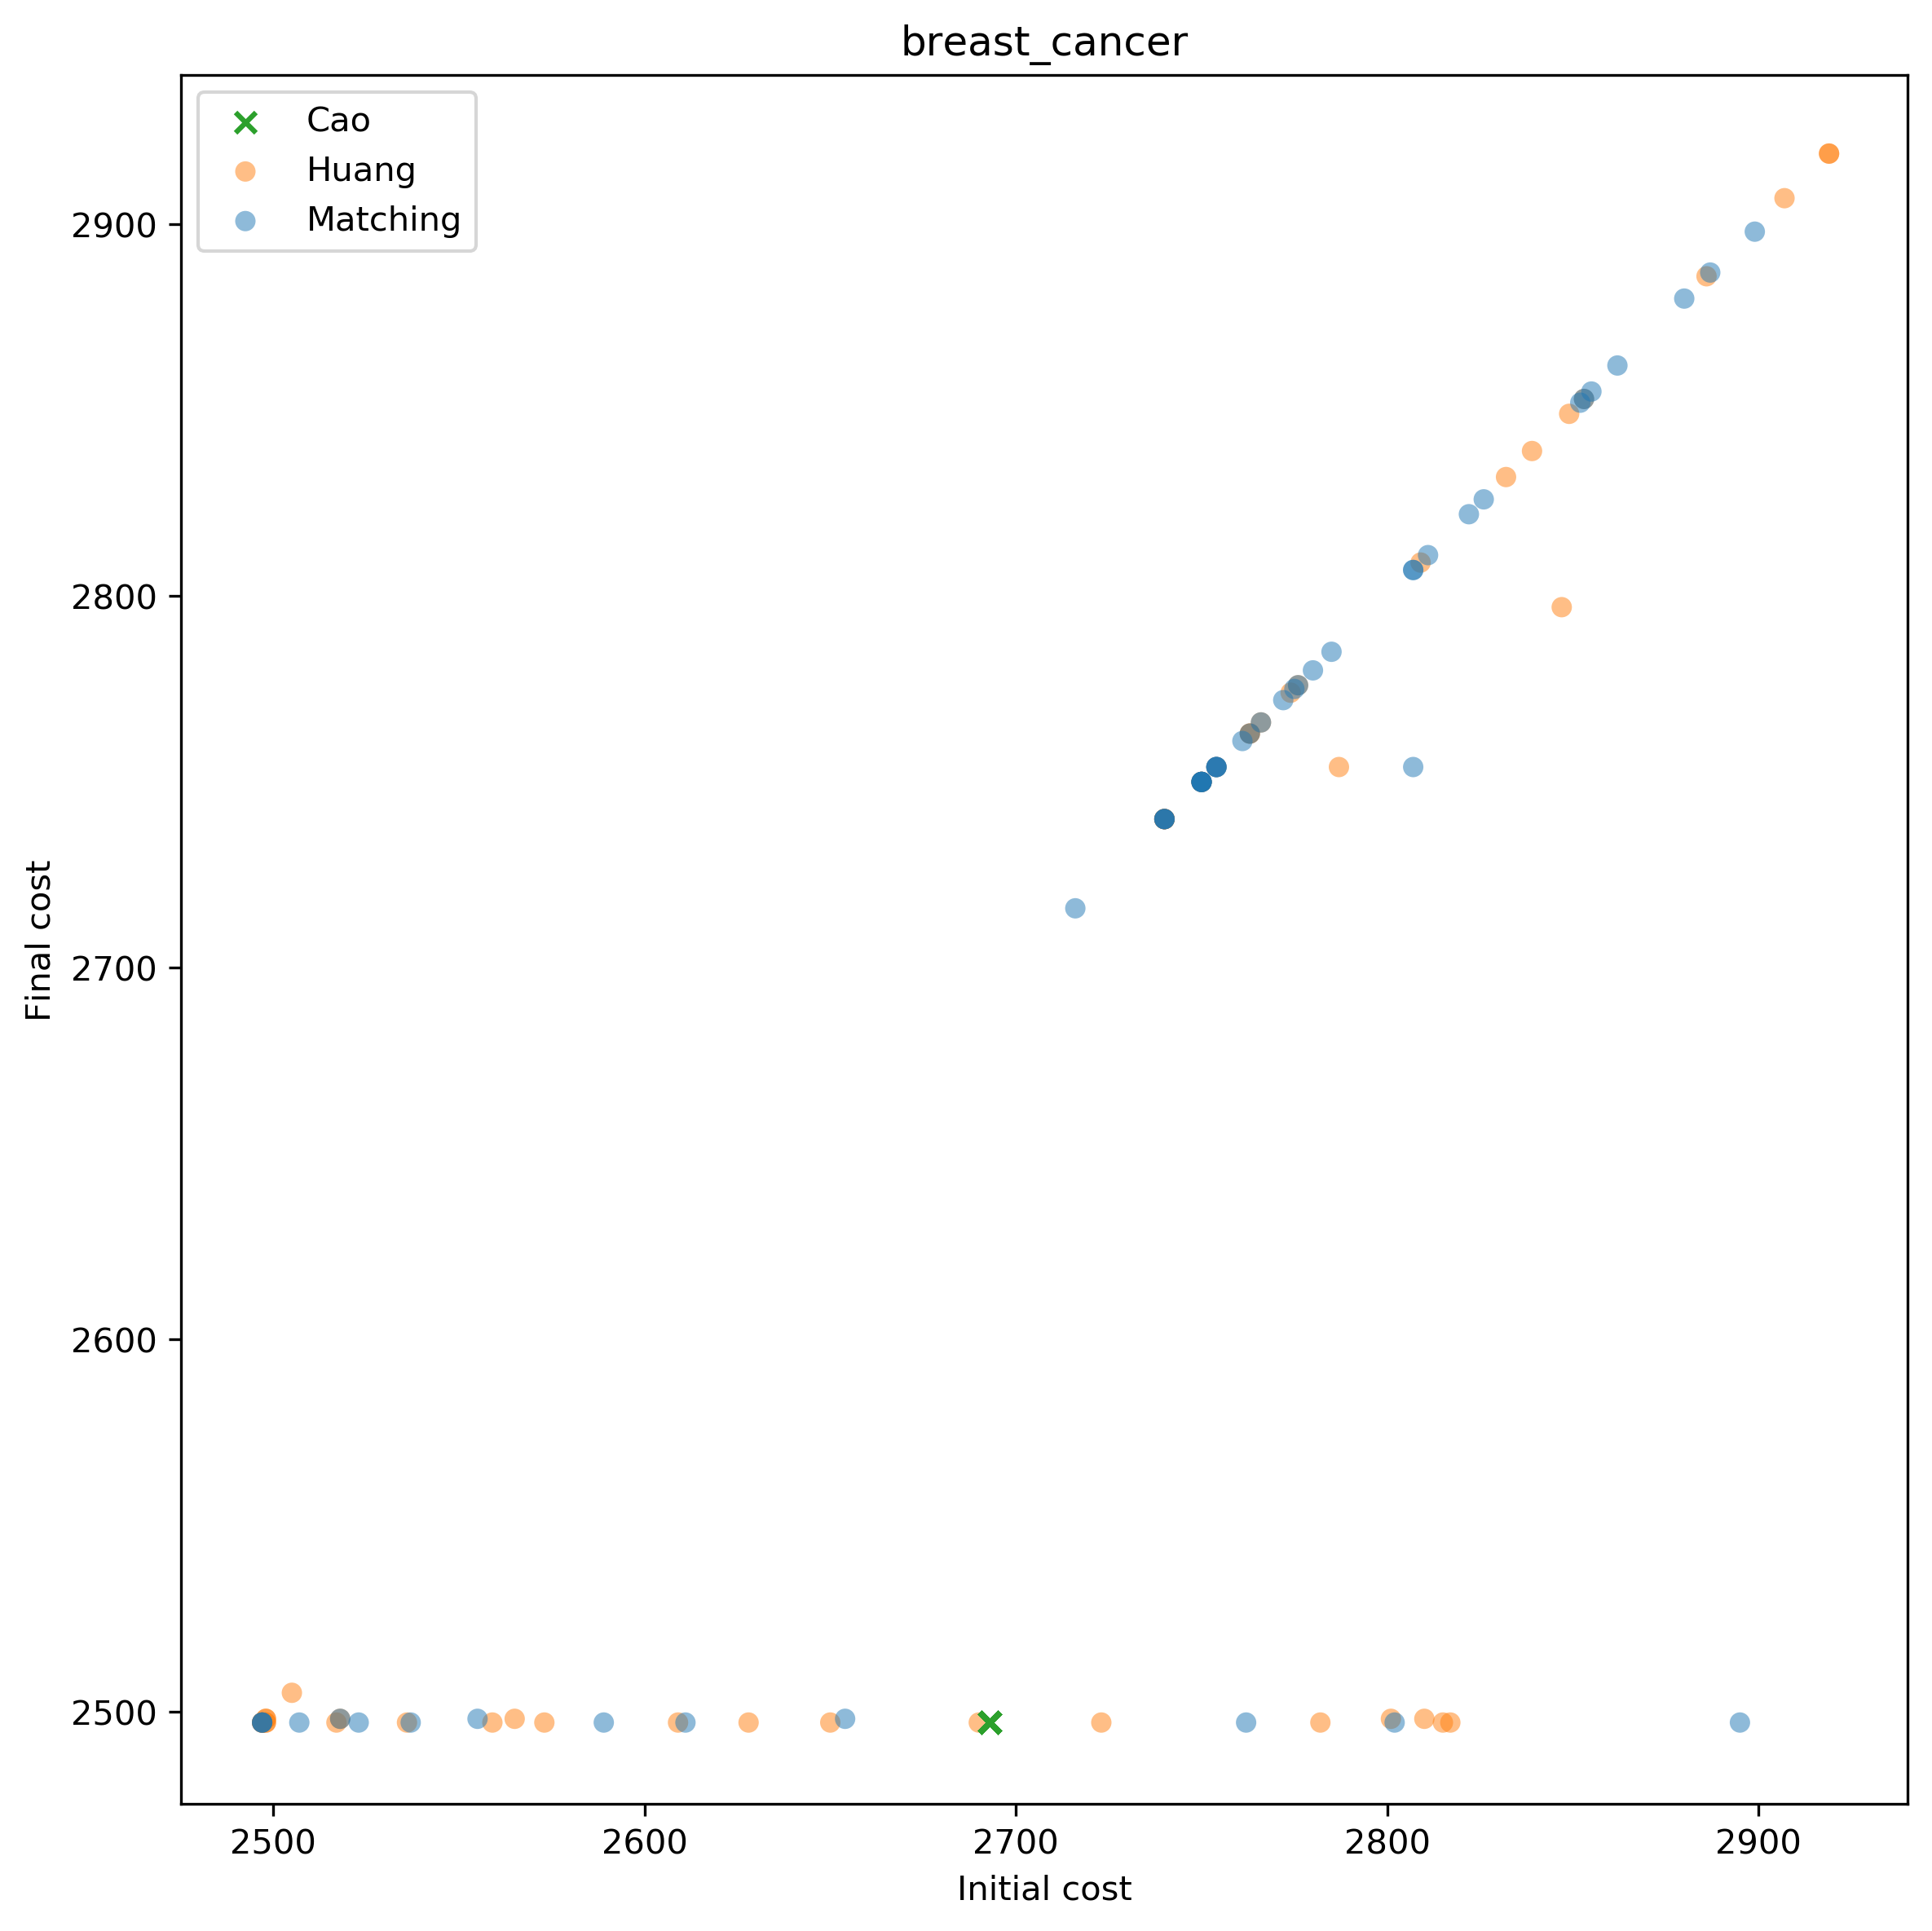

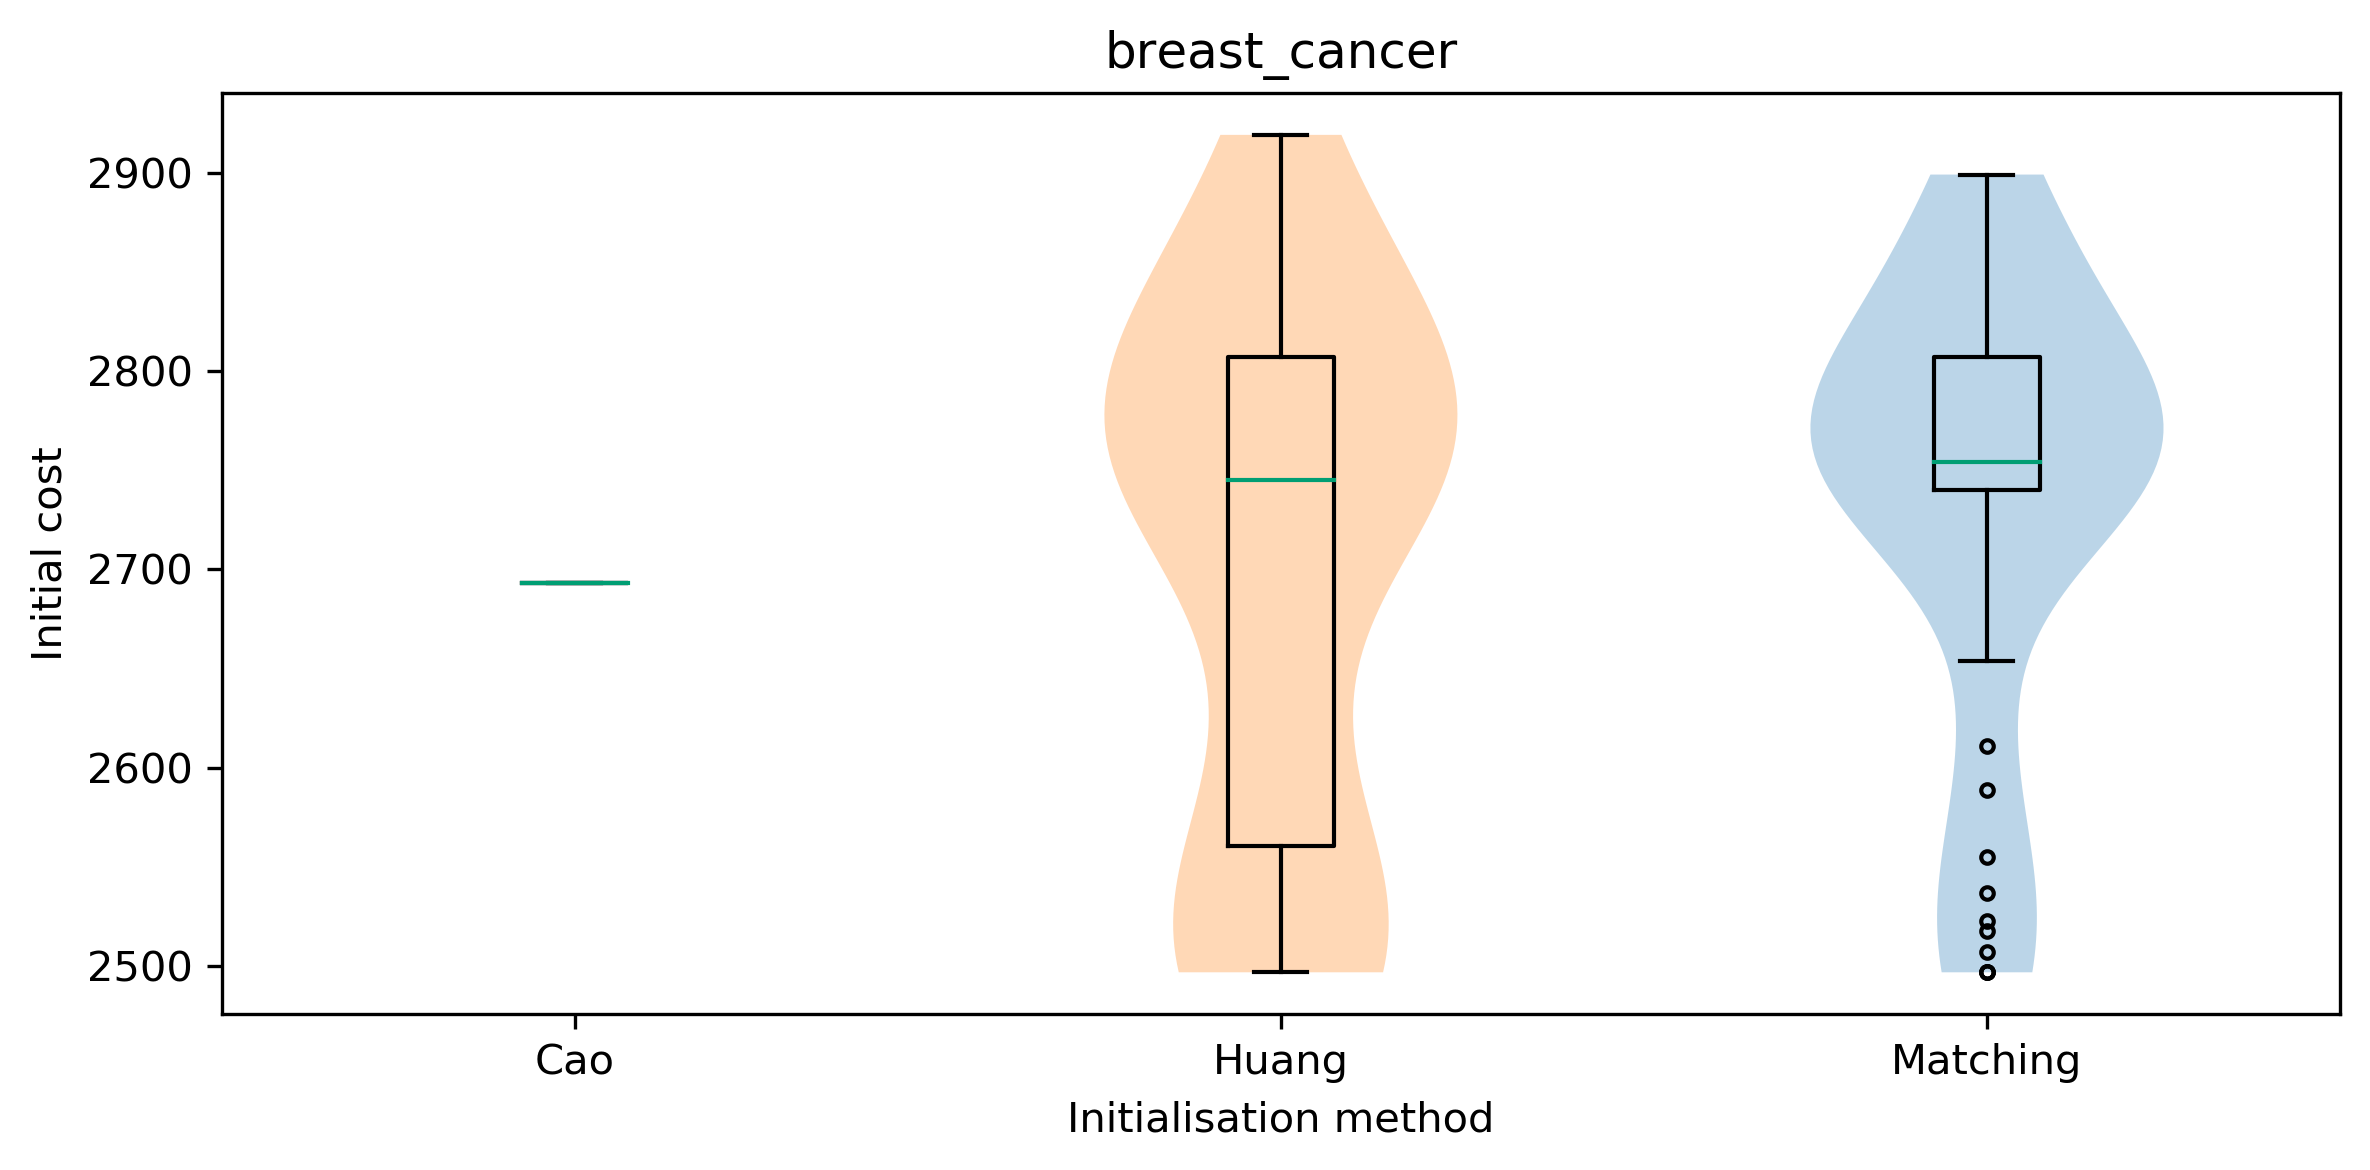

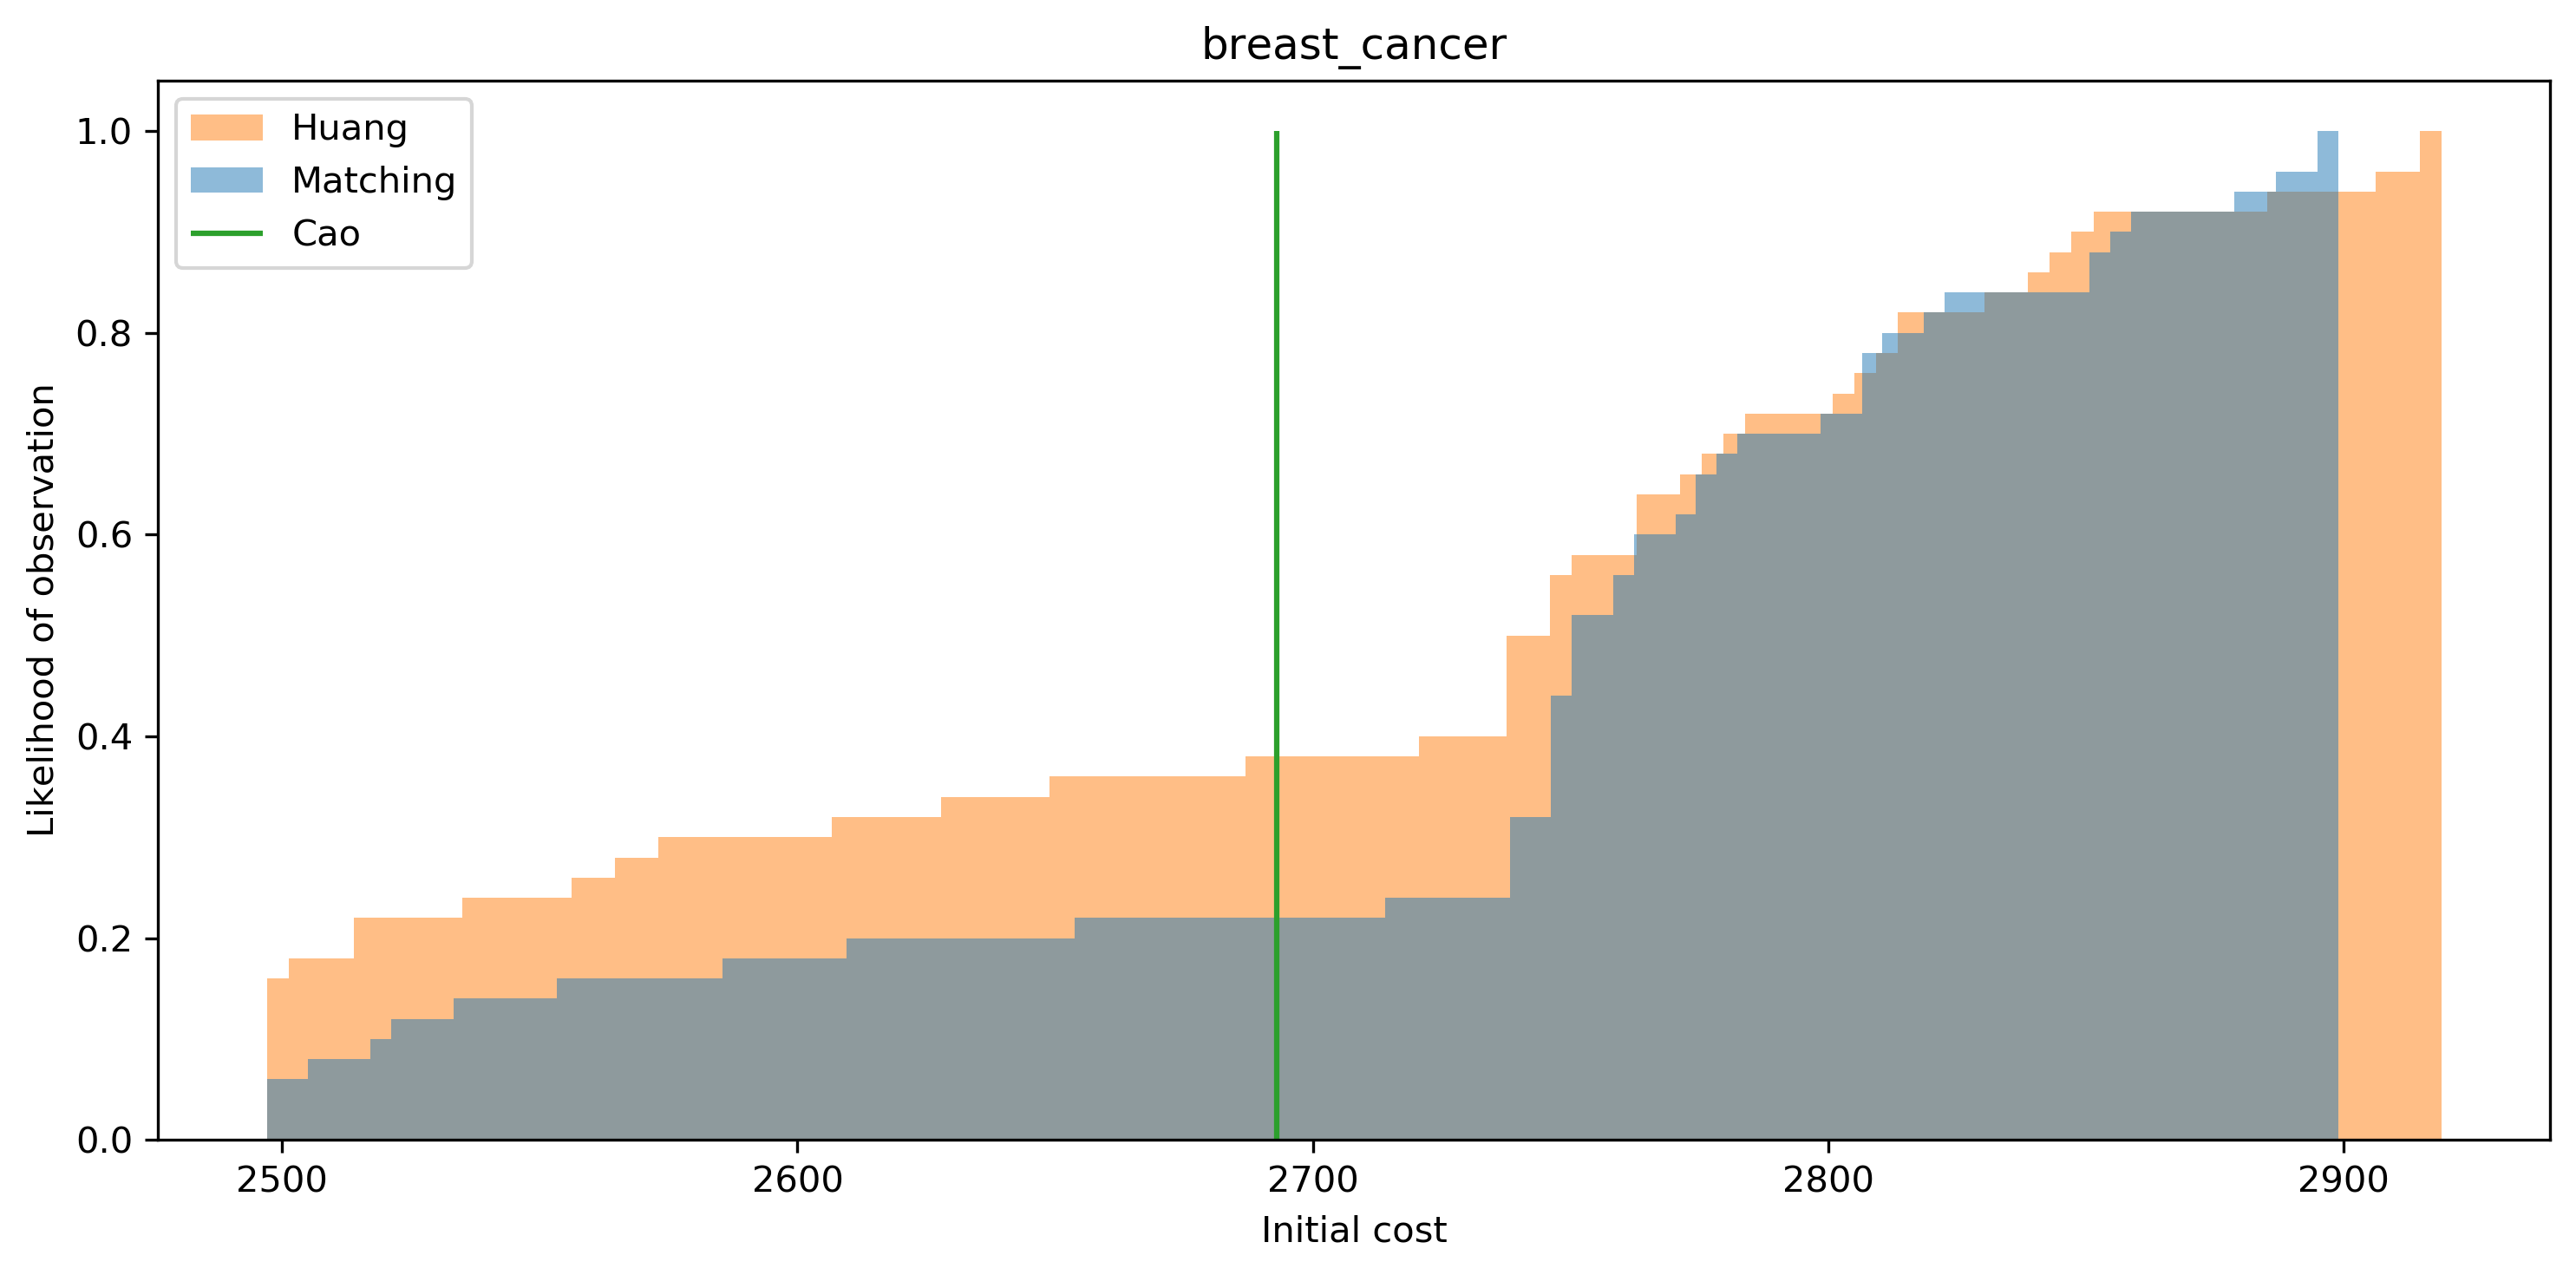

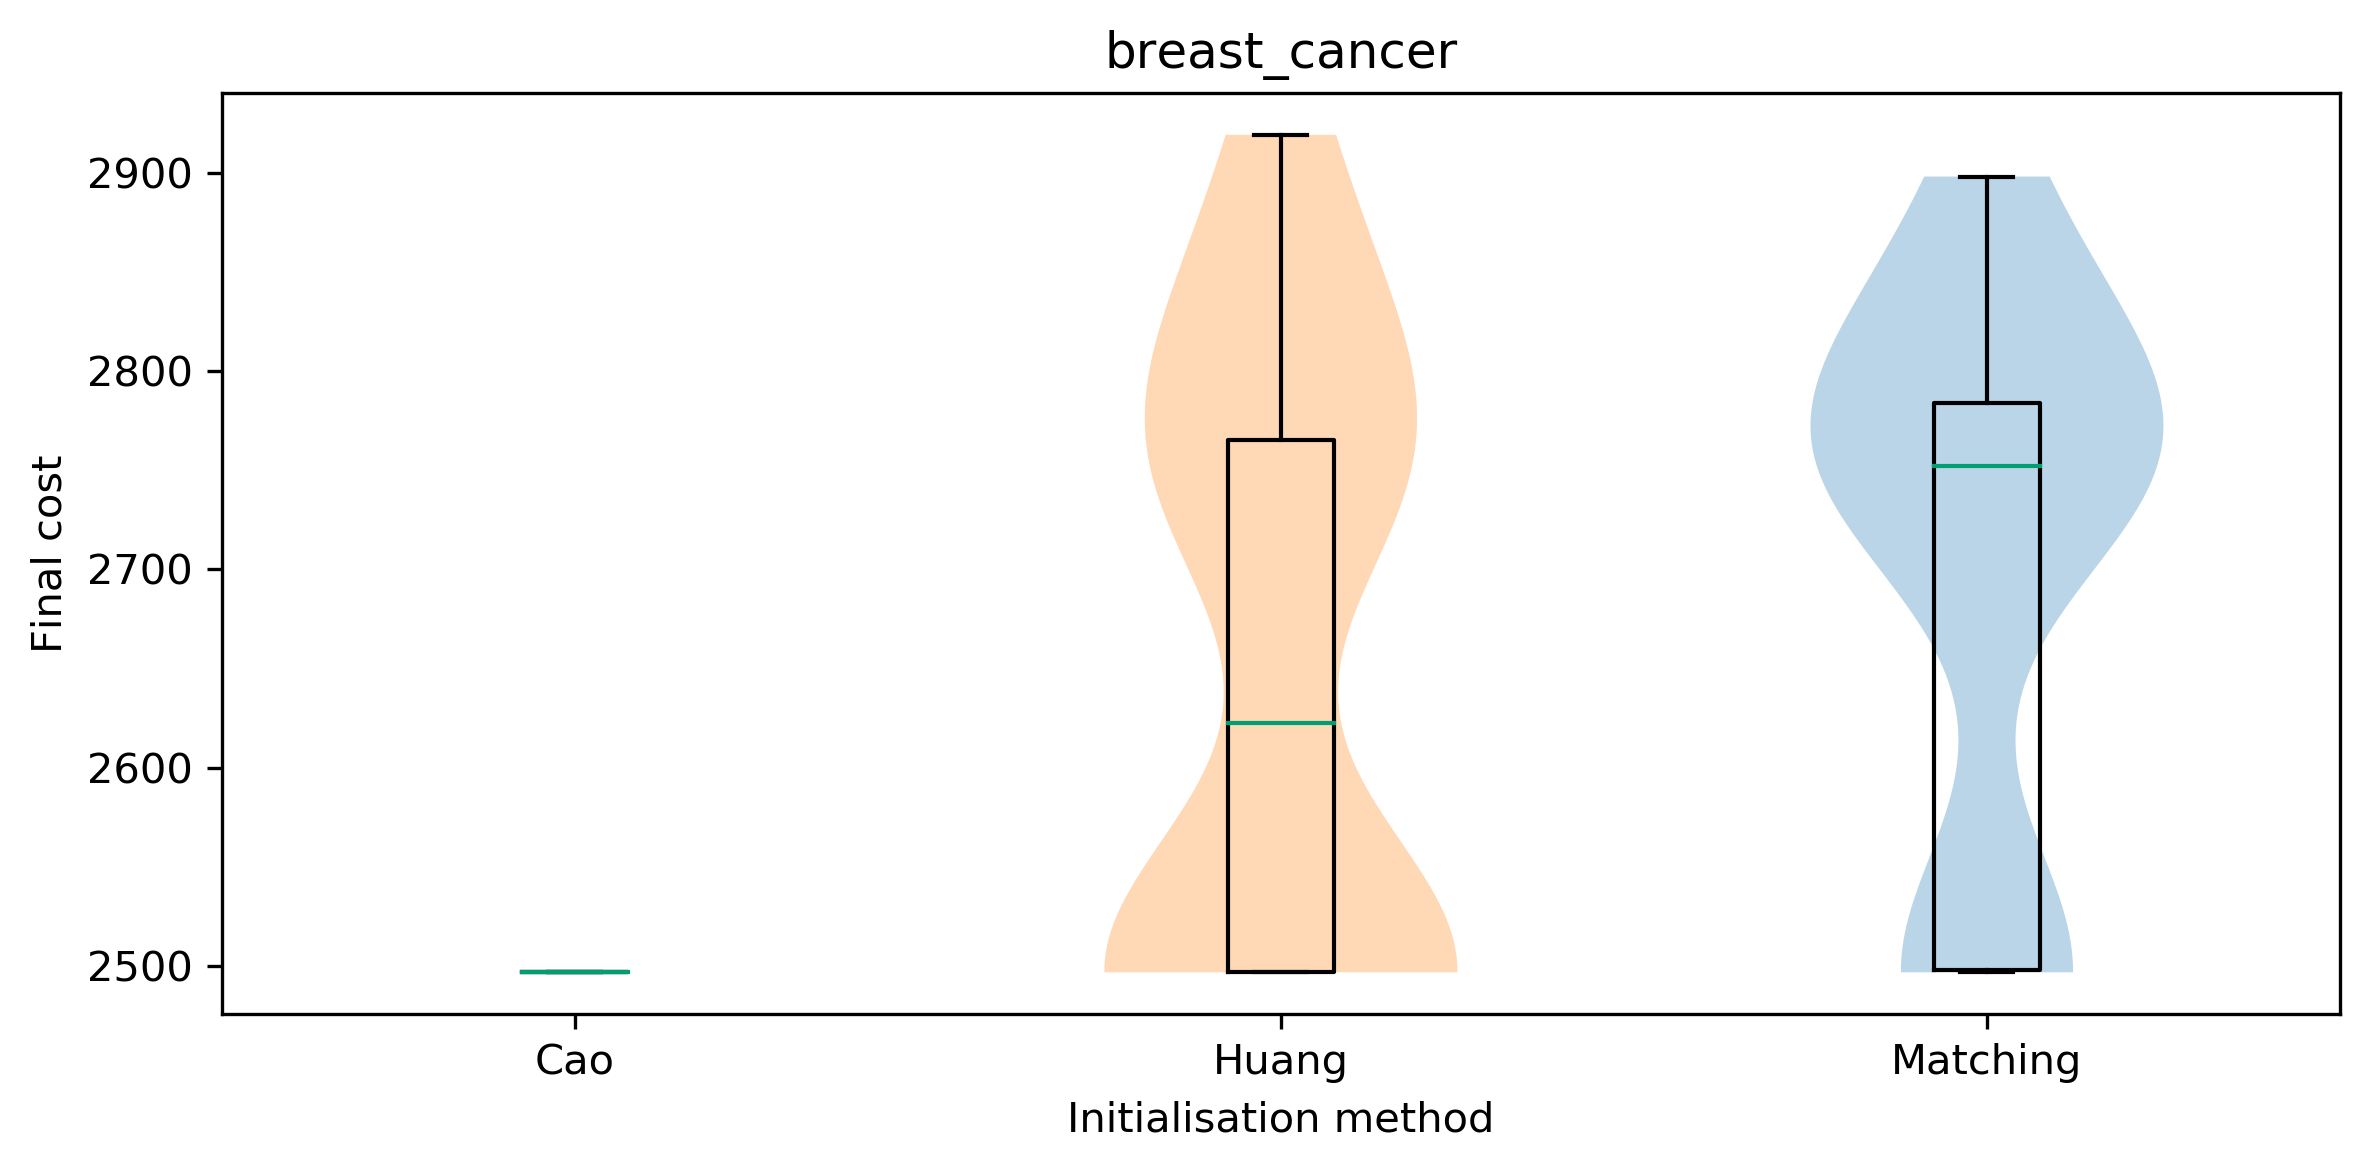

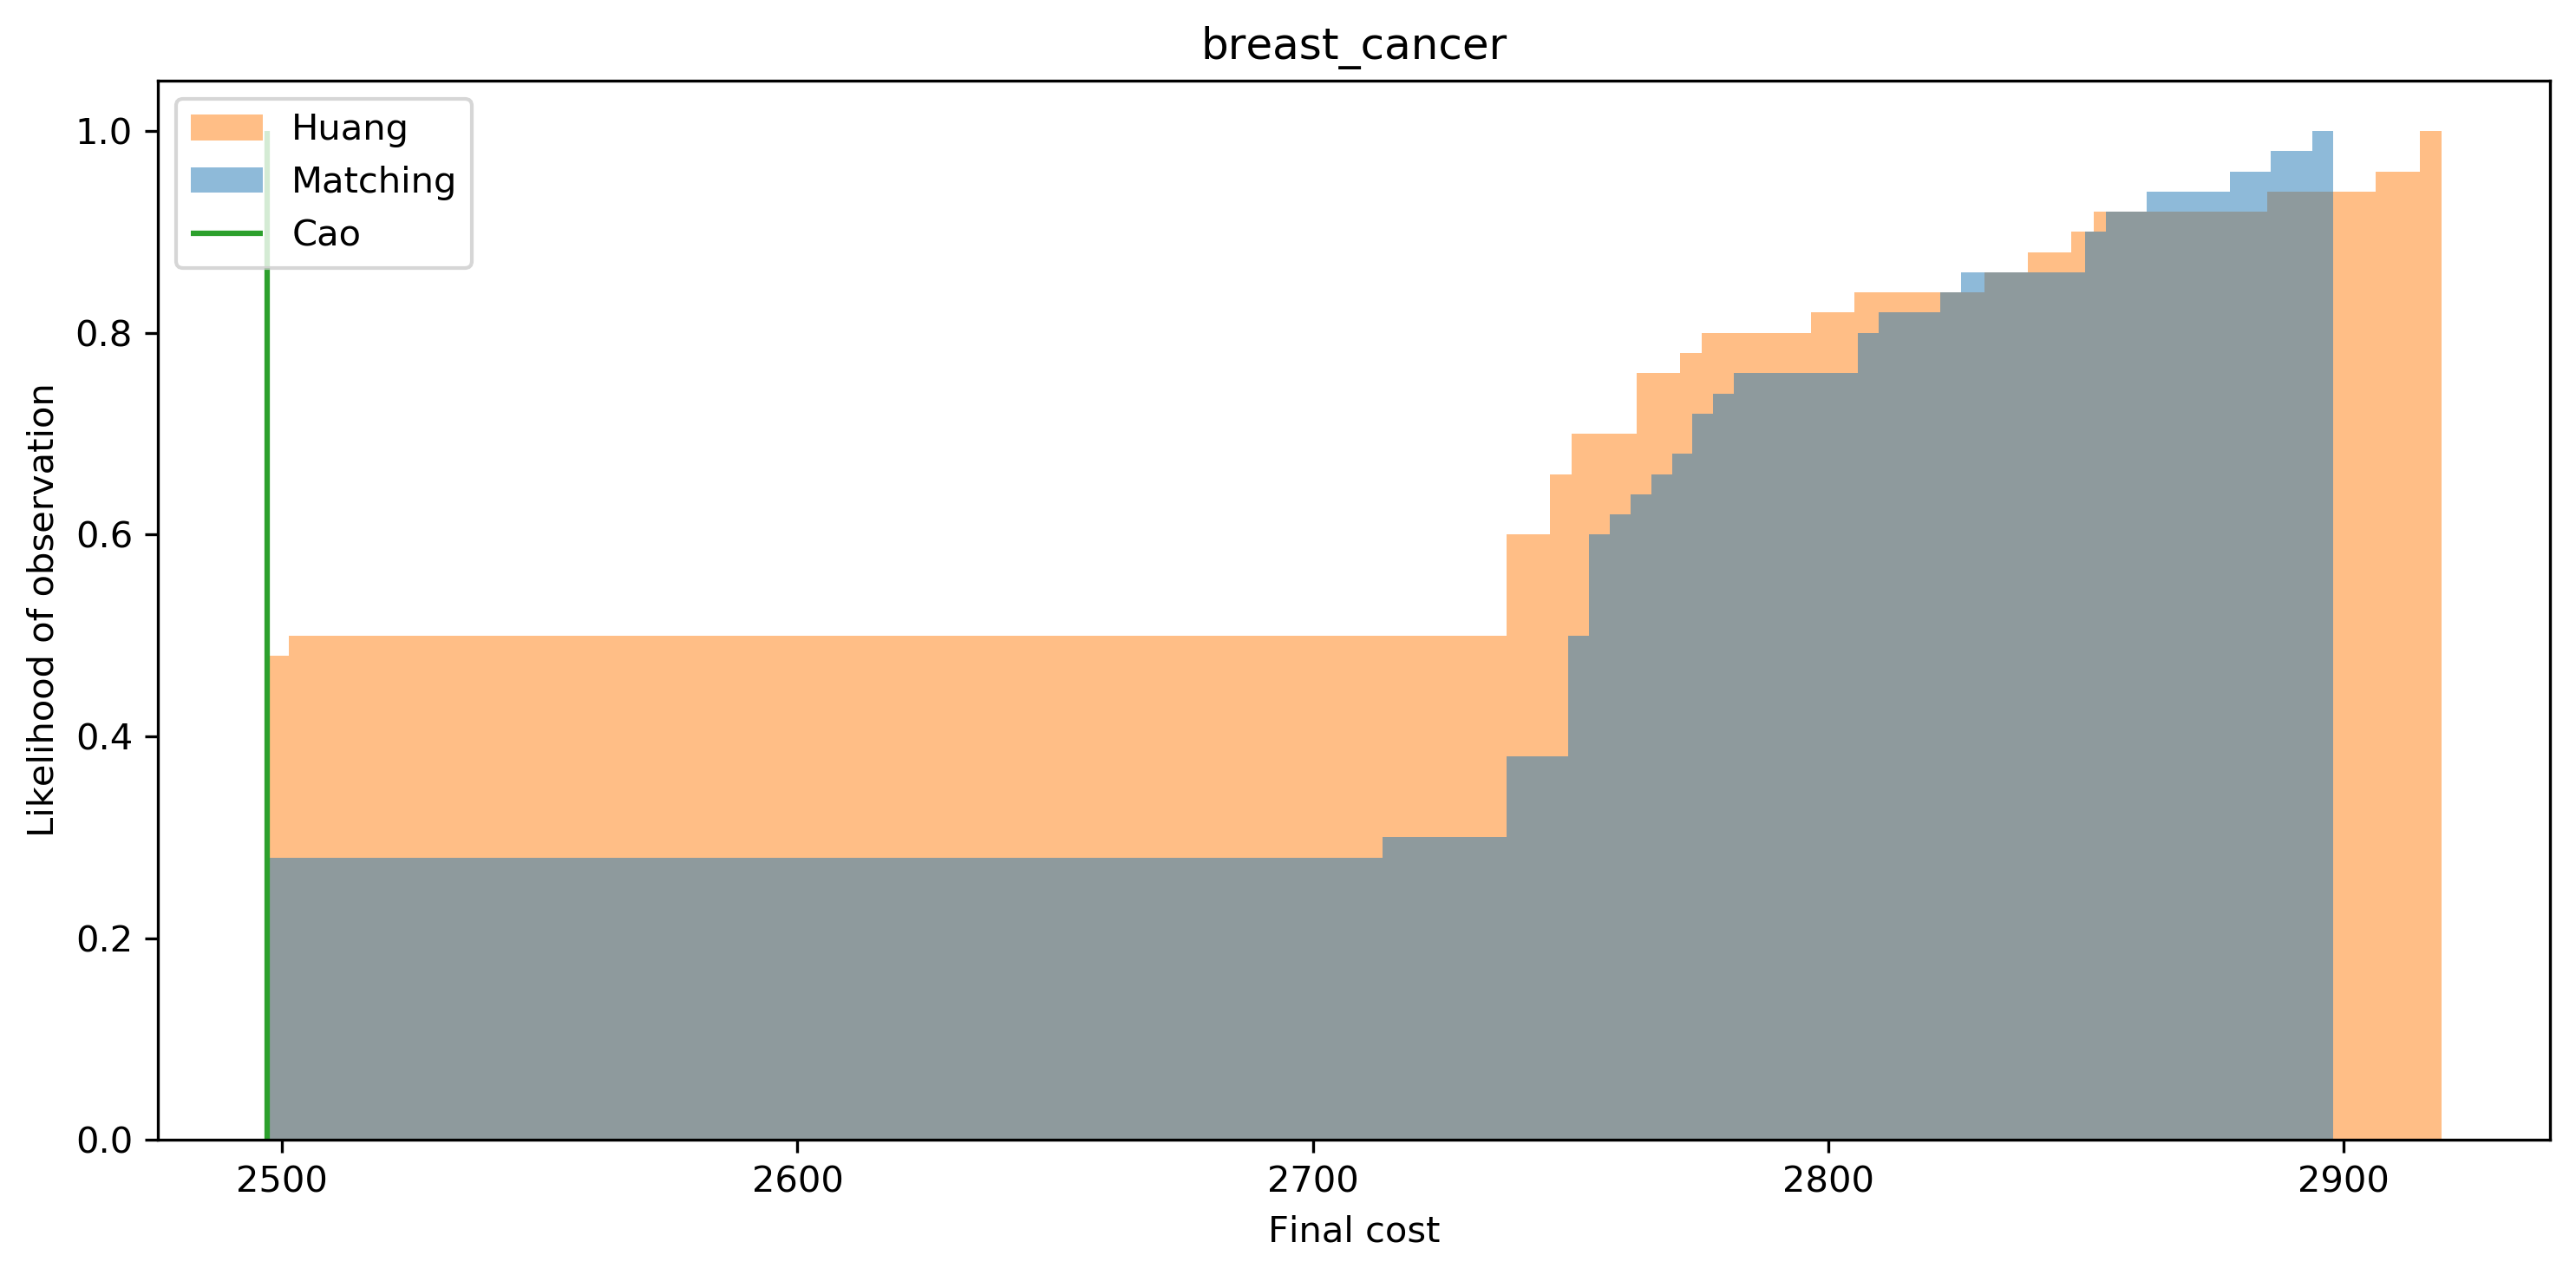

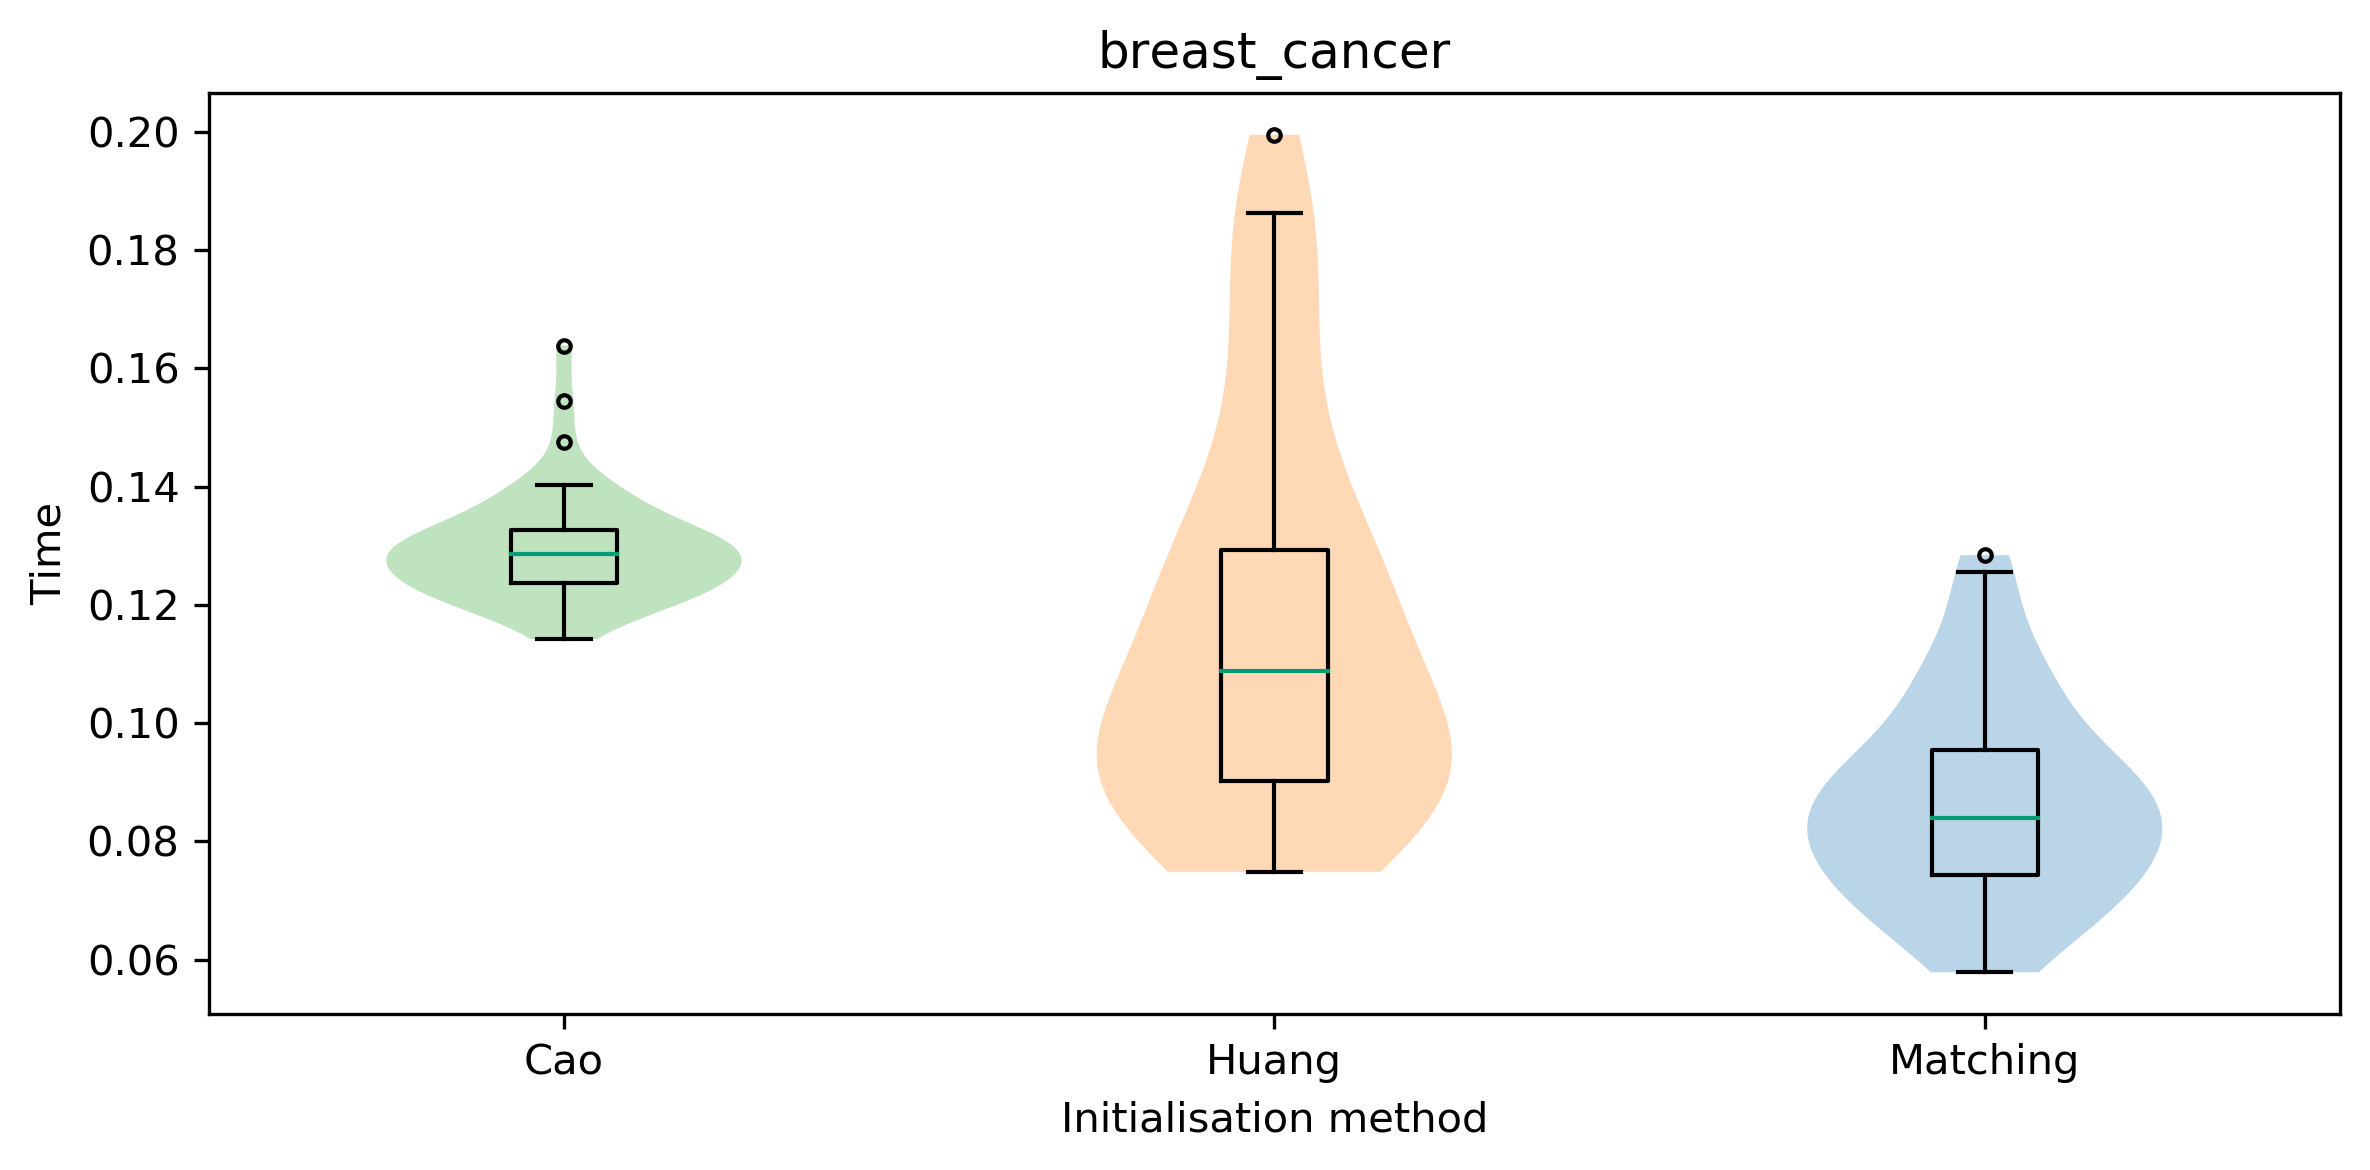

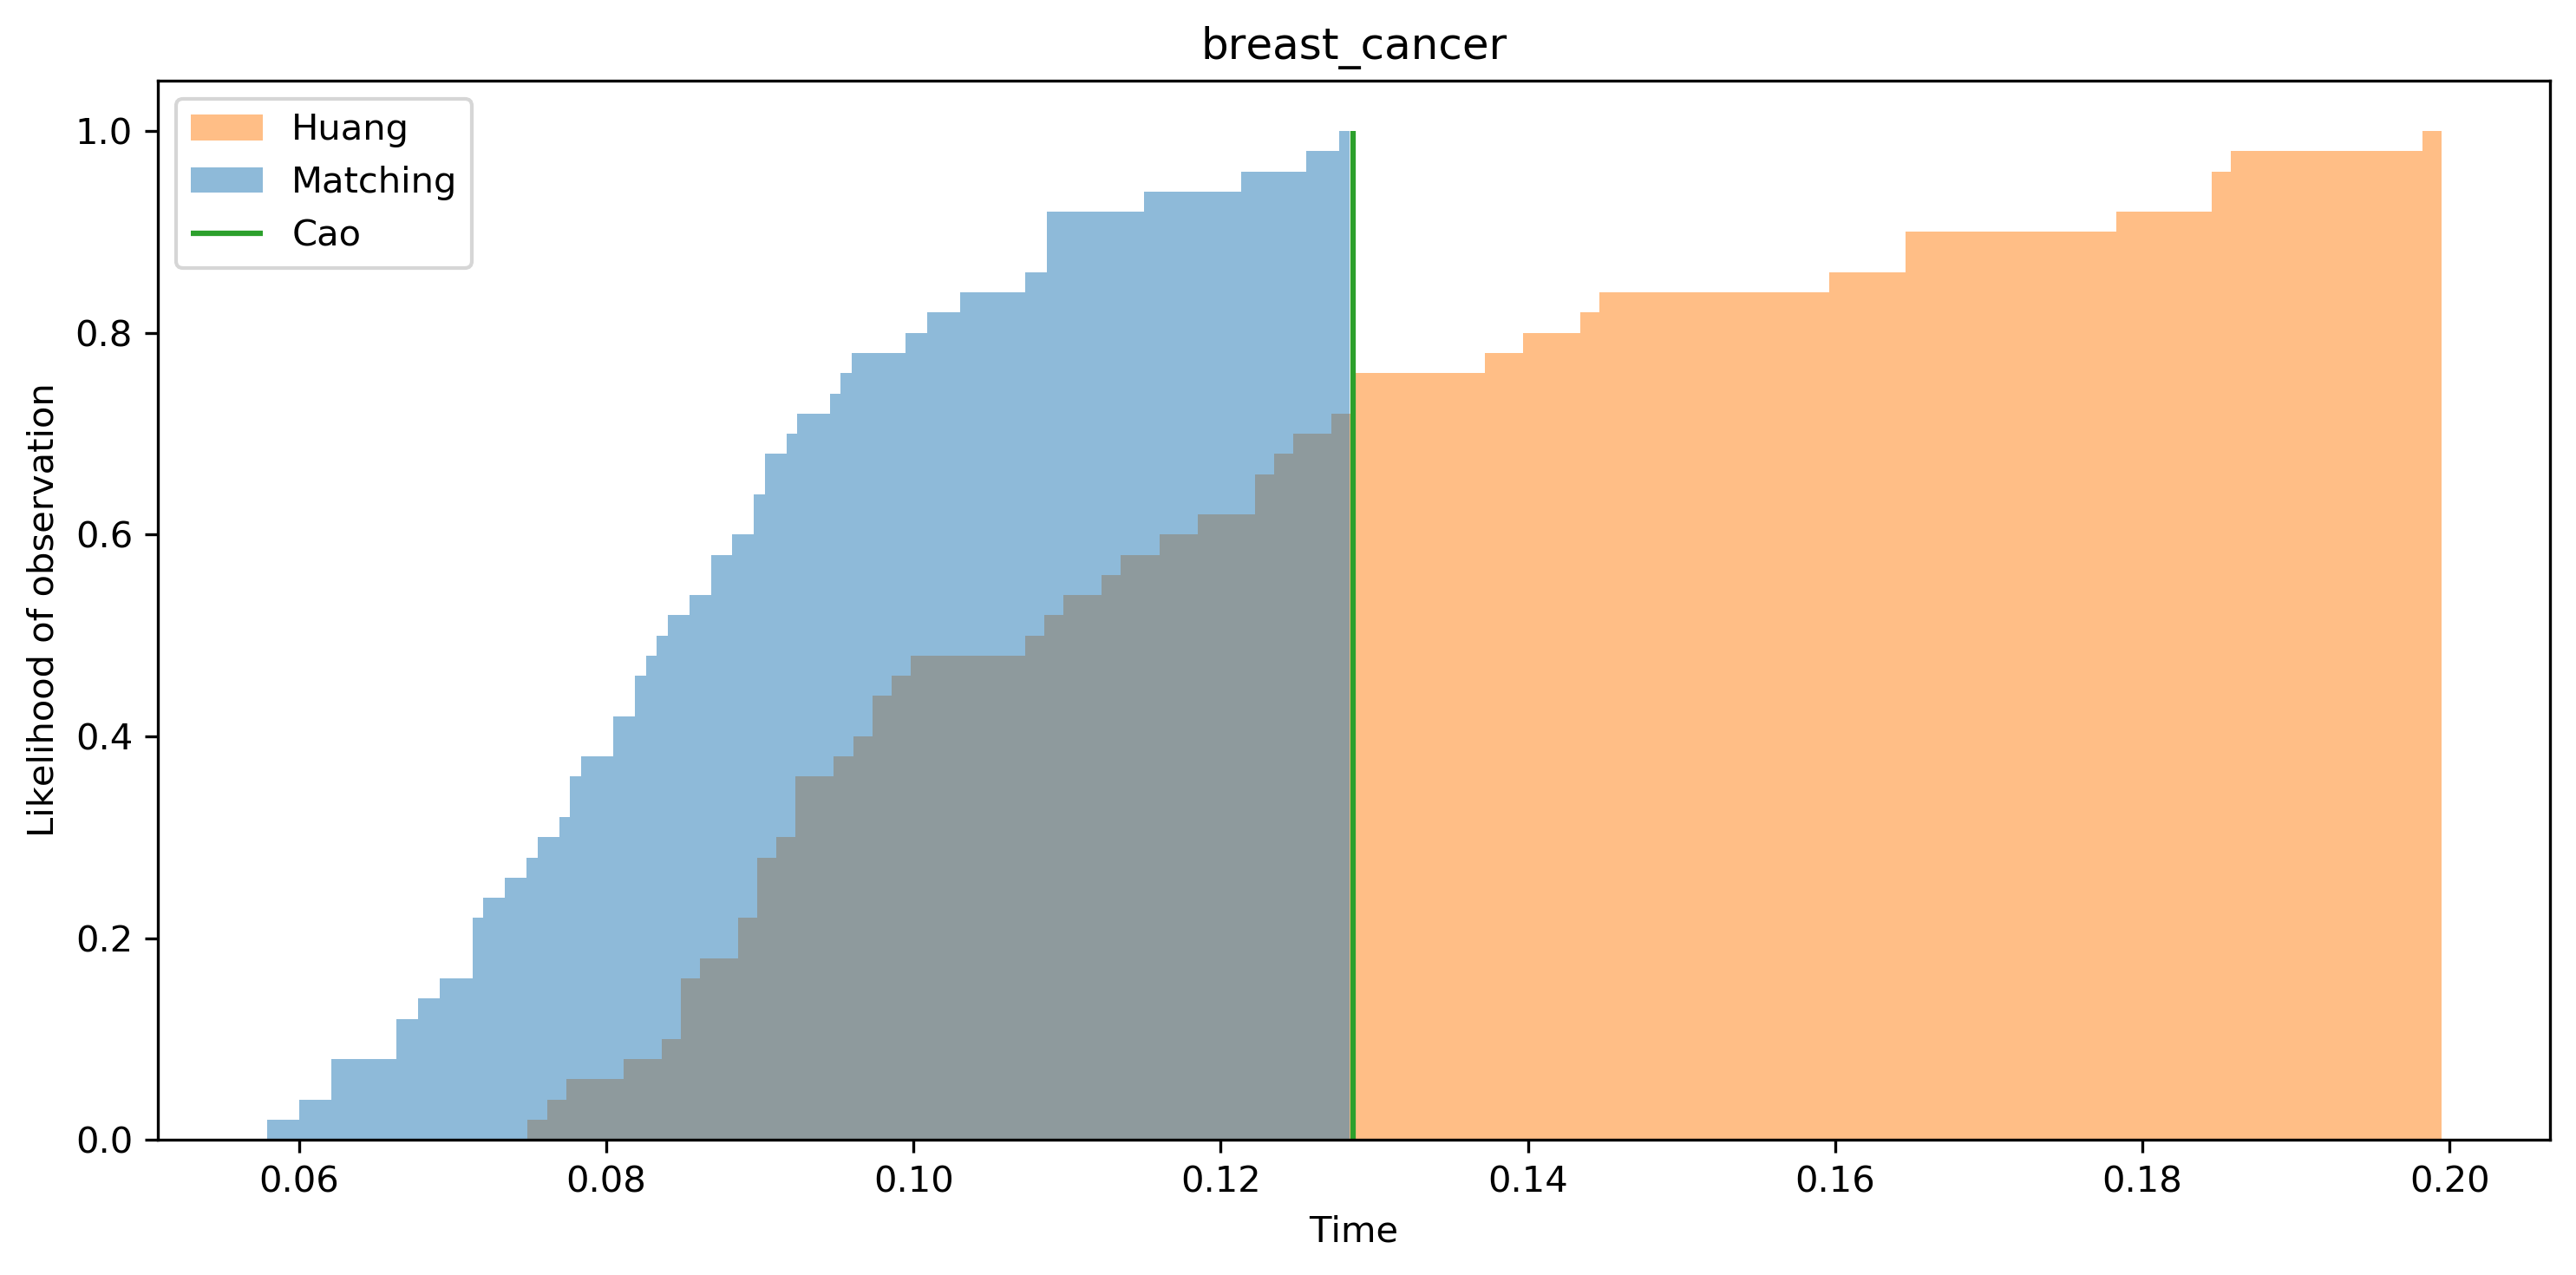

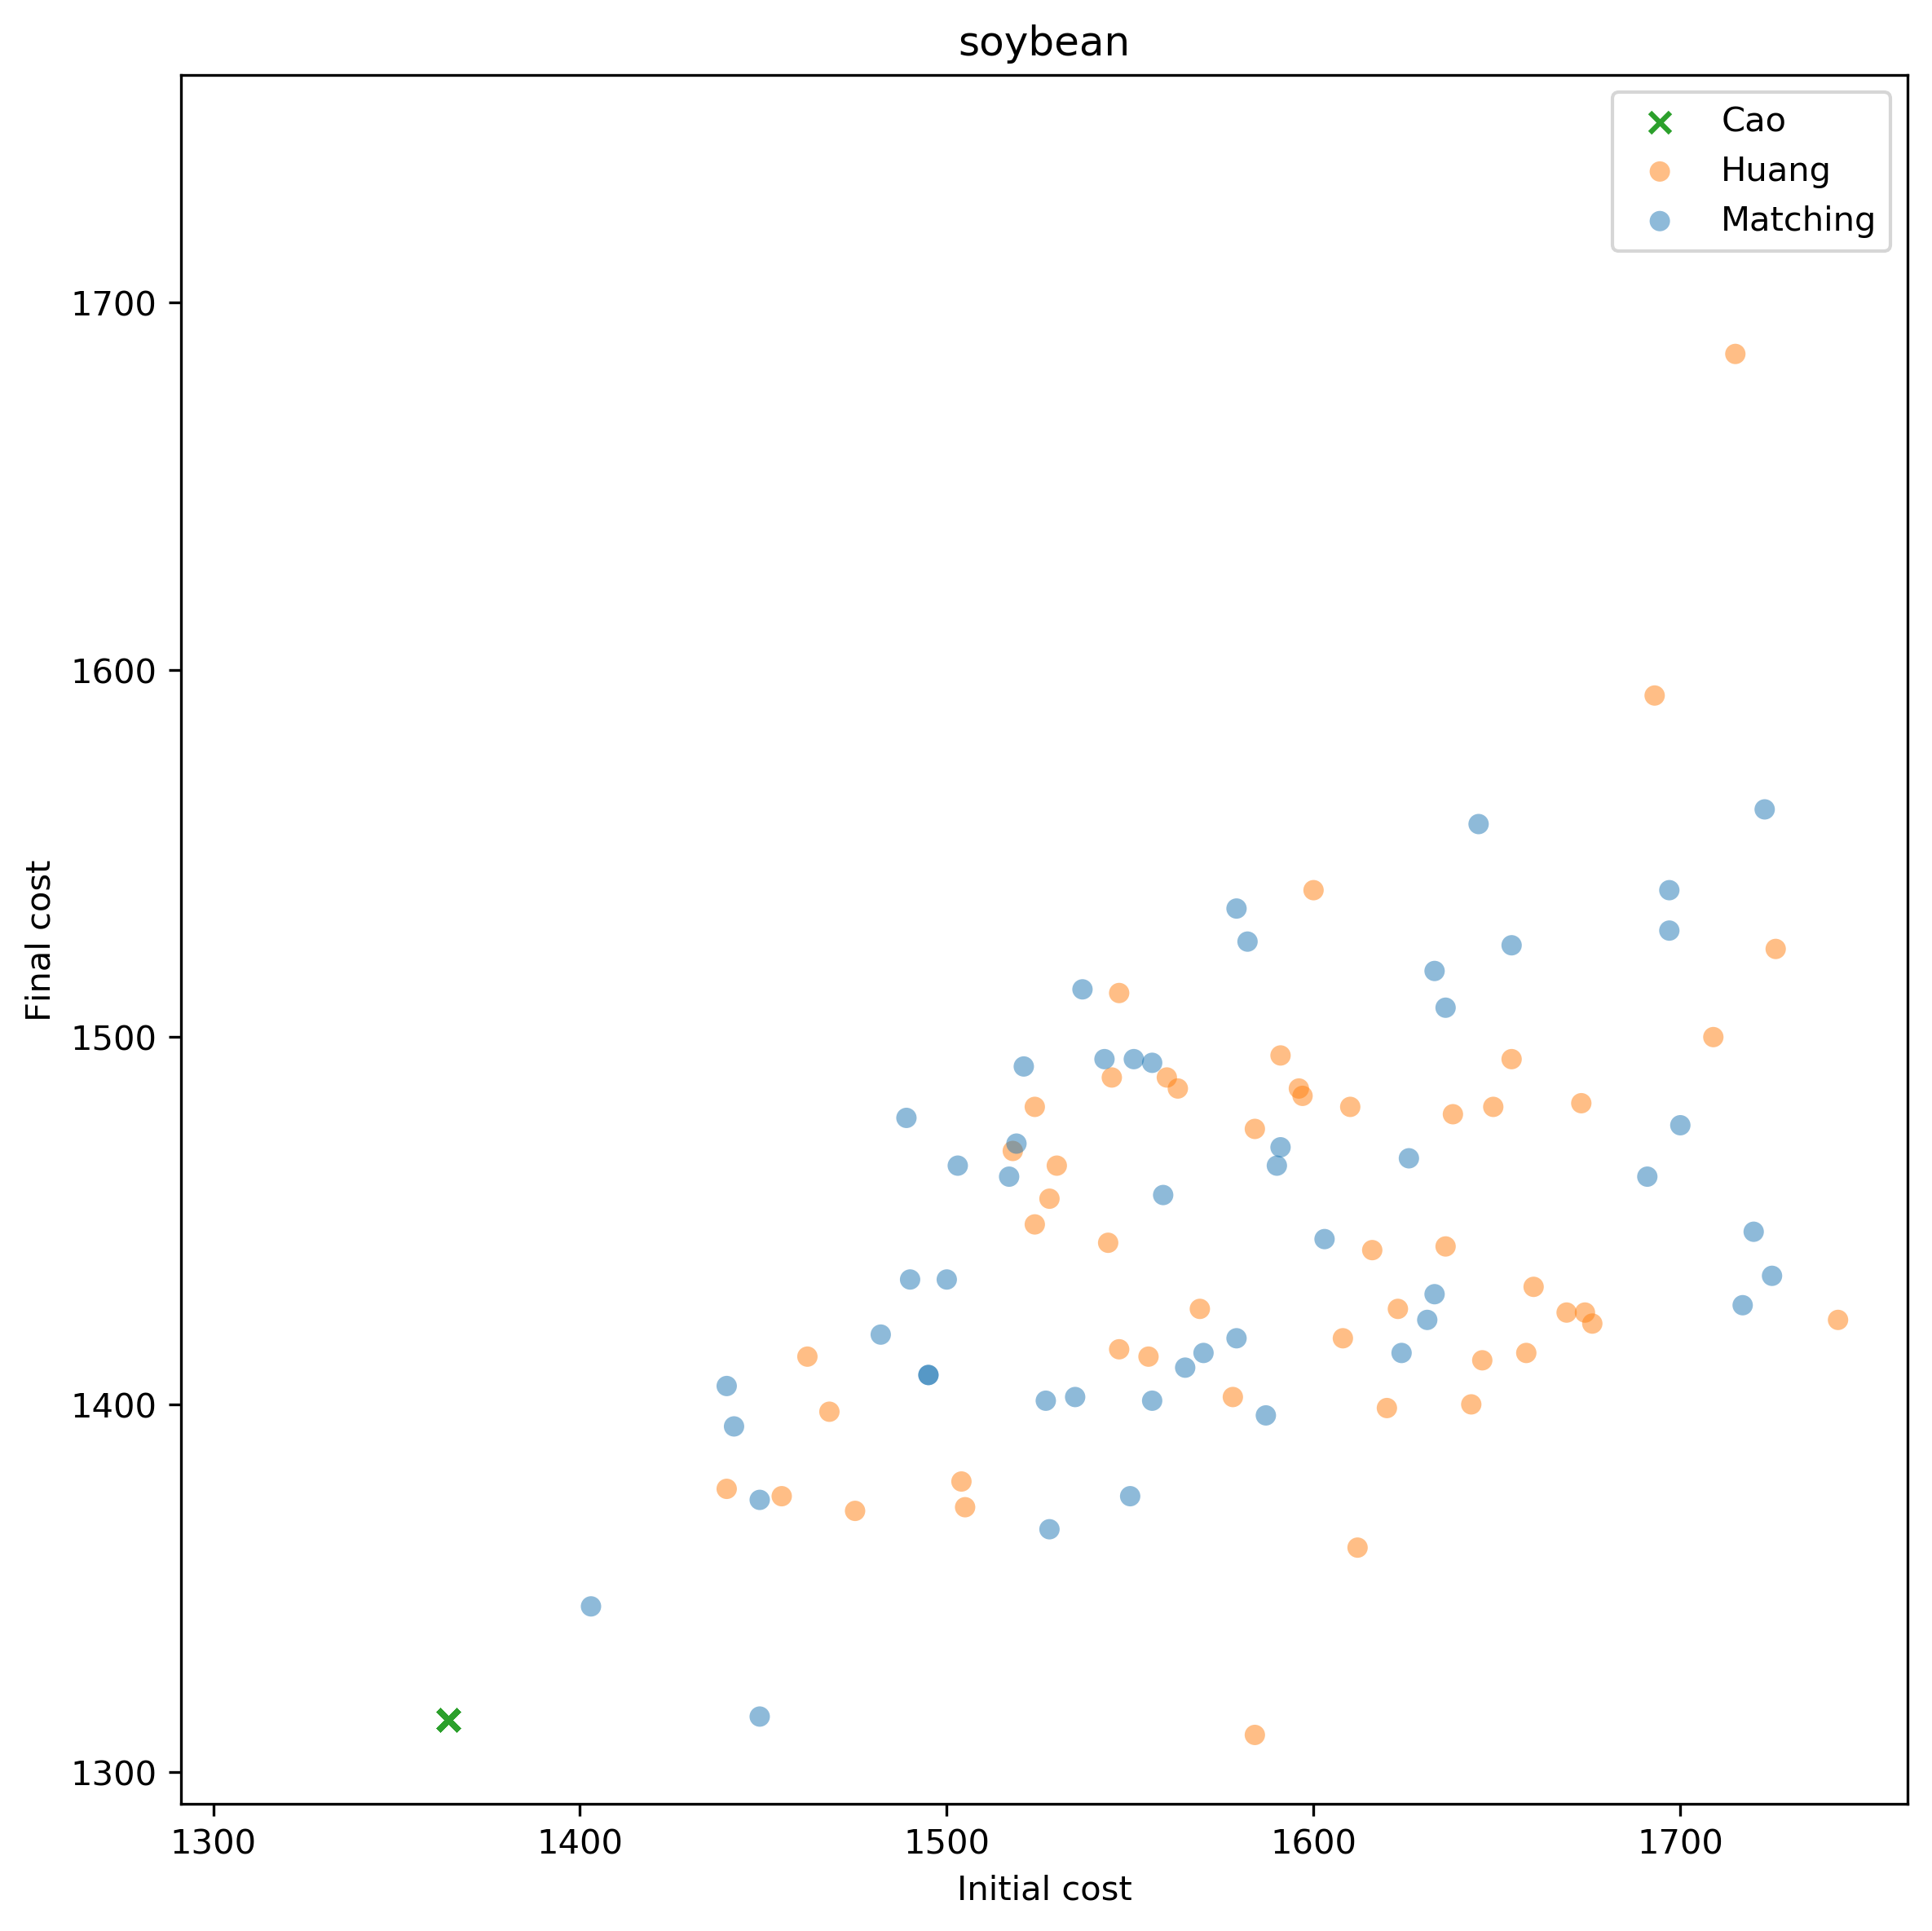

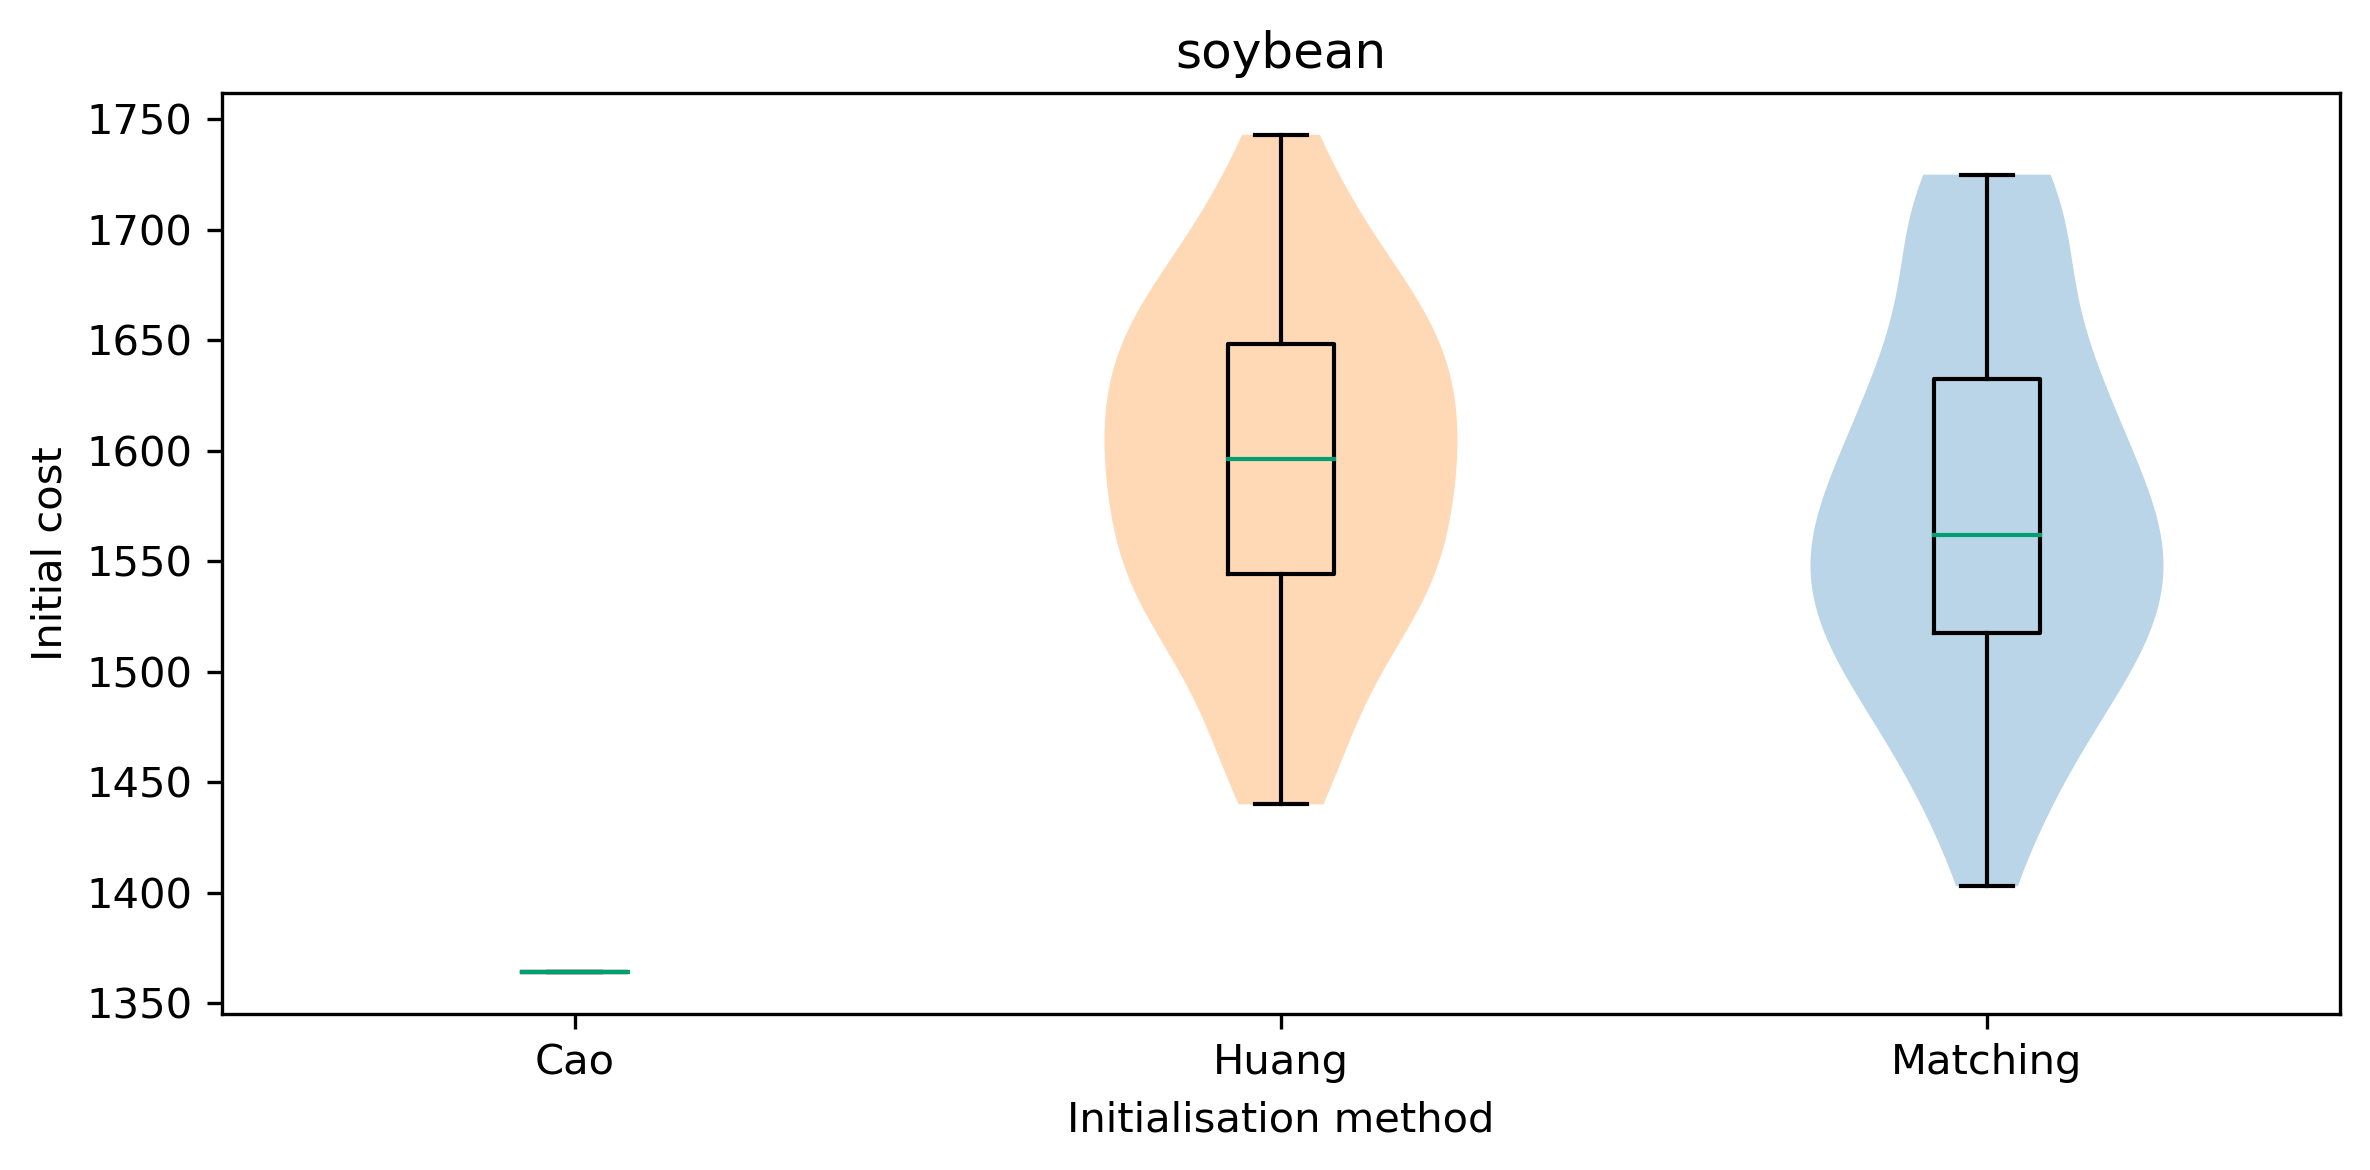

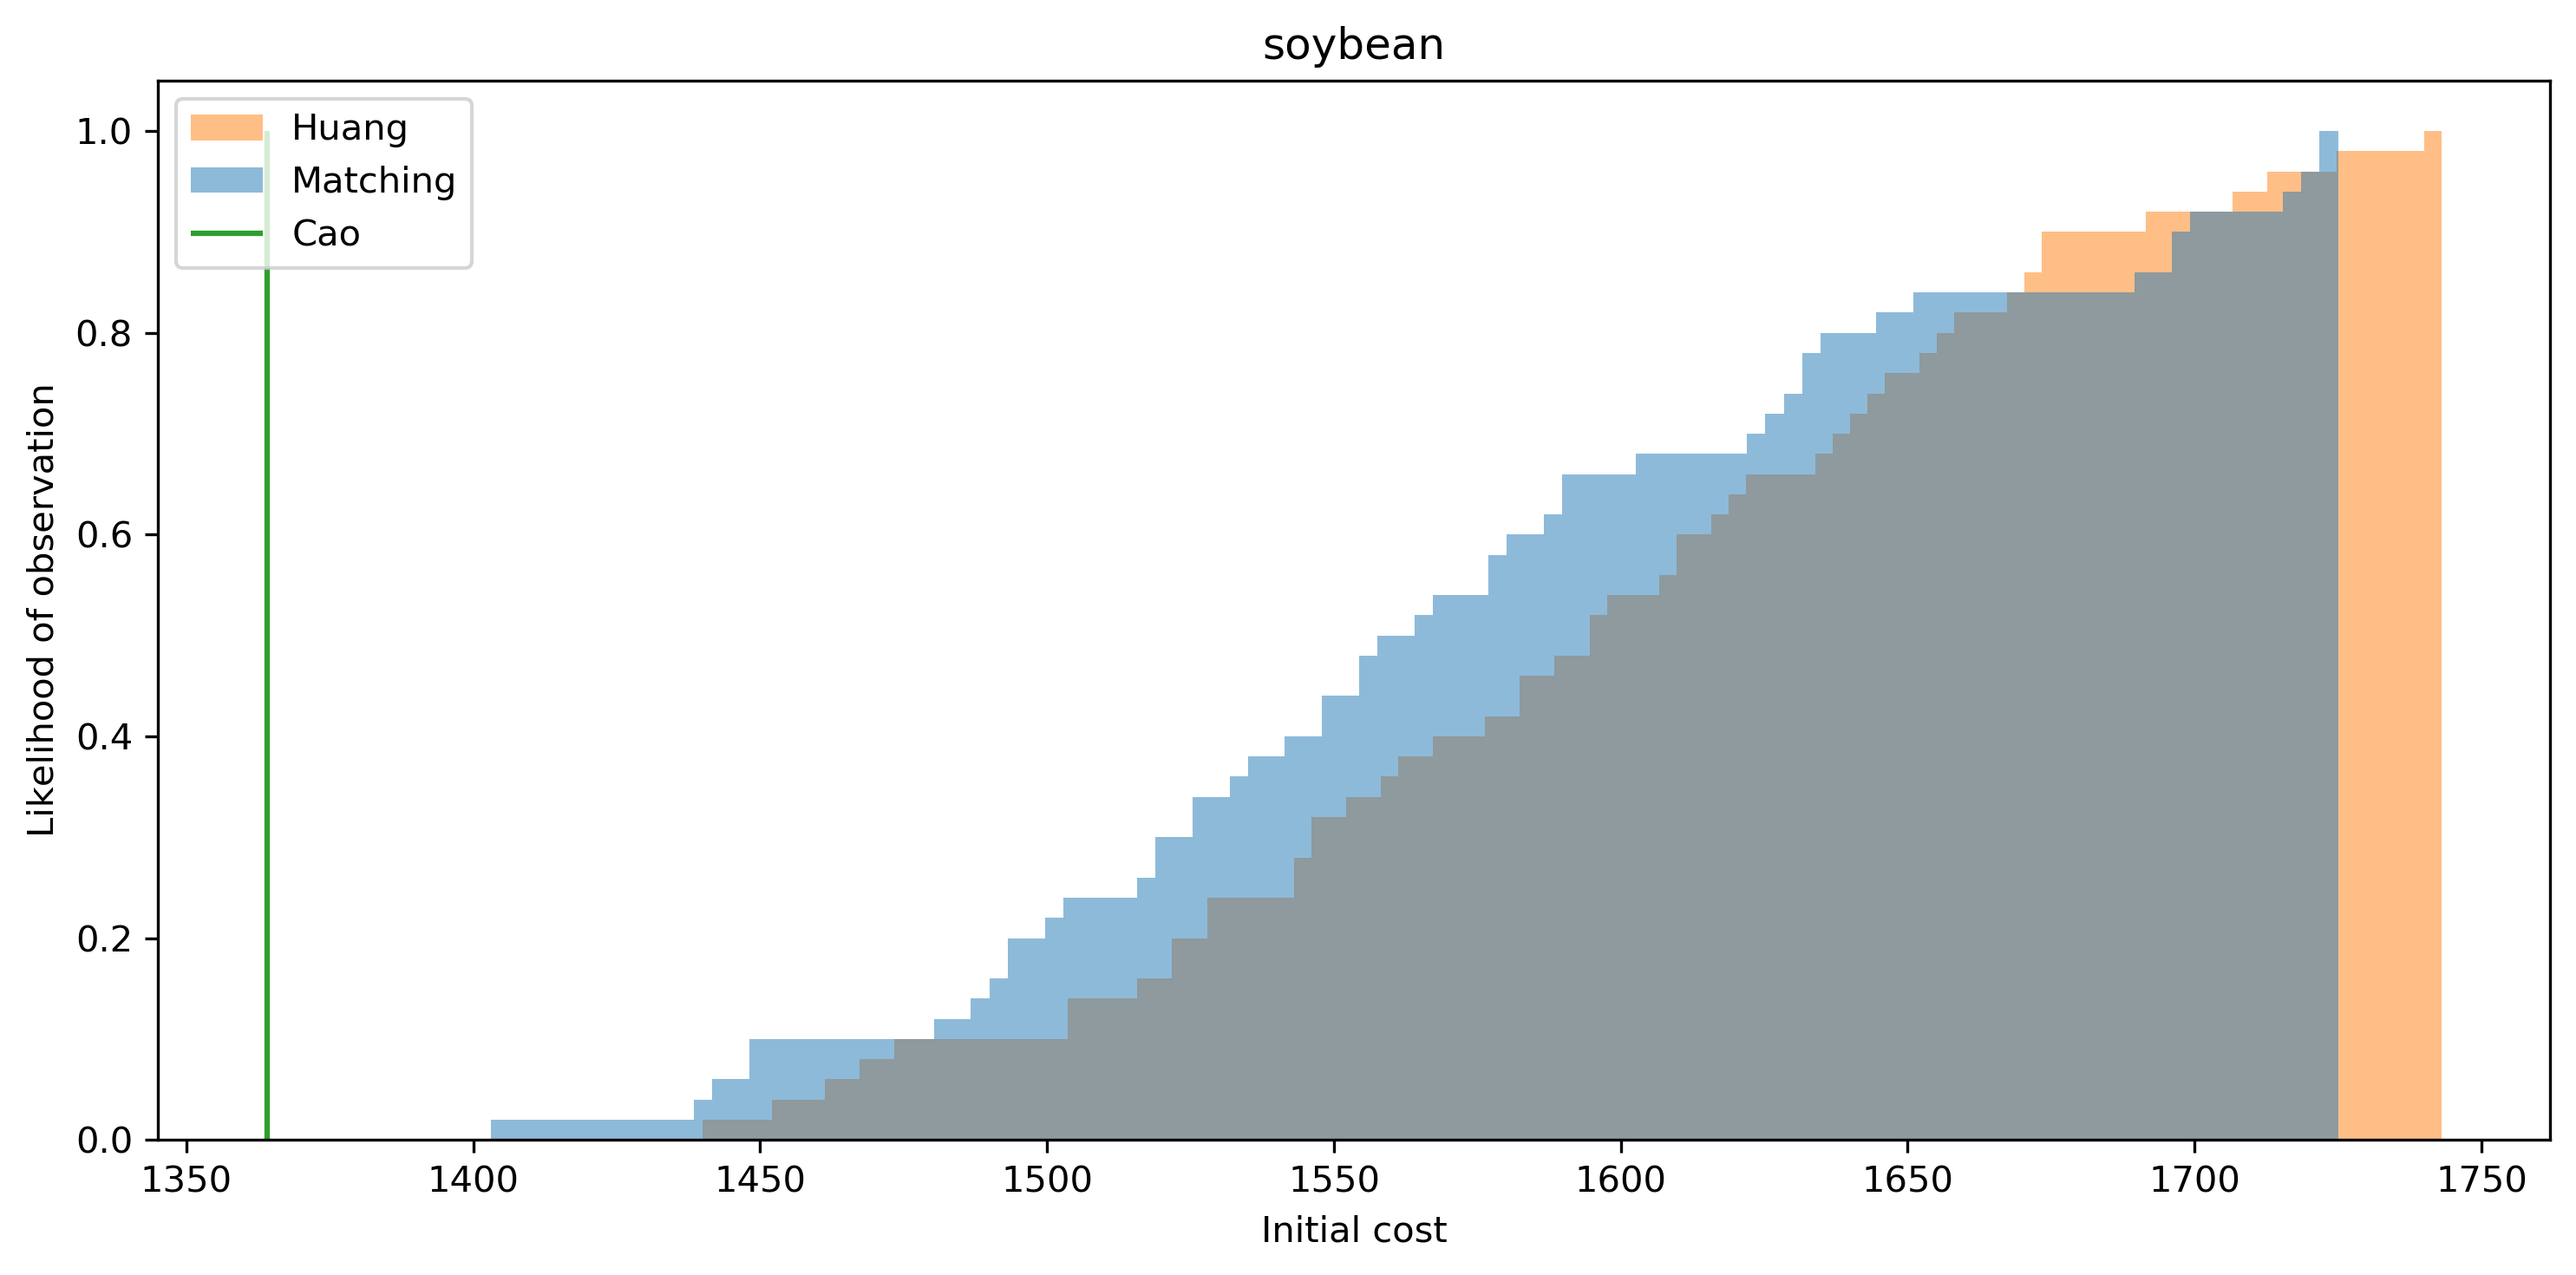

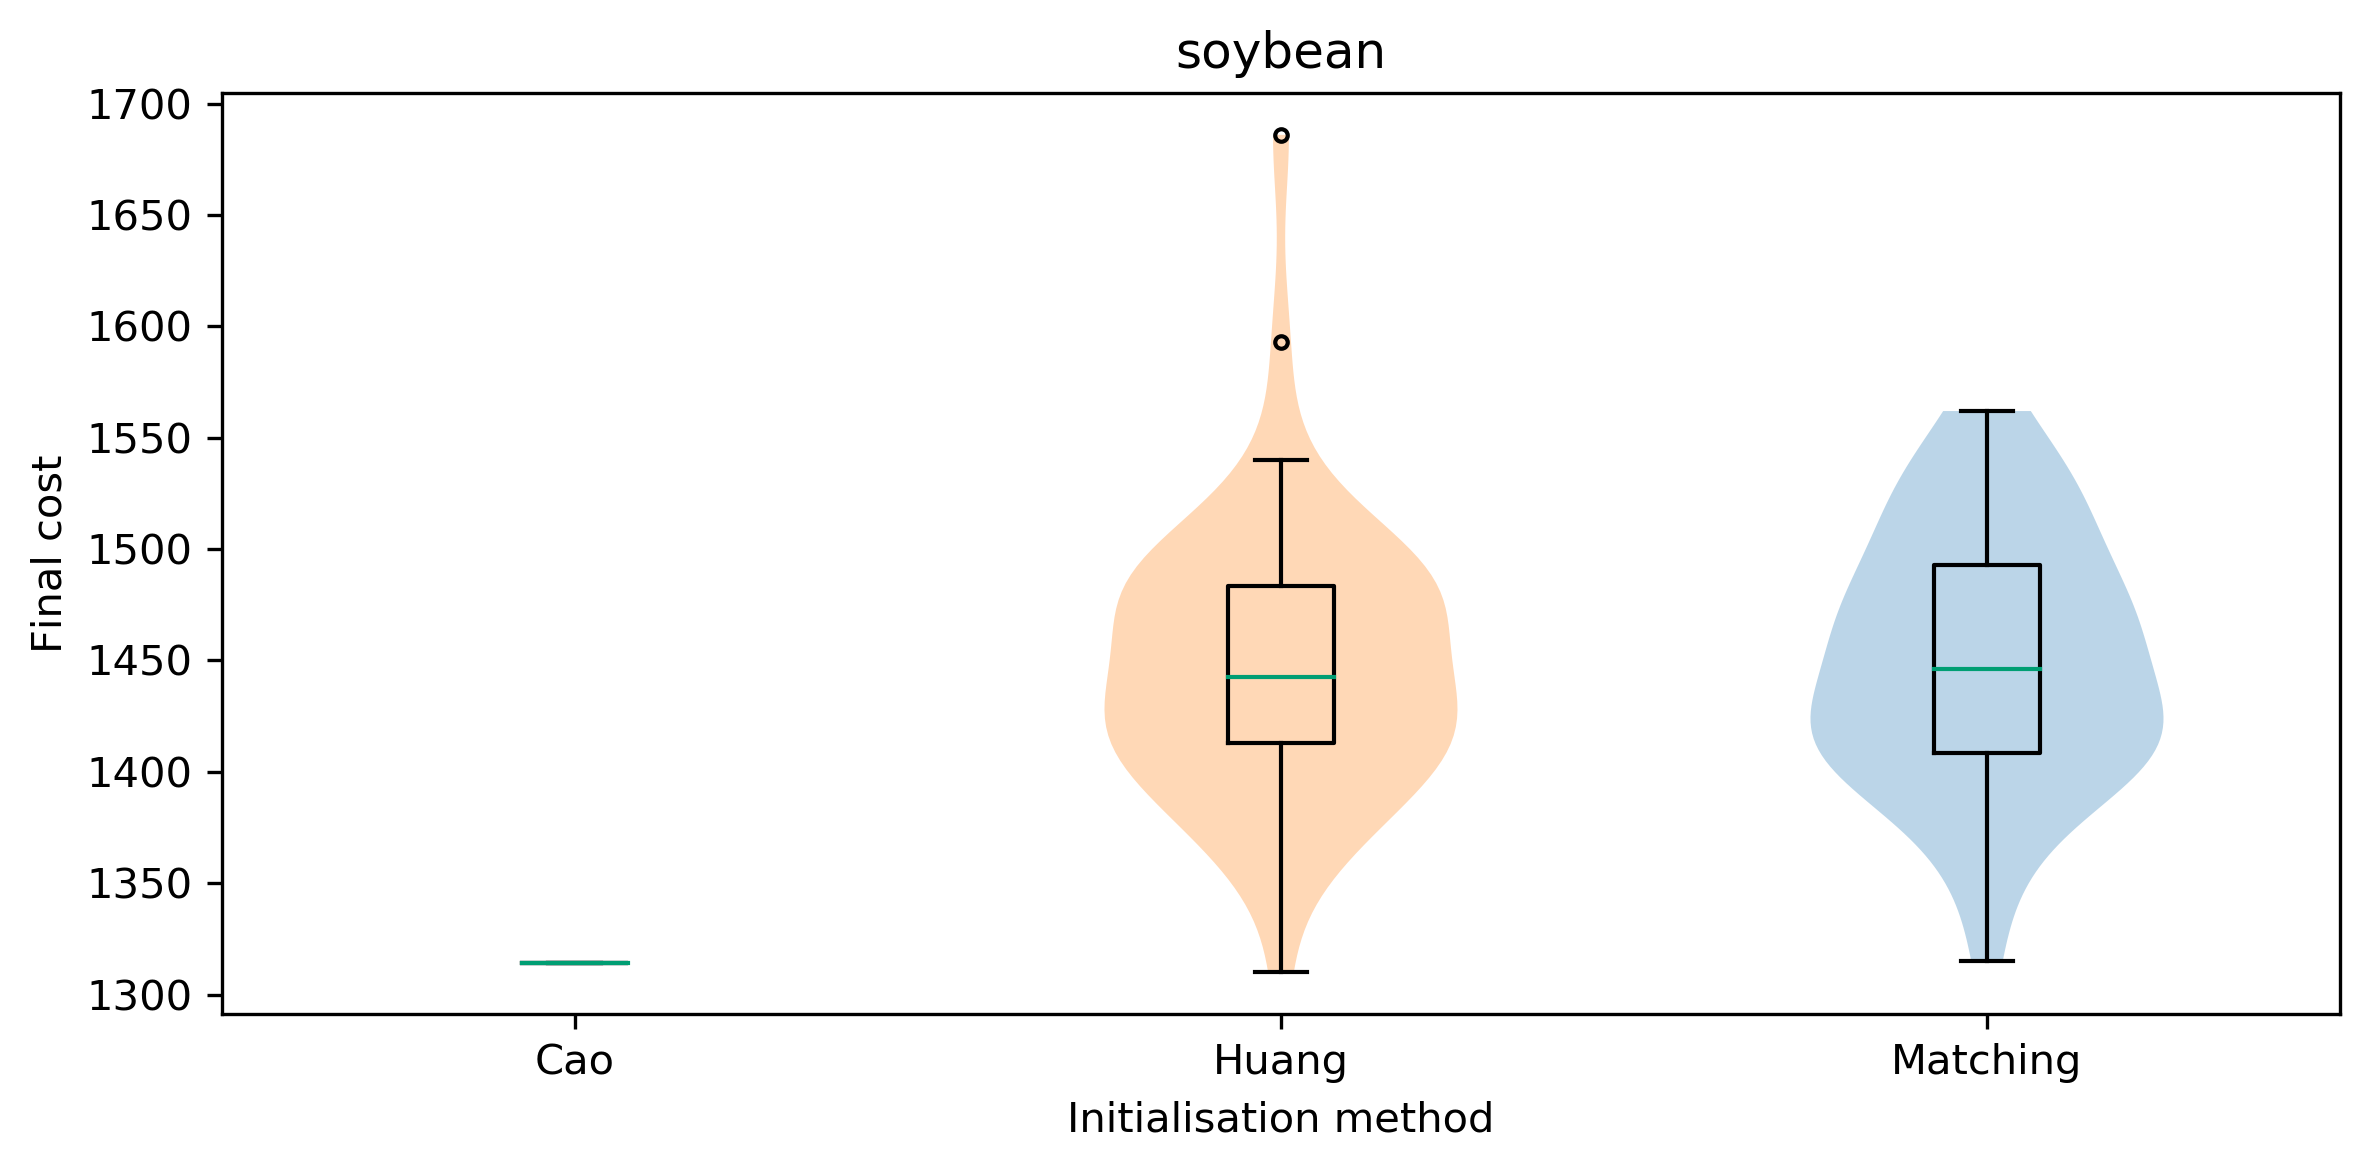

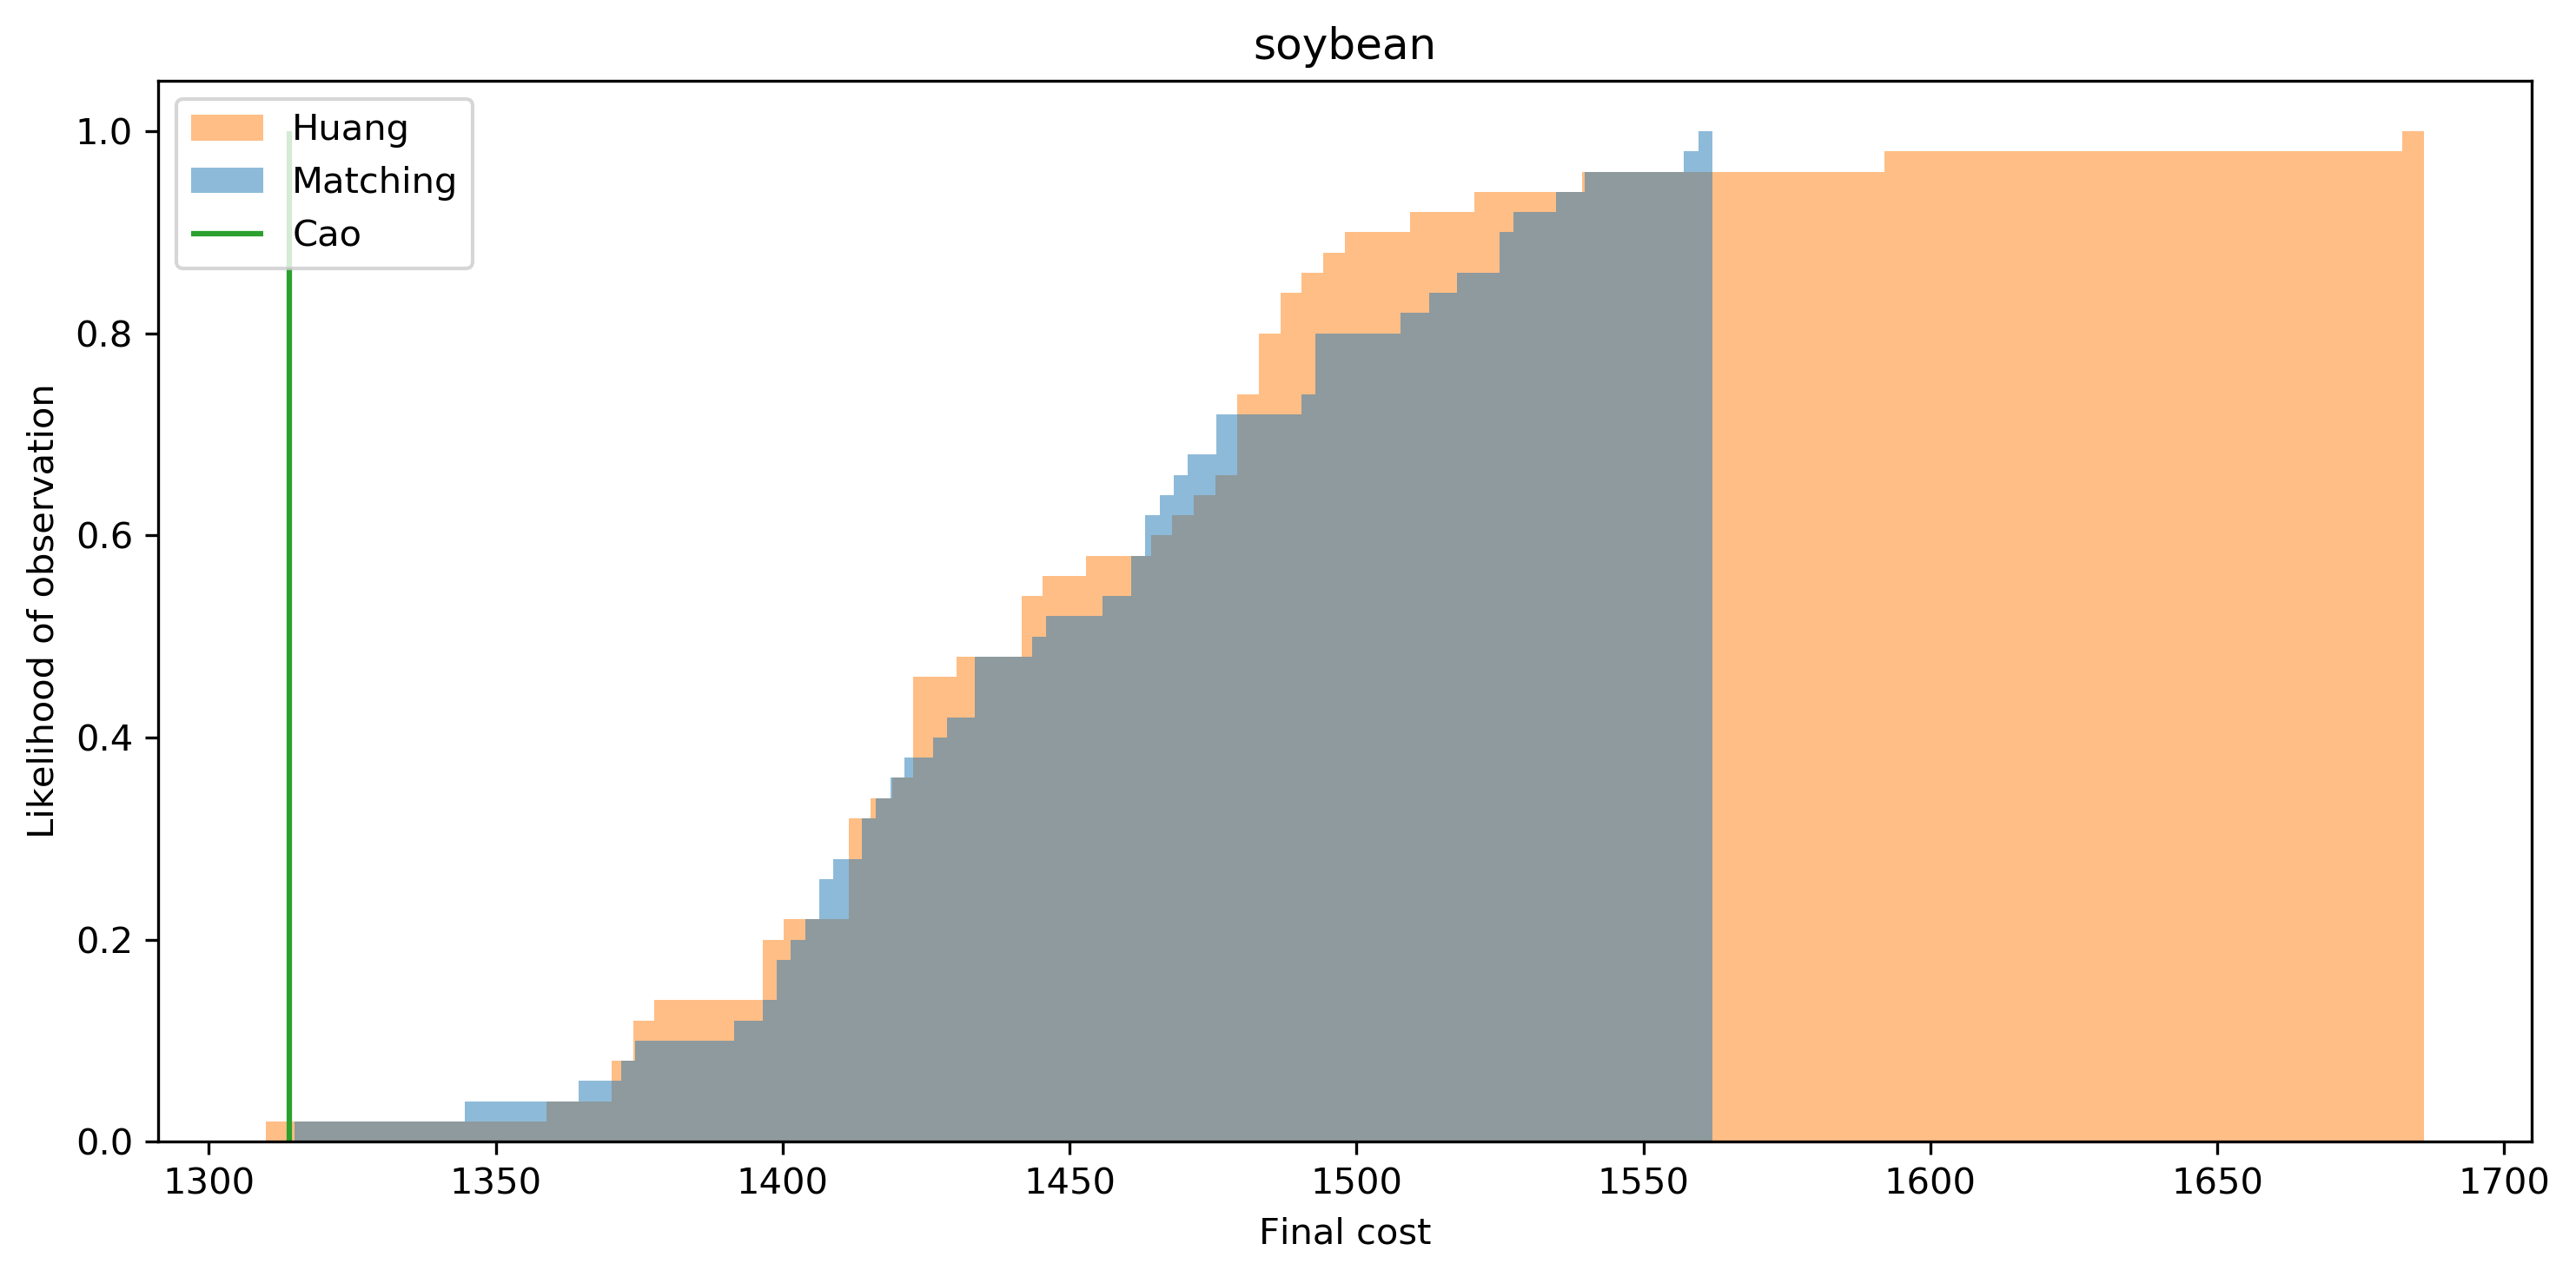

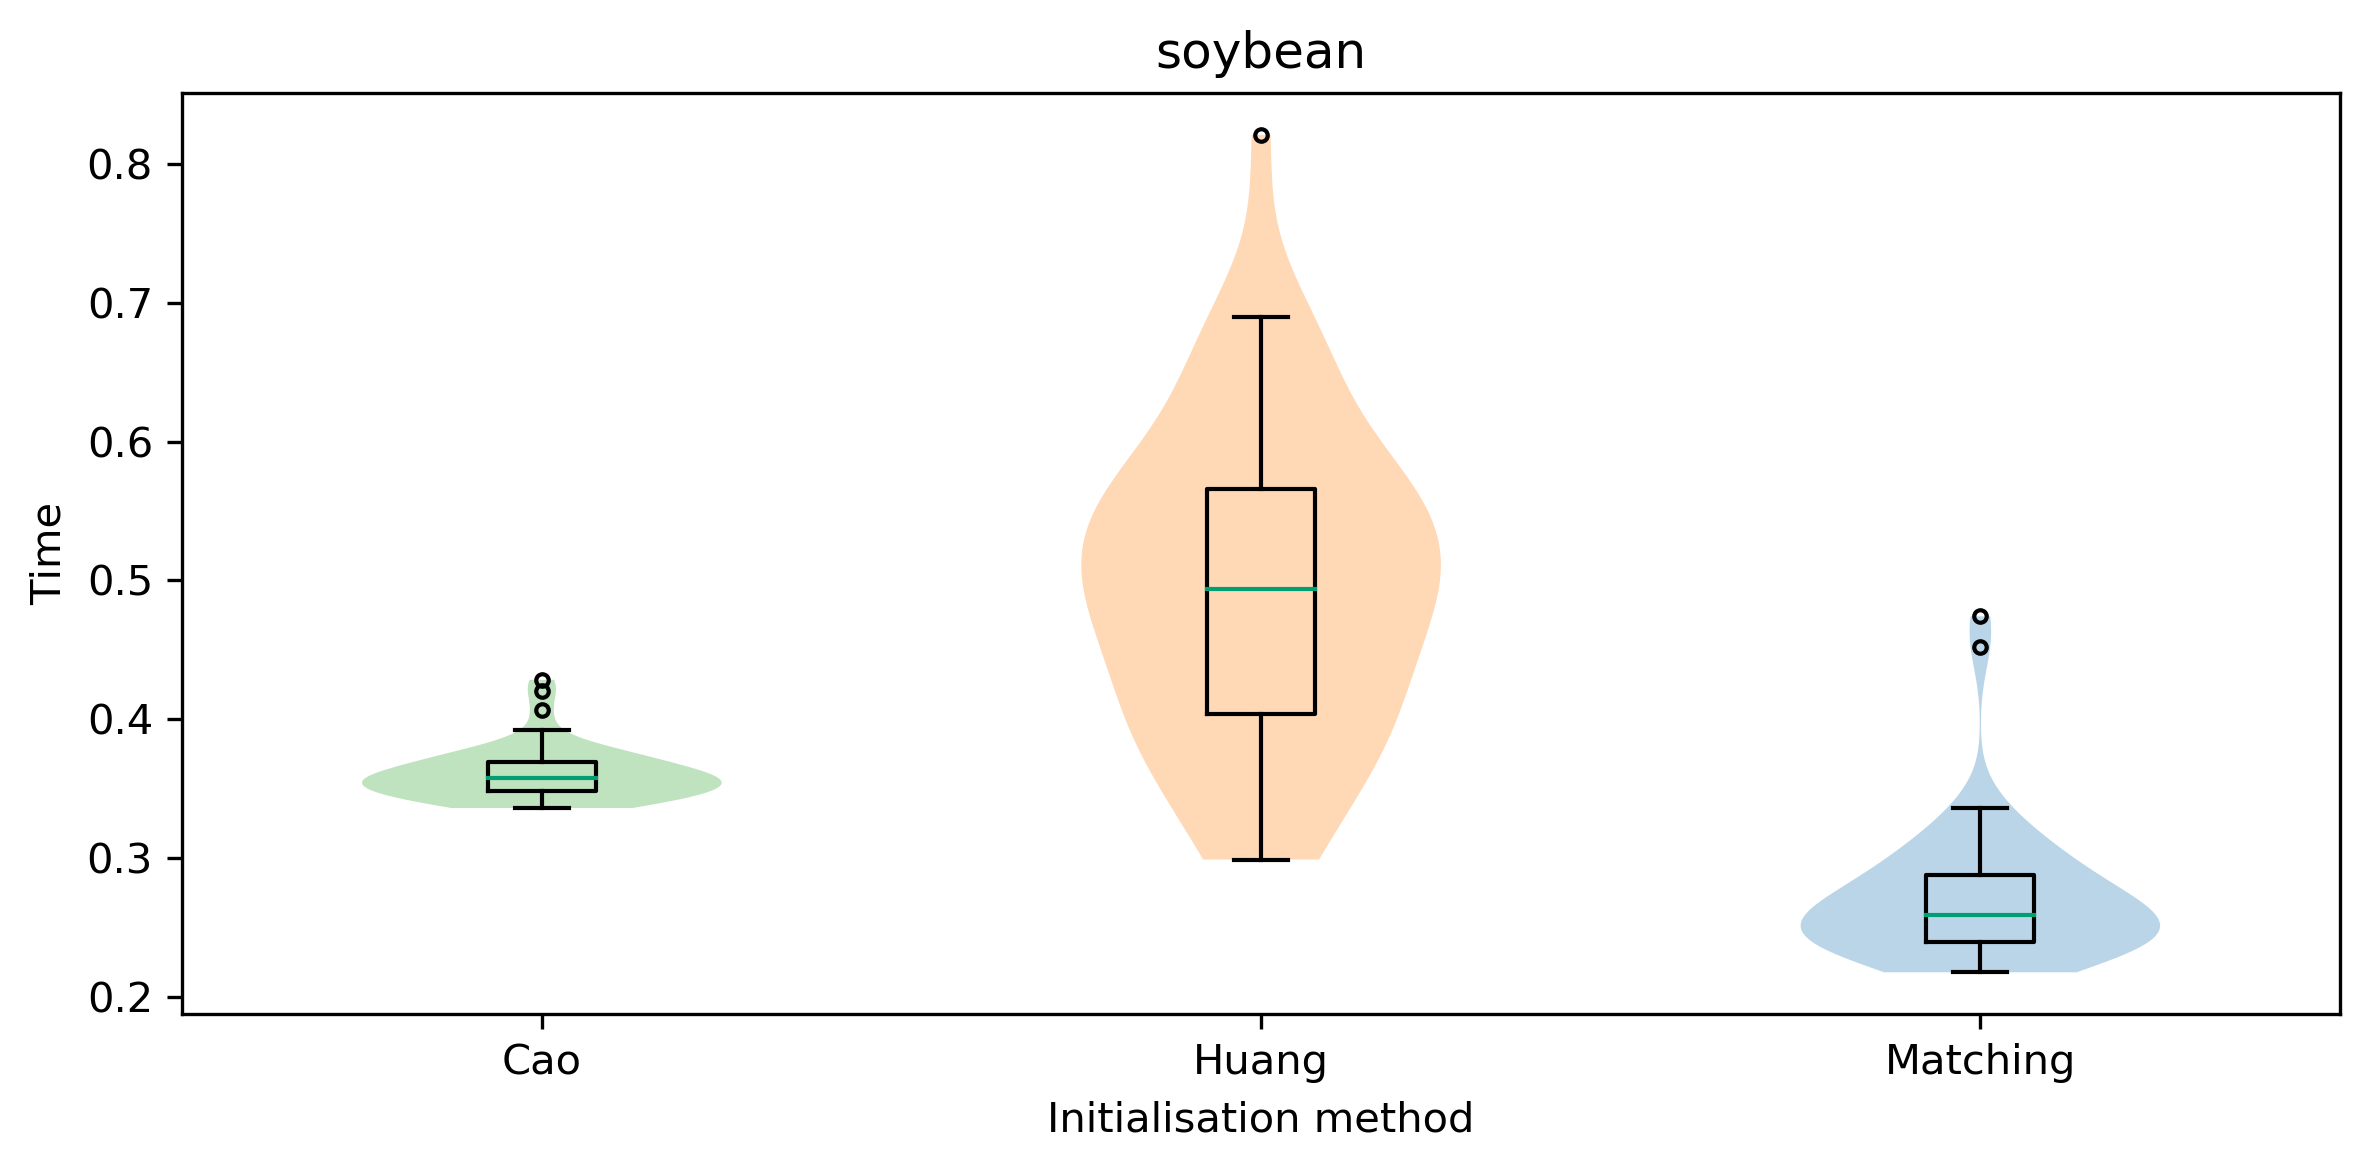

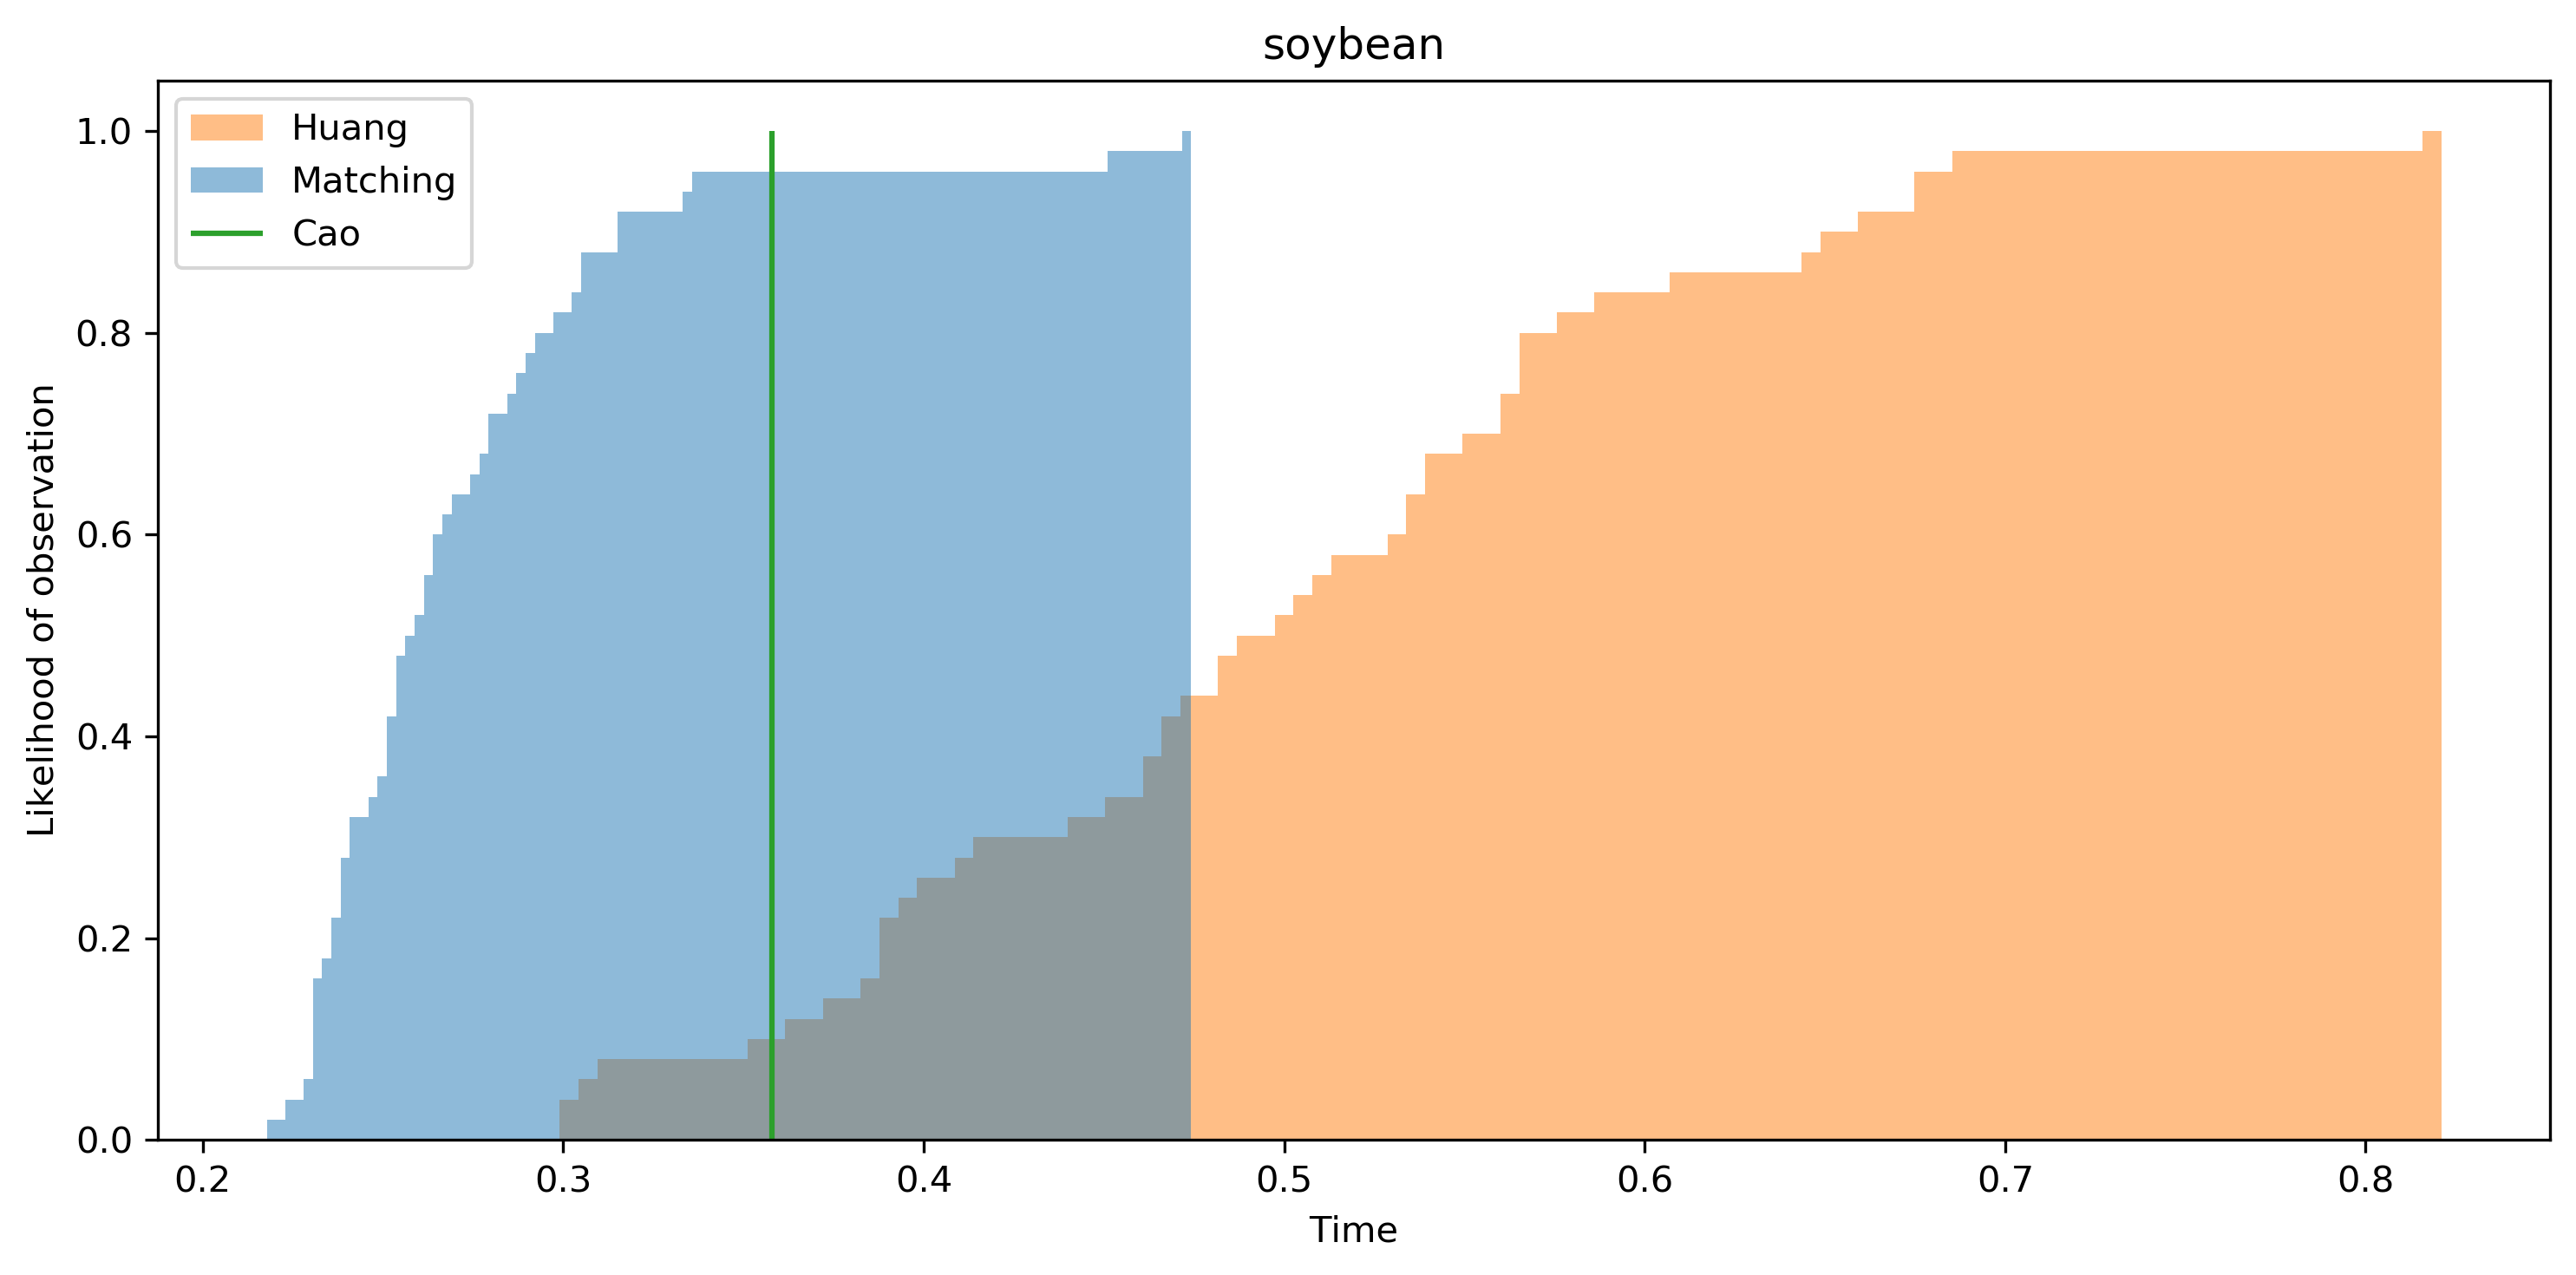

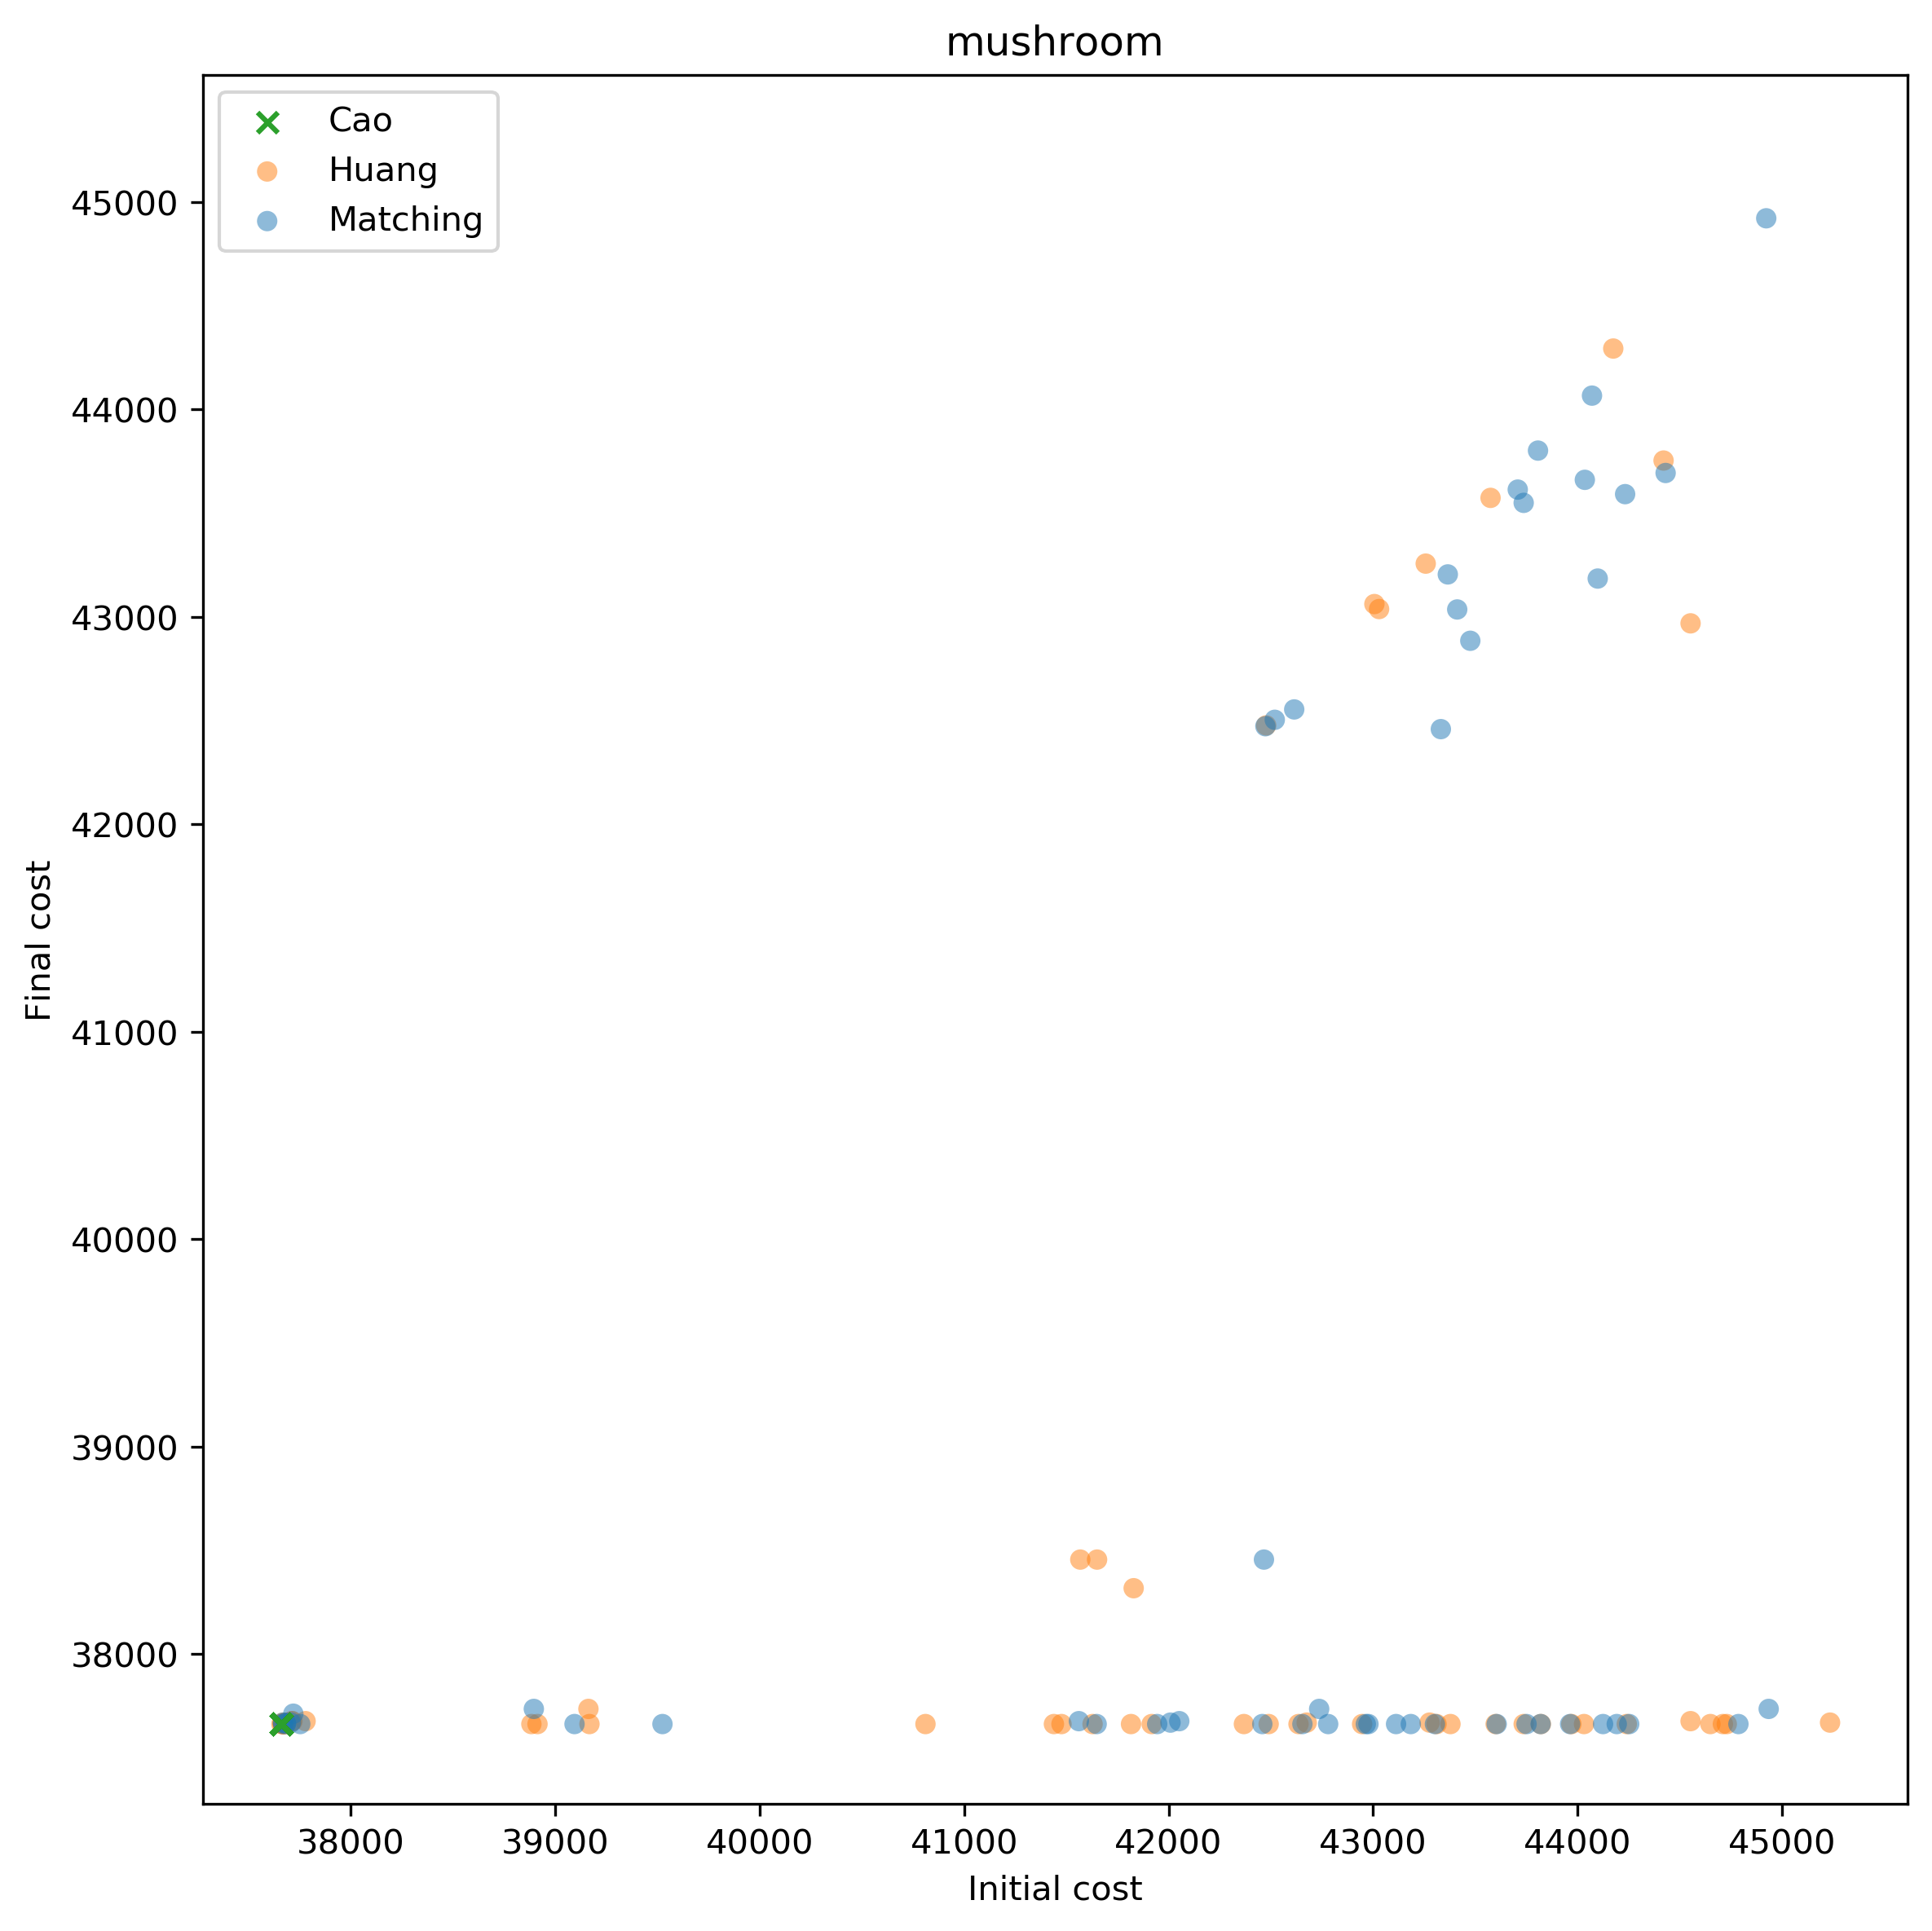

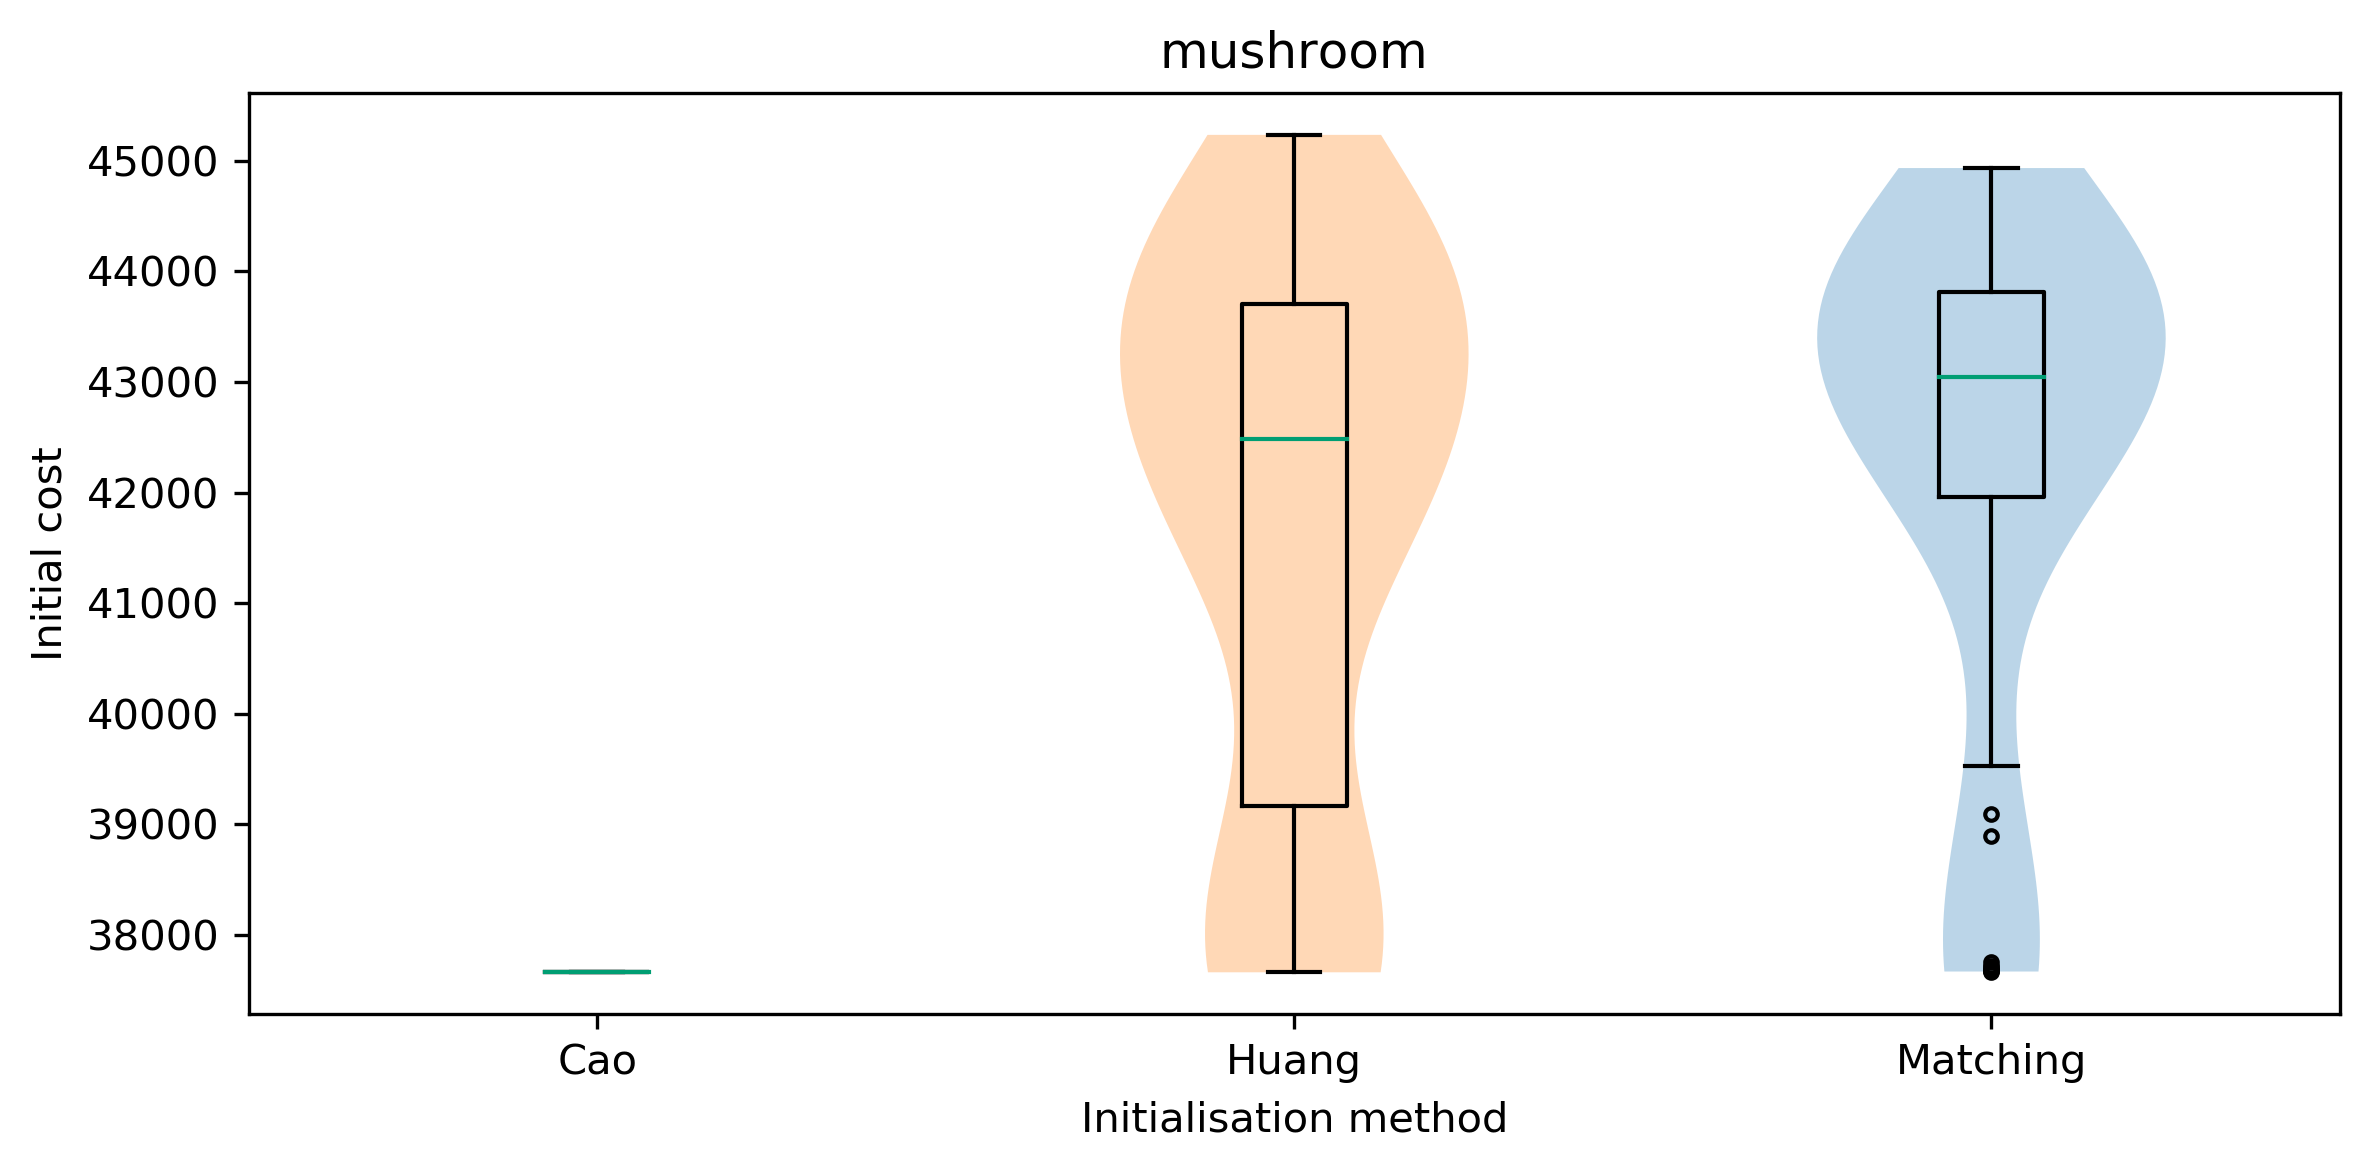

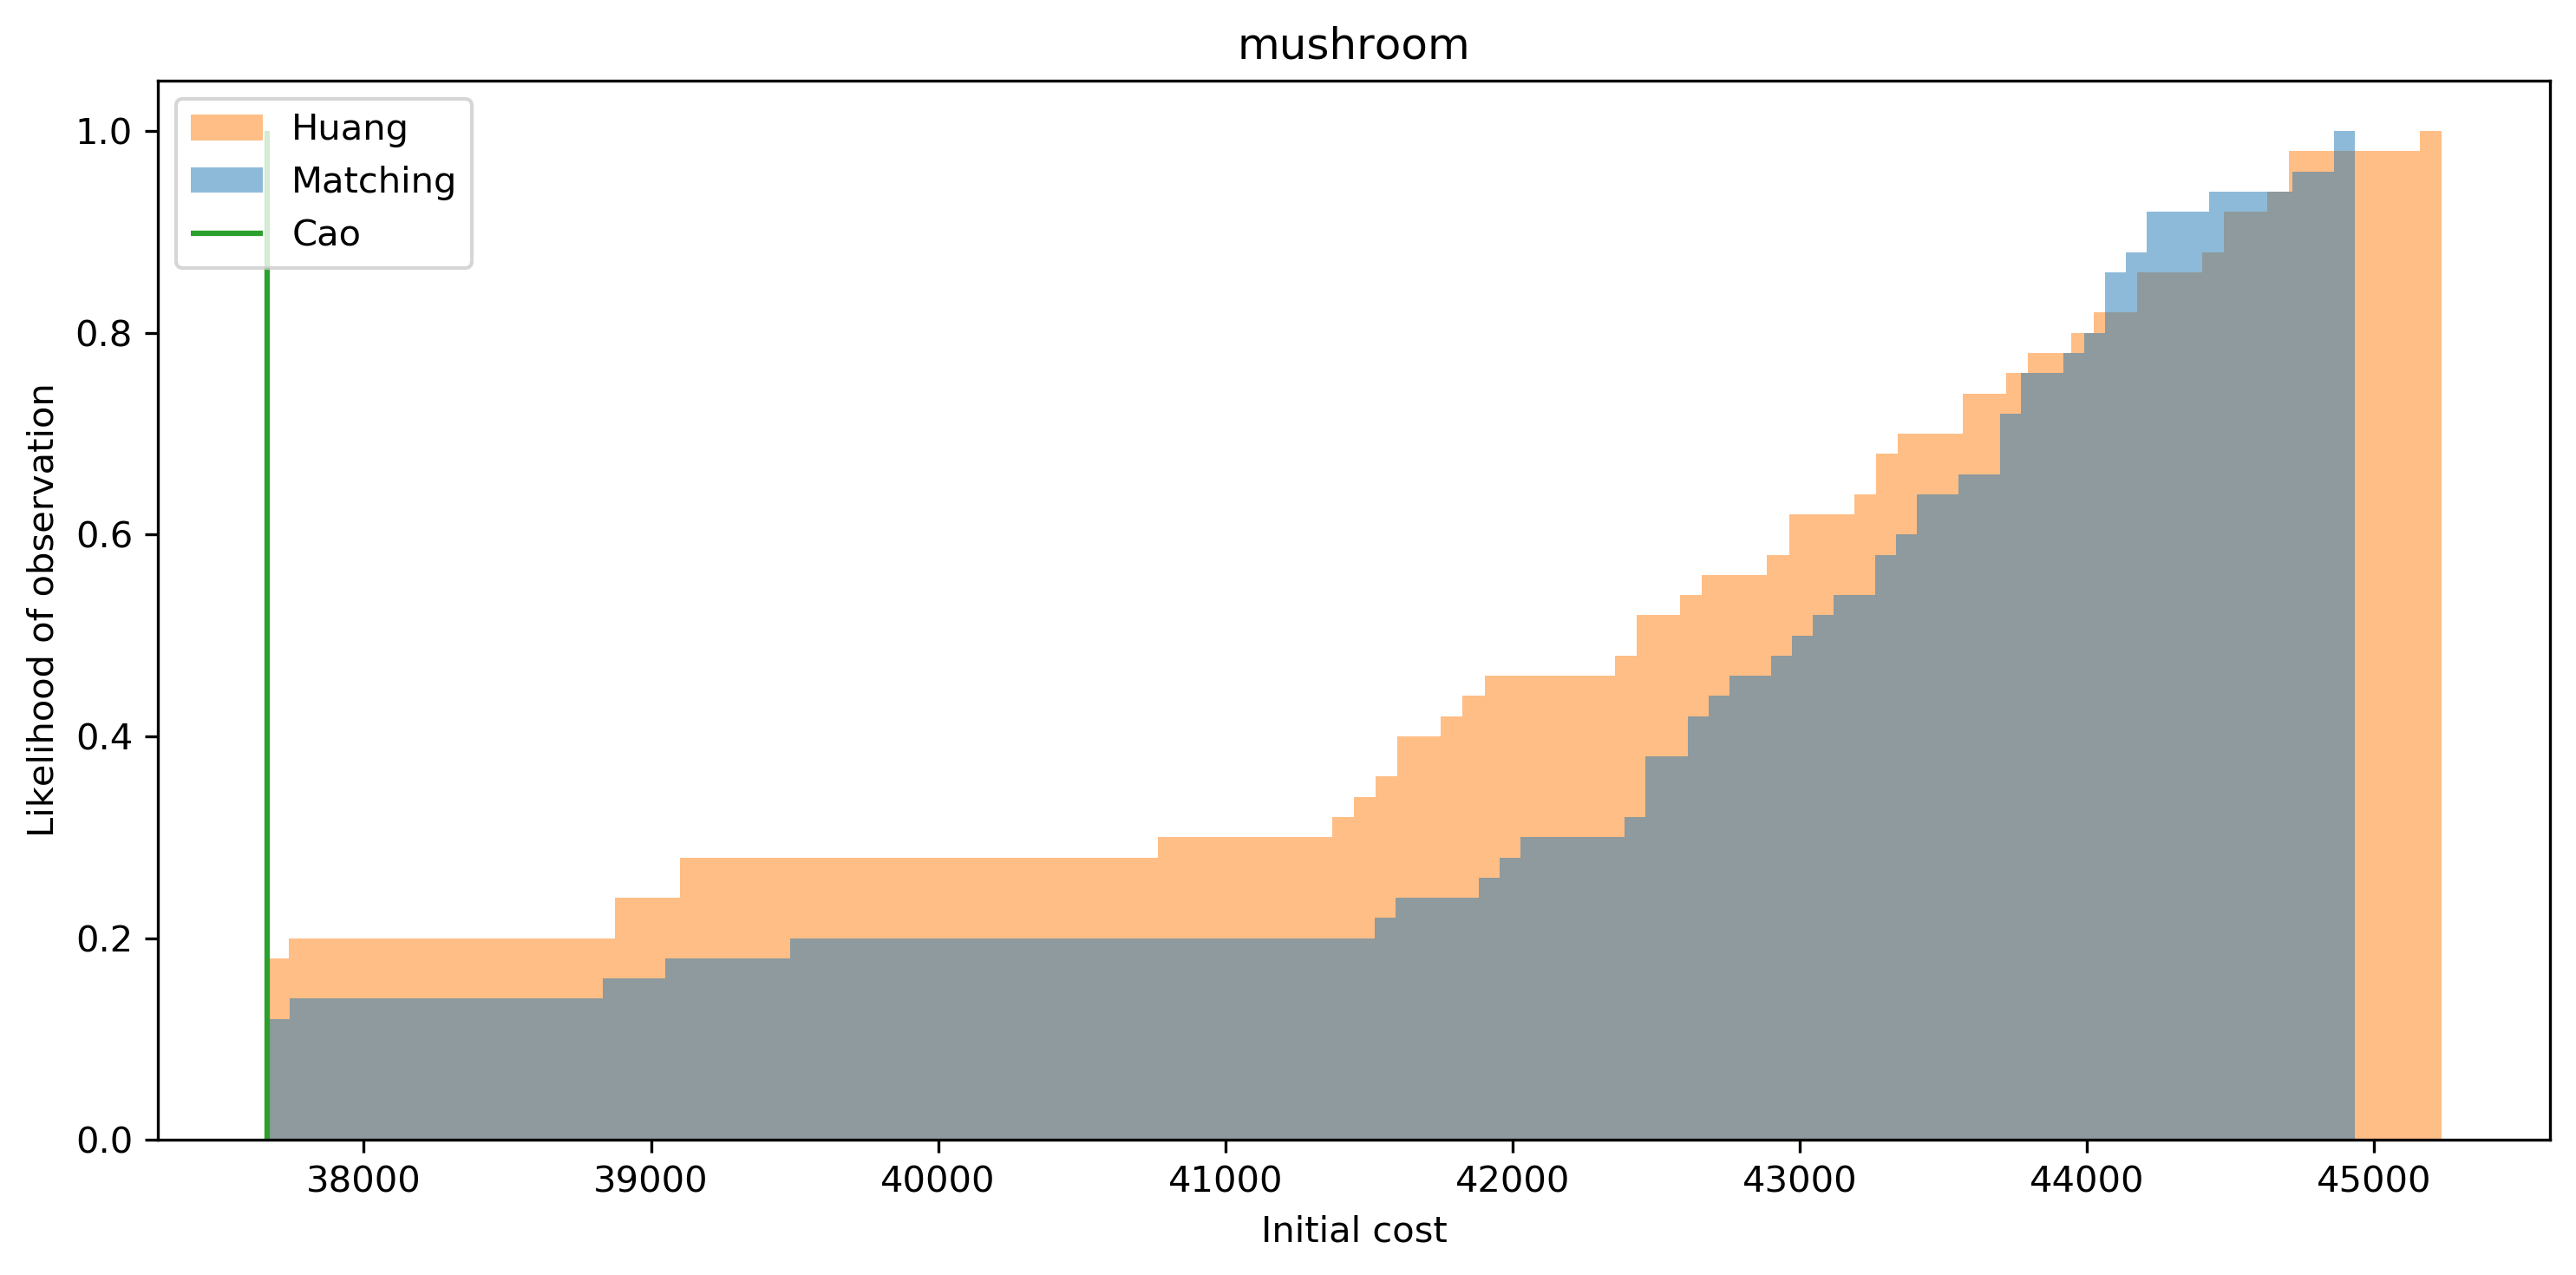

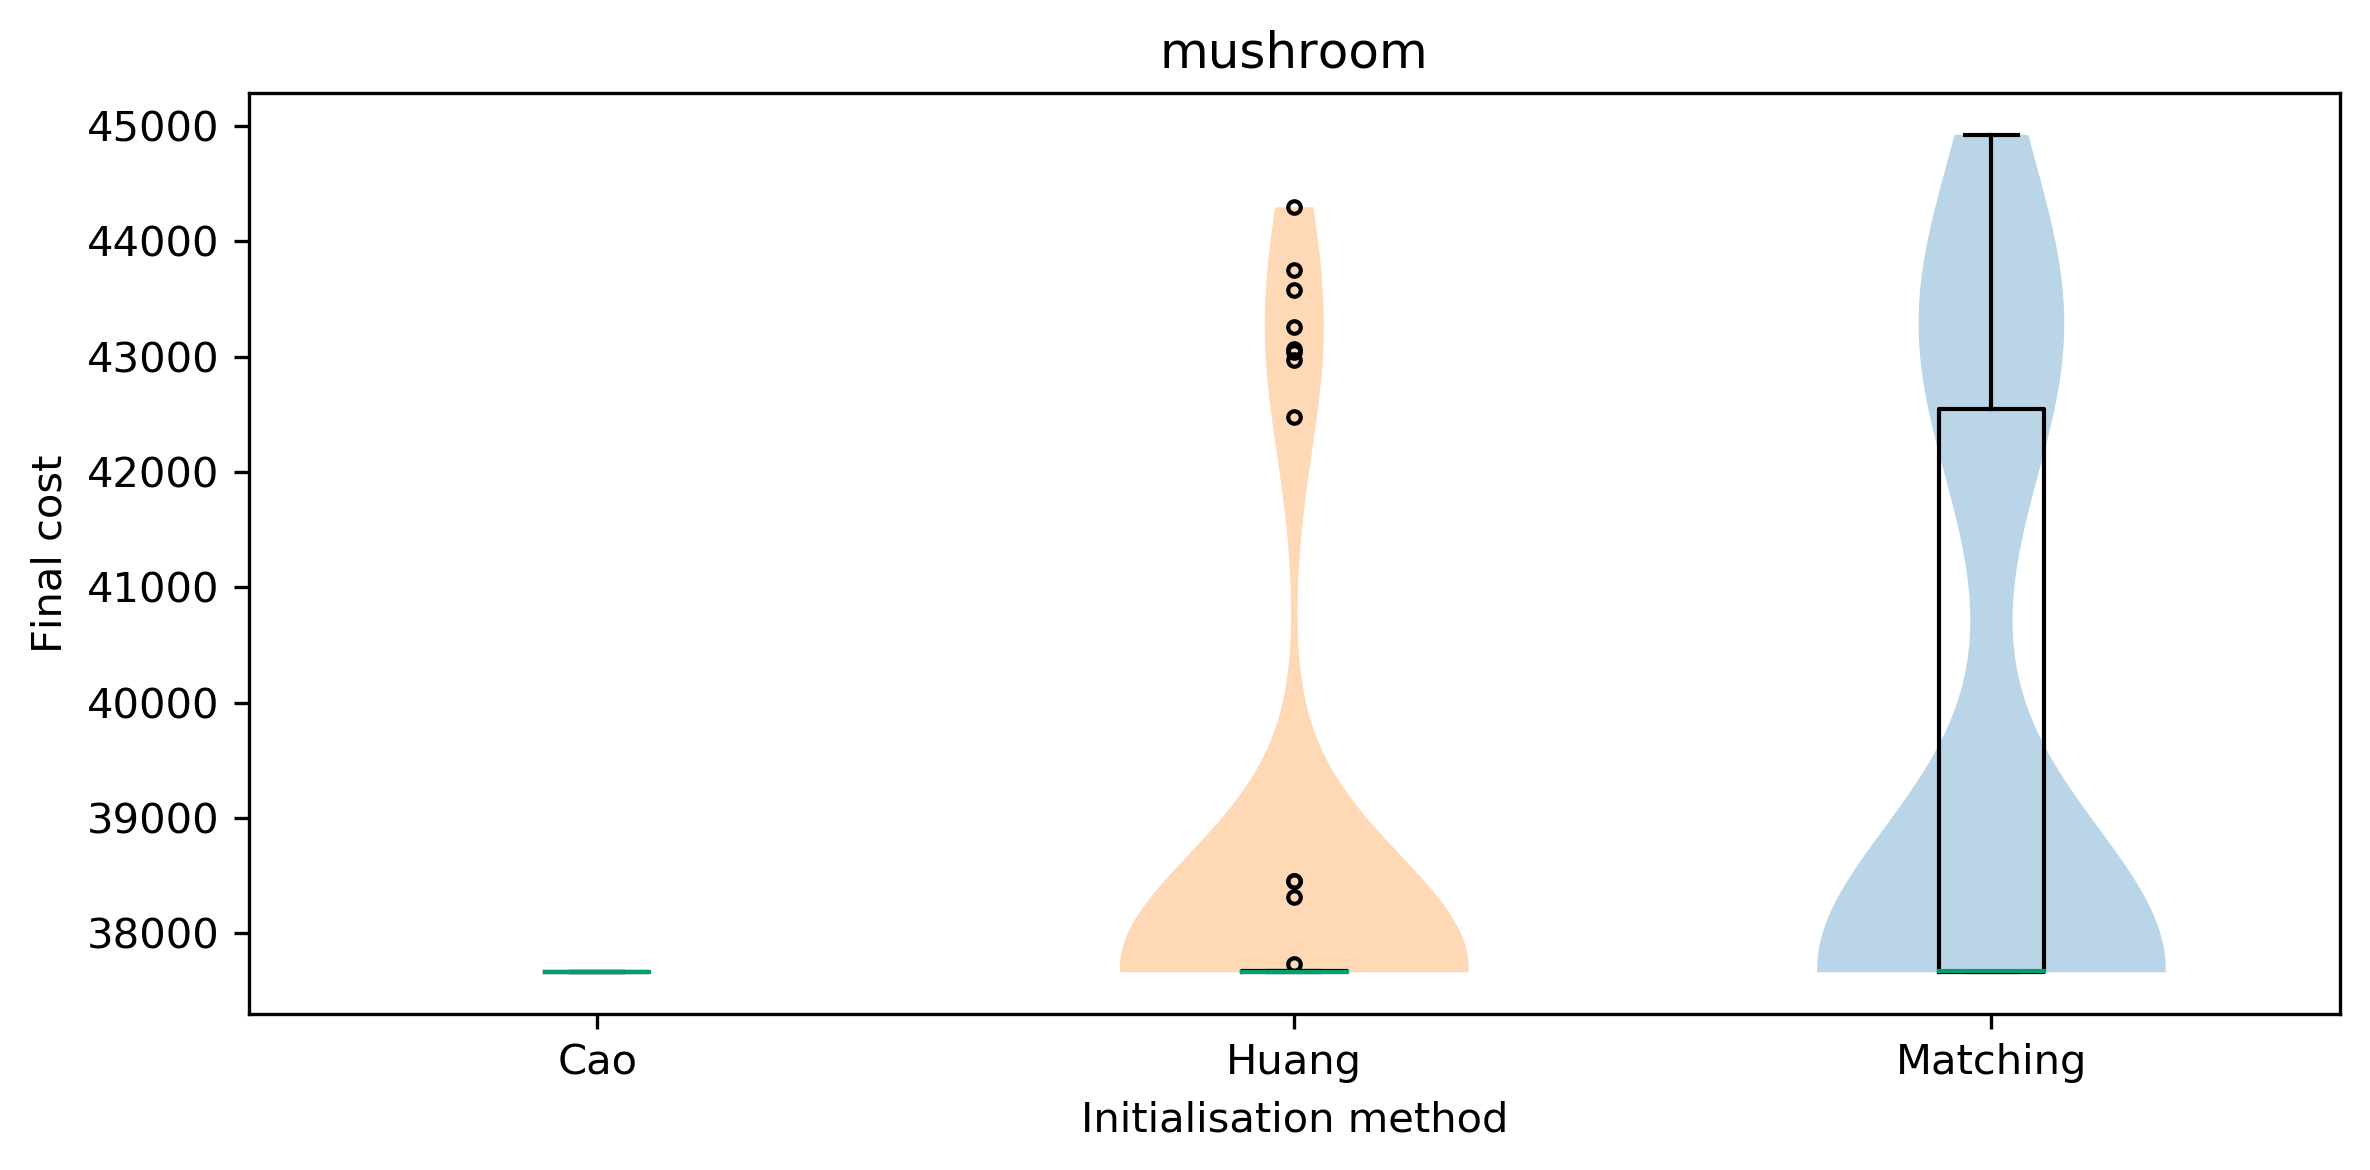

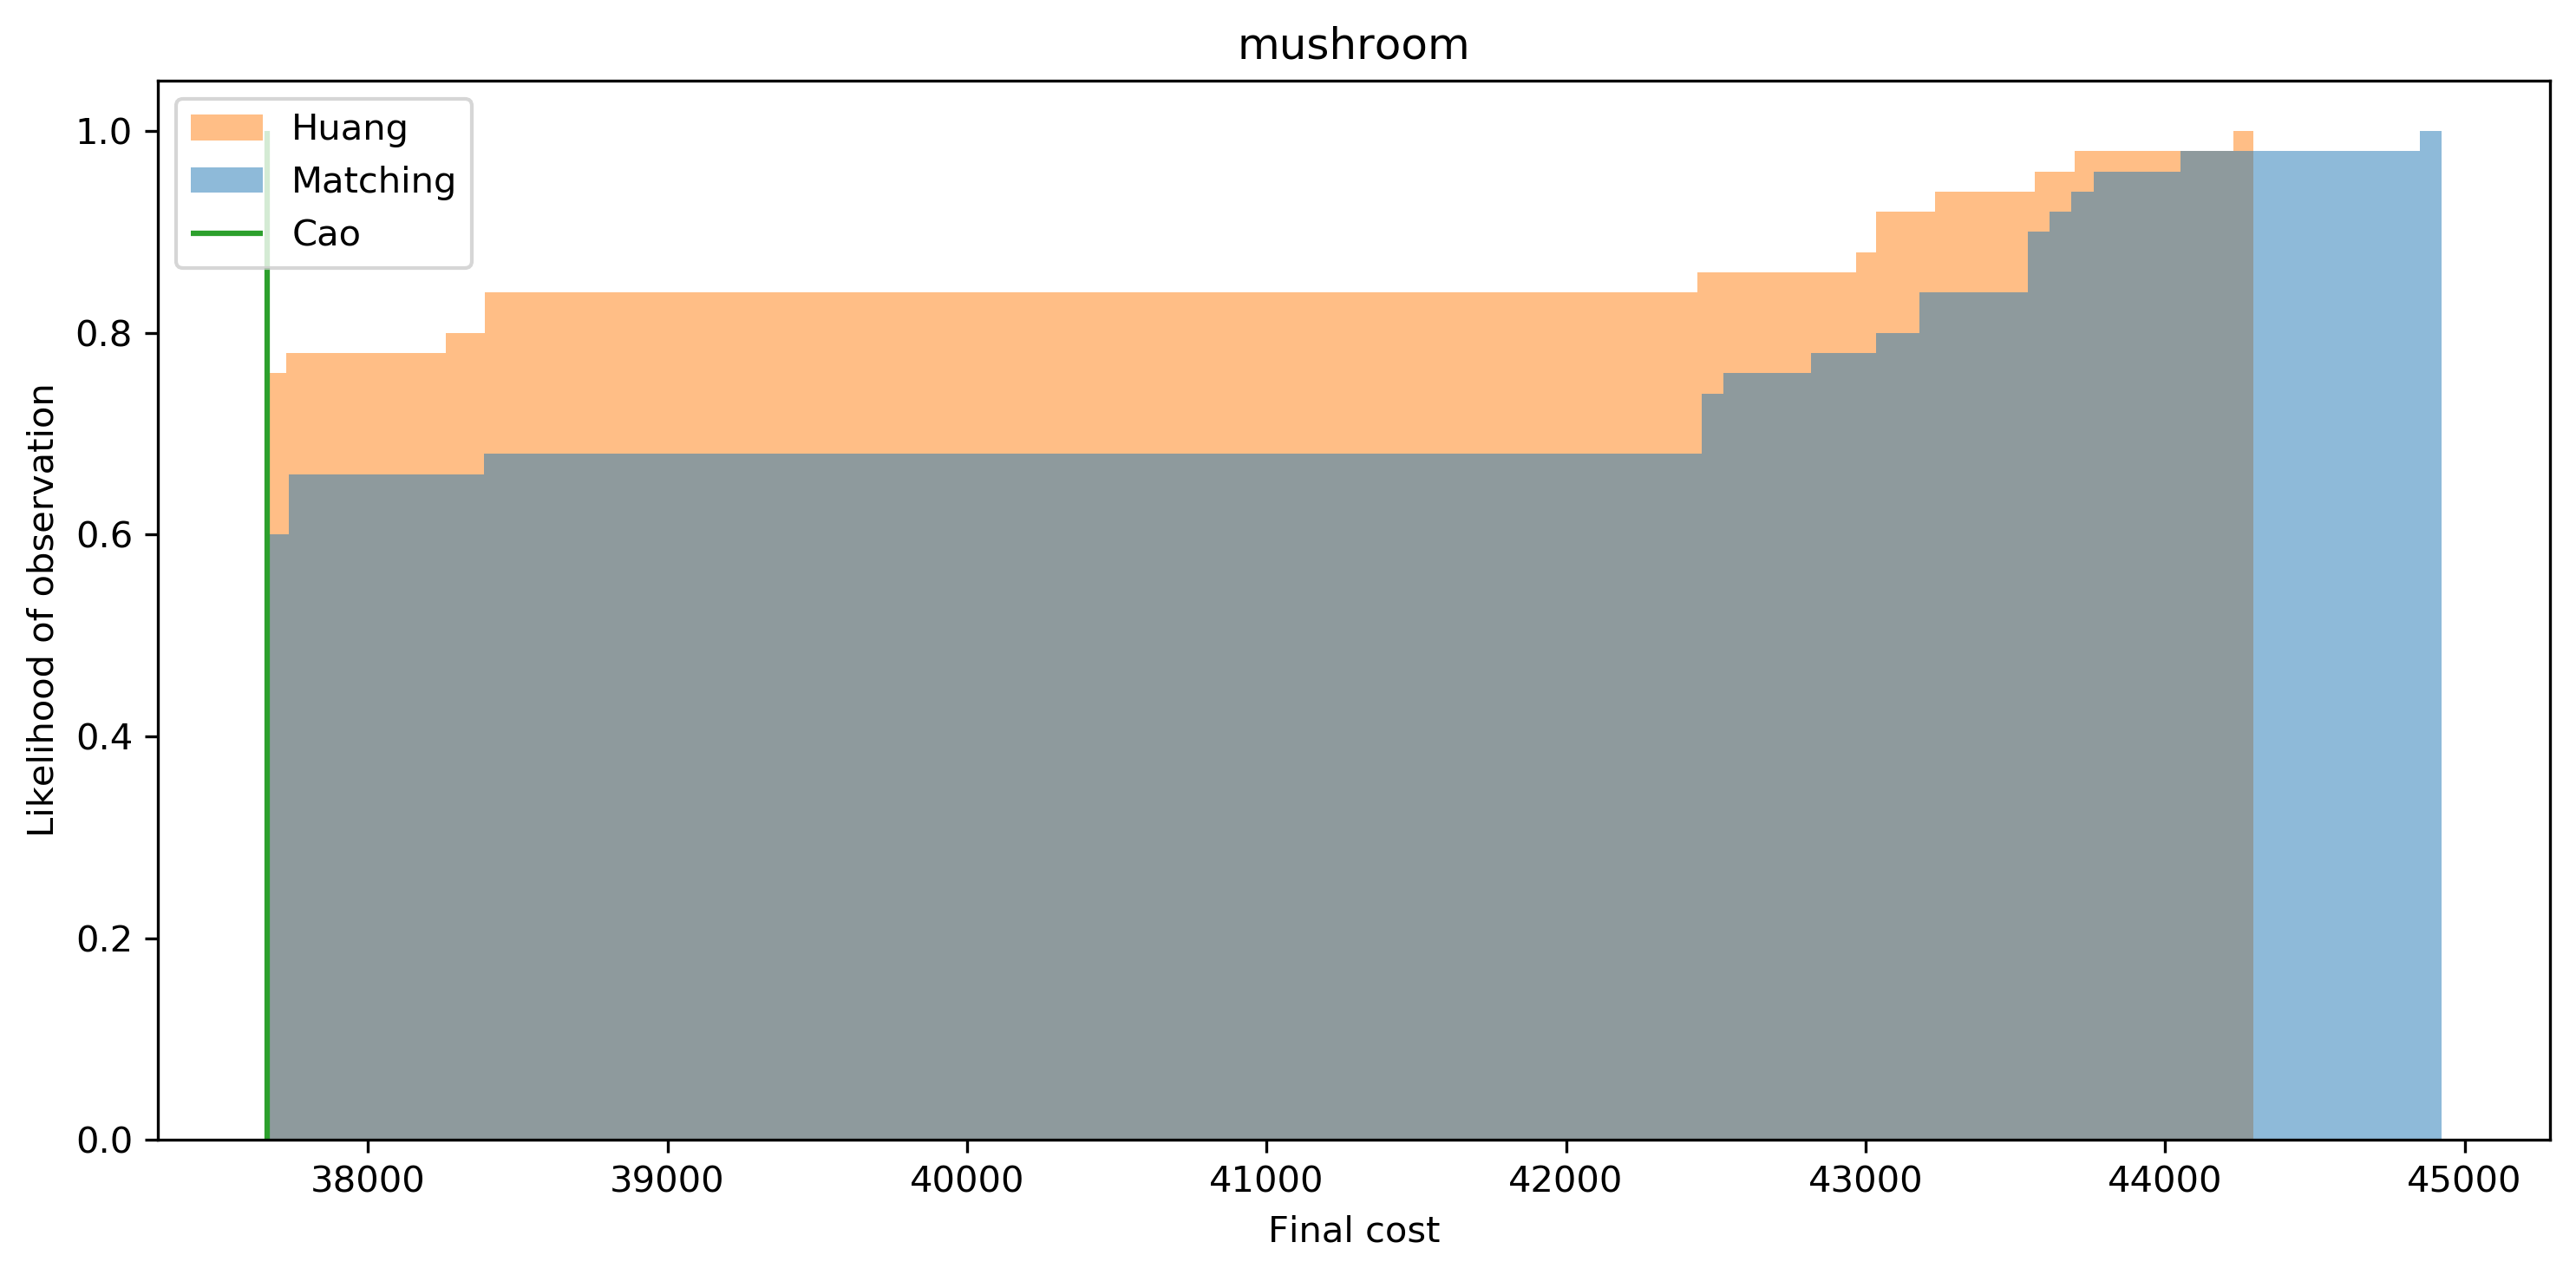

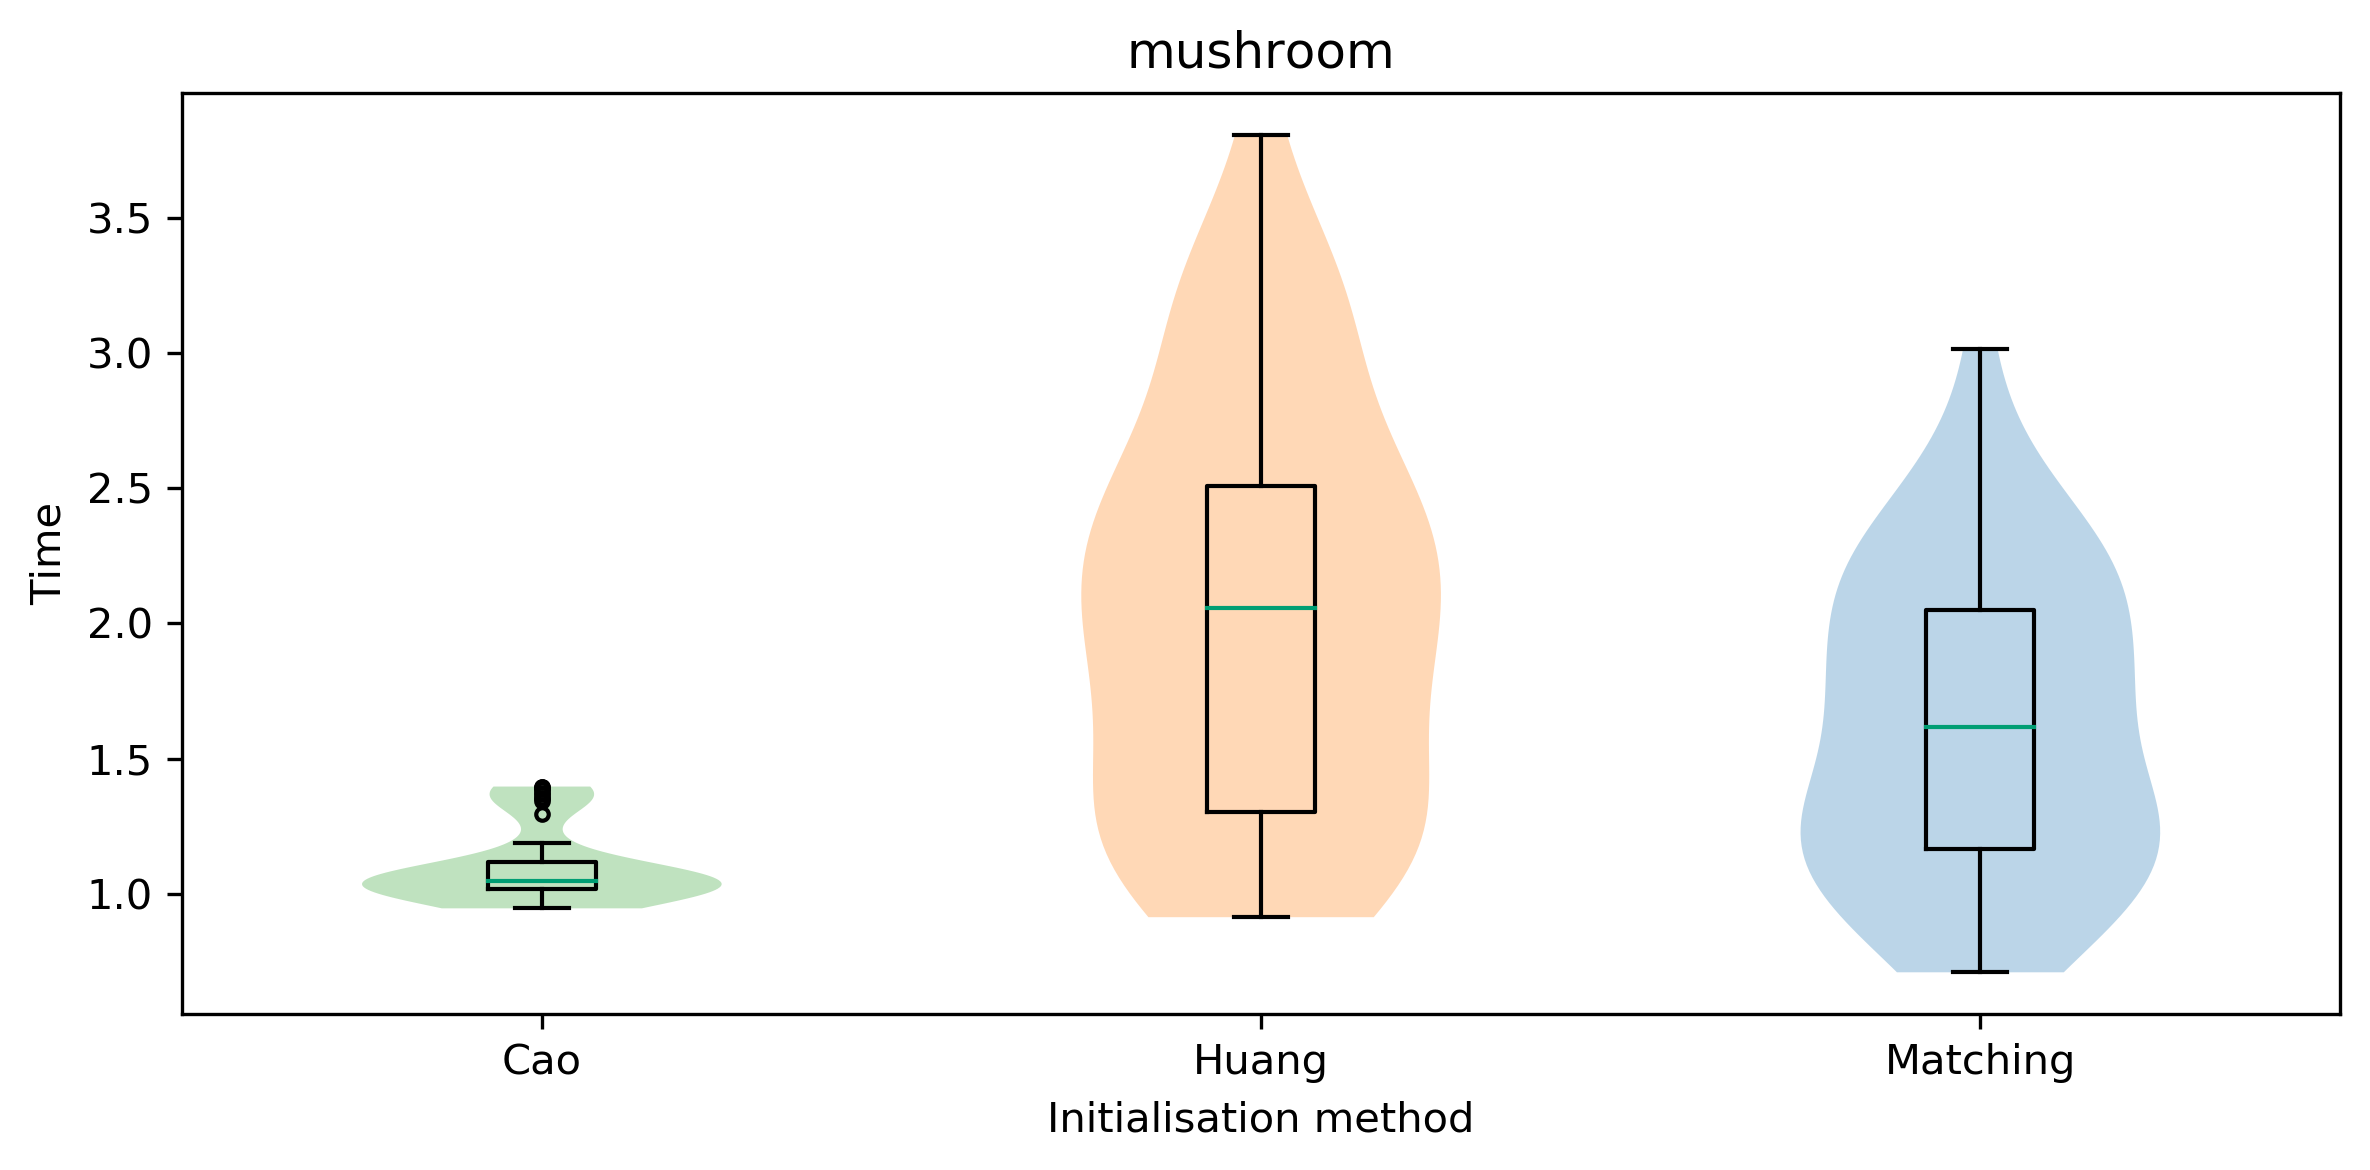

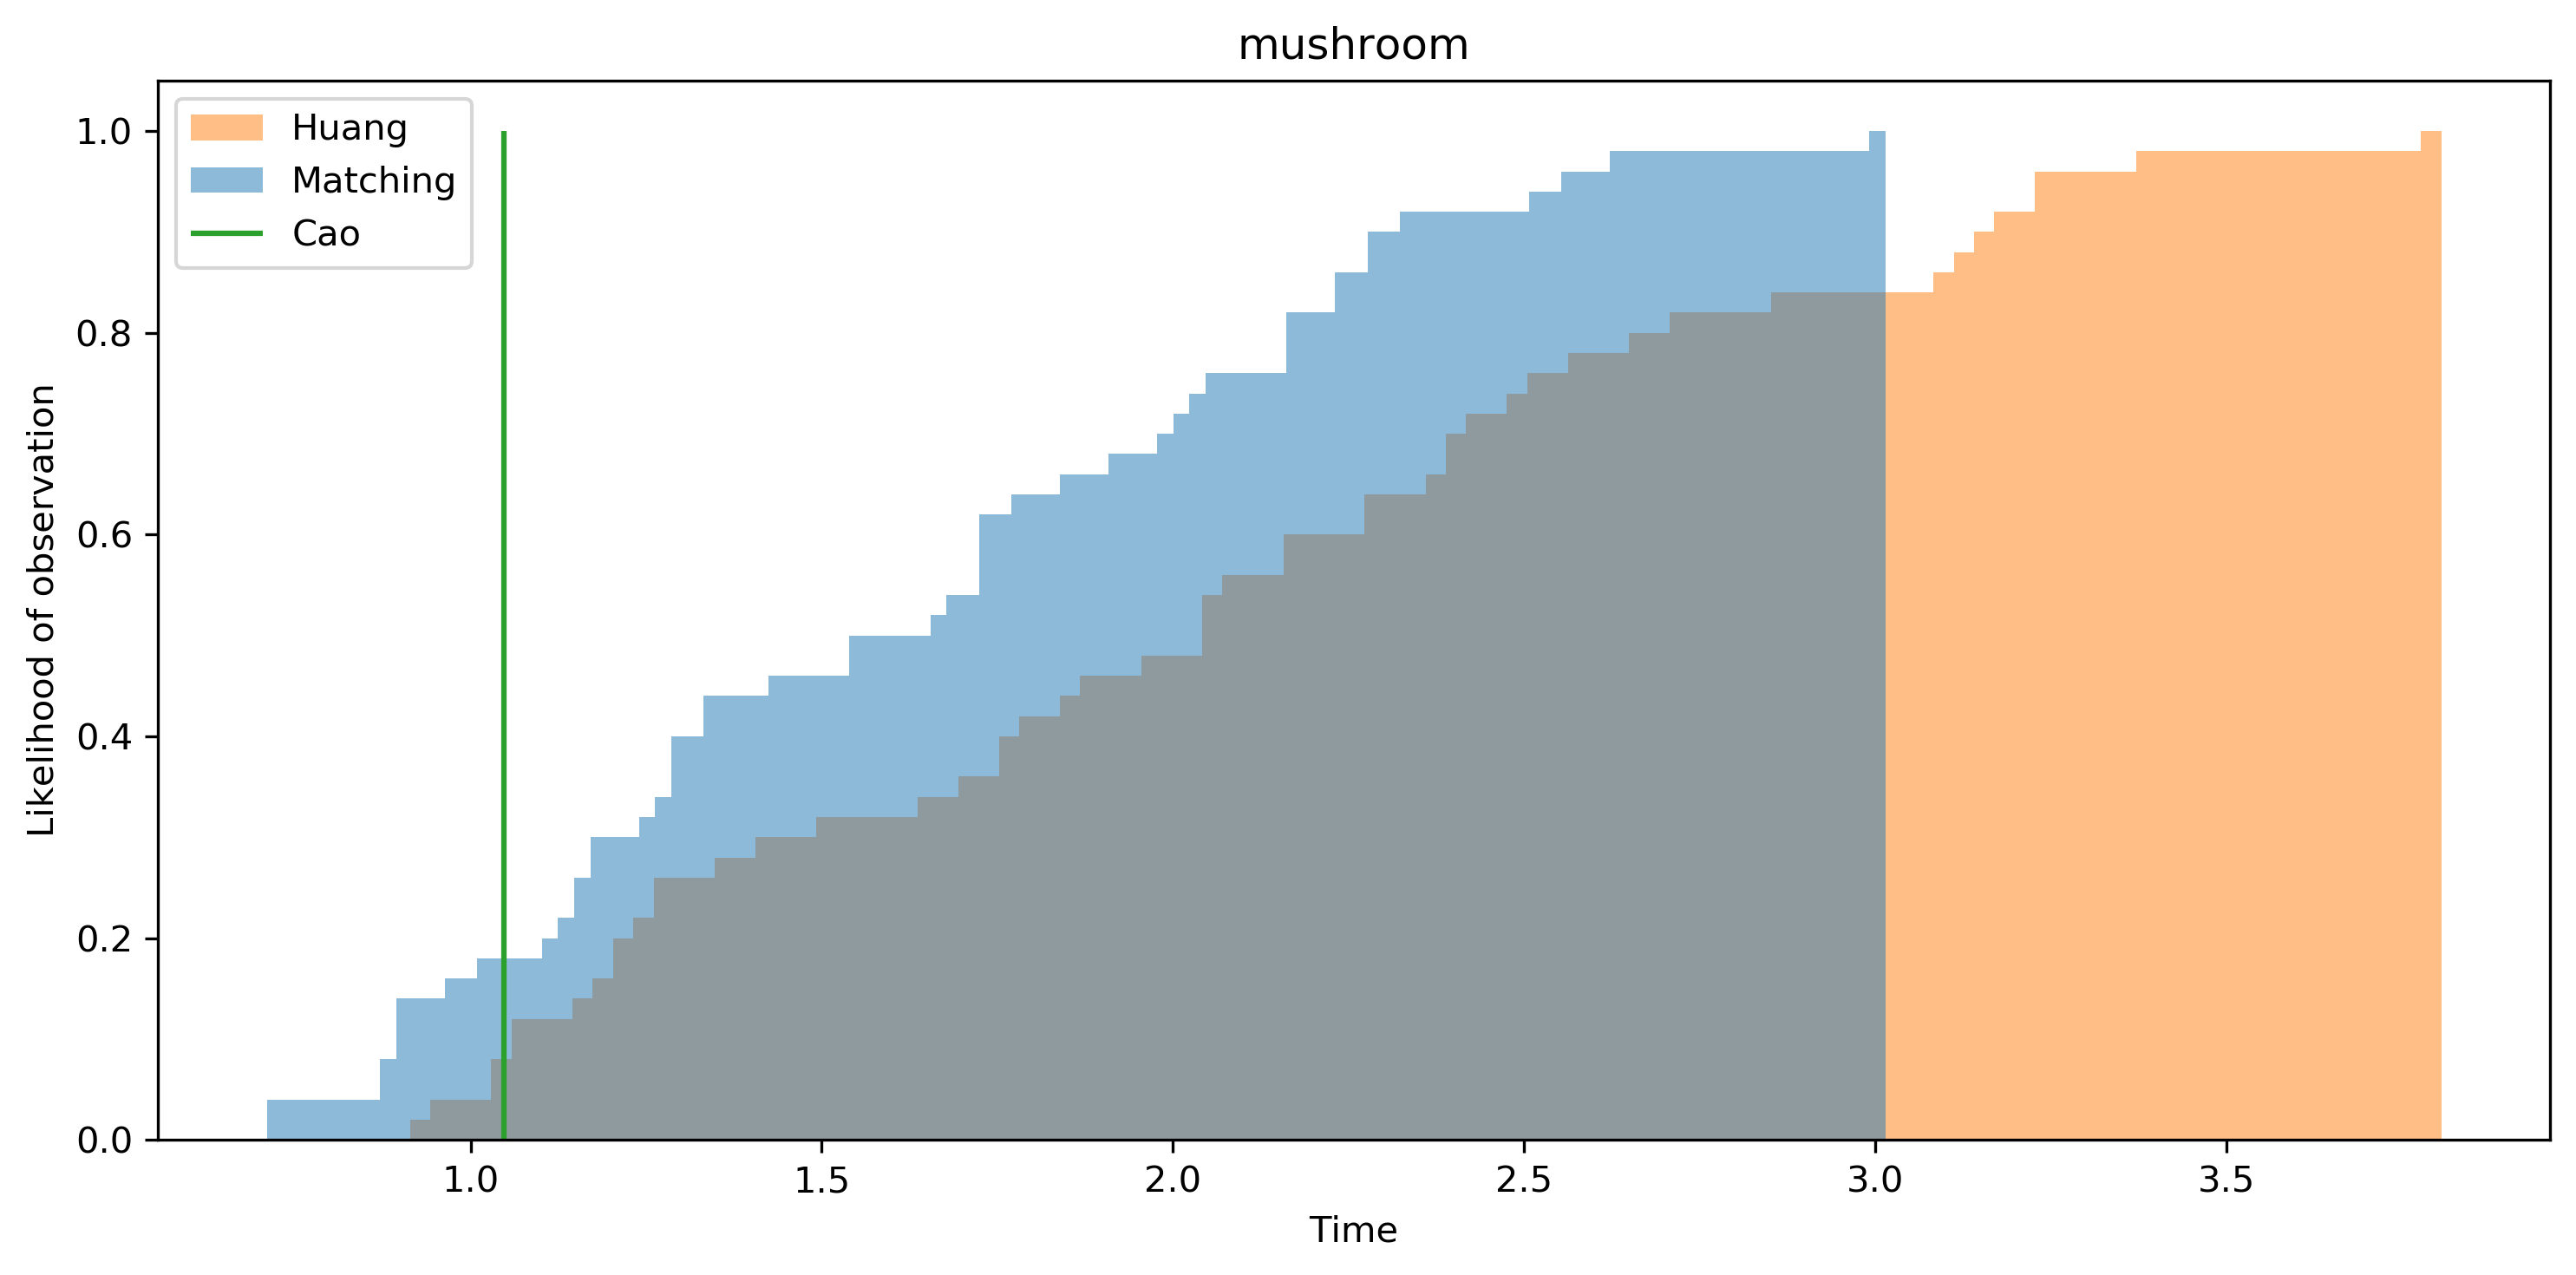

In [6]:
for root in ("elbow/", "nclasses/"):
    for name in ("breast_cancer", "soybean", "mushroom"):
        scatter_plots(name, f"../data/{root}", destination=f"../img/{root}")
        for column in ("initial_cost", "final_cost", "time"):
            violin_plots(name, column, f"../data/{root}", destination=f"../img/{root}")
            empirical_cdf_plots(name, column, f"../data/{root}", destination=f"../img/{root}")


# Get result tables


In [7]:
def get_summary(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    means = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].mean()

    stds = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].std()

    summary = pd.DataFrame(columns=means.columns, index=means.index)
    for j, column in enumerate(means):
        for i, _ in enumerate(means[column]):
            summary.iloc[i, j] = f"{means.iloc[i, j]:.2f} ({stds.iloc[i, j]:.3f})"

    summary.columns = ["Initial cost", "Final cost", "No. iterations", "Time"]
    summary.index = ["Cao", "Huang", "Matching"]

    if destination is not None:
        summary.to_latex(f"{destination}{name}_summary.tex")

    print(f"{name} ({root.split('/')[-2]}) summary:\n", summary, "\n\n")


In [8]:
for root in ("elbow/", "nclasses/"):
    for name in ("breast_cancer", "soybean", "mushroom"):
        get_summary(name, f"../data/{root}", f"../tex/{root}")


breast_cancer (elbow) summary:
               Initial cost        Final cost No. iterations          Time
Cao        2178.00 (0.000)   1955.00 (0.000)   4.00 (0.000)  0.37 (0.025)
Huang     2123.12 (92.805)  2023.80 (49.390)   2.58 (0.810)  0.25 (0.054)
Matching  2110.68 (87.670)  2015.42 (40.354)   2.72 (0.834)  0.21 (0.034) 


soybean (elbow) summary:
                Initial cost        Final cost No. iterations          Time
Cao         1822.00 (0.000)   1700.00 (0.000)   4.00 (0.000)  0.24 (0.009)
Huang     1964.56 (107.504)  1832.92 (61.820)   3.36 (0.875)  0.23 (0.043)
Matching   1929.50 (85.928)  1829.54 (68.632)   3.44 (1.110)  0.15 (0.027) 


mushroom (elbow) summary:
                  Initial cost           Final cost No. iterations  \
Cao          29922.00 (0.000)     29621.00 (0.000)   2.00 (0.000)   
Huang     34886.76 (3182.309)  31395.12 (1109.154)   2.80 (1.030)   
Matching  35591.44 (3182.828)   31392.16 (992.845)   3.08 (1.007)   

                  Time  
Cao       1